## **Exploratory Data Analysis**

# ** base folder path and checking how many dataset files exist**

In [ ]:
import os

#setting base folder path and checking how many dataset files exist

if base_dataset_folder_path == "YOUR_DATASET_FOLDER_PATH_HERE" or not base_dataset_folder_path:
    print("--------------------------------------------------------------------------")
    print("ERROR: Please update the 'base_dataset_folder_path' variable in the script.")
    print("You need to specify the path to your locally downloaded dataset folder.")
    print("--------------------------------------------------------------------------")
elif not os.path.exists(base_dataset_folder_path):
    print(f"--------------------------------------------------------------------------")
    print(f"ERROR: The path '{base_dataset_folder_path}' does not seem to exist.")
    print(f"Please double-check the path to your dataset folder.")
    print(f"--------------------------------------------------------------------------")
elif not os.path.isdir(base_dataset_folder_path):
    print(f"--------------------------------------------------------------------------")
    print(f"ERROR: The path '{base_dataset_folder_path}' is not a directory/folder.")
    print(f"Please ensure it points to the main folder of your dataset.")
    print(f"--------------------------------------------------------------------------")
else:
    print(f"Traversing directory: {base_dataset_folder_path}\n")

    file_count = 0
    folder_count = 0

    for root_folder, sub_folders, file_names in os.walk(base_dataset_folder_path):
        folder_count += len(sub_folders)
        file_count += len(file_names)

        # Indentation level based on how deep the folder is
        level = root_folder.replace(base_dataset_folder_path, '').count(os.sep)
        indent = ' ' * 4 * (level)

        print(f"{indent}📁 {os.path.basename(root_folder)}/")

        sub_indent = ' ' * 4 * (level + 1)
        if not sub_folders and not file_names and level == 0 and os.listdir(root_folder) : # handles case where top folder has files but no subfolders
             pass # will print files next
        elif not sub_folders and not file_names:
            print(f"{sub_indent}  (empty)")


        for sf in sub_folders:
            # This loop just lists subfolder names that will be traversed next by os.walk
            # print(f"{sub_indent}📁 {sf}/") # os.walk will print them when it gets to them
            pass

        for f_name in file_names:
            print(f"{sub_indent}📄 {f_name}")

    print(f"\n--- Traversal Complete ---")
    print(f"Found {file_count} files and {folder_count} sub-folders (excluding the base folder itself in the sub-folder count).")

    # If you just want to see the top-level contents:
    print(f"\n--- Top-level contents of '{base_dataset_folder_path}': ---")
    try:
        for item in os.listdir(base_dataset_folder_path):
            item_path = os.path.join(base_dataset_folder_path, item)
            if os.path.isdir(item_path):
                print(f"📁 {item}/")
            else:
                print(f"📄 {item}")
    except Exception as e:
        print(f"Could not list top-level directory contents: {e}")

Traversing directory: /Users/saurabhkankekar/jupyter_env/dataset

📁 dataset/
    📄 .DS_Store
    📁 EMA/
        📄 .DS_Store
        📄 EMA_definition.json
        📁 response/
            📄 .DS_Store
            📁 Behavior/
                📄 Behavior_u09.json
                📄 Behavior_u25.json
                📄 Behavior_u33.json
                📄 Behavior_u44.json
                📄 Behavior_u13.json
                📄 Behavior_u05.json
                📄 Behavior_u52.json
                📄 Behavior_u53.json
                📄 Behavior_u04.json
                📄 Behavior_u12.json
                📄 Behavior_u45.json
                📄 Behavior_u32.json
                📄 Behavior_u24.json
                📄 Behavior_u08.json
                📄 Behavior_u49.json
                📄 Behavior_u42.json
                📄 Behavior_u15.json
                📄 Behavior_u03.json
                📄 Behavior_u54.json
                📄 Behavior_u39.json
                📄 Behavior_u19.json
                📄 Beha

Checking EMA data

In [ ]:
import json
import os
import pandas as pd

base_dataset_folder_path = "/Users/saurabhkankekar/jupyter_env/dataset" # As per your output

# Path to the EMA definition file
ema_def_path = os.path.join(base_dataset_folder_path, "EMA", "EMA_definition.json")

print(f"Attempting to load: {ema_def_path}\n")

try:
    with open(ema_def_path, 'r') as f:
        ema_definitions = json.load(f)

    # Print the definitions (it might be a large dictionary or list)
    print("Contents of EMA_definition.json:")
    # Pretty print the JSON for better readability
    import pprint
    pprint.pprint(ema_definitions)

except FileNotFoundError:
    print(f"ERROR: File not found at '{ema_def_path}'. Please check the path.")
except json.JSONDecodeError:
    print(f"ERROR: Could not decode JSON from '{ema_def_path}'. The file might be corrupted or not a valid JSON.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Attempting to load: /Users/saurabhkankekar/jupyter_env/dataset/EMA/EMA_definition.json

Contents of EMA_definition.json:
[{'name': 'Social',
  'questions': [{'options': '[1]0-4 persons, [2]5-9 persons, [3]10-19 persons, '
                            '[4]20-49 persons, [5]50-99 persons, [6]over 100 '
                            'persons, ',
                 'question_id': 'number',
                 'question_text': 'How many people did you have contact with '
                                  'yesterday, including anyone you said hello '
                                  'to, chatted, talked or discussed matters '
                                  'with, whether you did it face-to-face, by '
                                  'telephone, by mail or on the internet, and '
                                  'whether you personally knew the person or '
                                  'not? Please select one of the following '
                                  'categories that best matches 

Checking phq9 survey file

In [ ]:
import pandas as pd
import os

# --- Path to your dataset ---
base_dataset_folder_path = "/Users/saurabhkankekar/jupyter_env/dataset" # As per your output

# Path to the PHQ-9 survey file
phq9_path = os.path.join(base_dataset_folder_path, "survey", "PHQ-9.csv")

print(f"\nAttempting to load: {phq9_path}\n")

try:
    df_phq9 = pd.read_csv(phq9_path)

    print("Successfully loaded PHQ-9.csv. Here's a preview:")
    print("--------------------------------------------------")
    print("First 5 records (df_phq9.head()):")
    print(df_phq9.head())
    print("\n--------------------------------------------------")
    print("DataFrame Info (df_phq9.info()):")
    df_phq9.info()
    print("--------------------------------------------------")


except FileNotFoundError:
    print(f"ERROR: File not found at '{phq9_path}'. Please check the path.")
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")


Attempting to load: /Users/saurabhkankekar/jupyter_env/dataset/survey/PHQ-9.csv

Successfully loaded PHQ-9.csv. Here's a preview:
--------------------------------------------------
First 5 records (df_phq9.head()):
   uid type Little interest or pleasure in doing things  \
0  u00  pre                                  Not at all   
1  u01  pre                                Several days   
2  u02  pre                     More than half the days   
3  u03  pre                                  Not at all   
4  u04  pre                                Several days   

  Feeling down, depressed, hopeless.  \
0                       Several days   
1                       Several days   
2                       Several days   
3                       Several days   
4                       Several days   

  Trouble falling or staying asleep, or sleeping too much.  \
0                                         Not at all         
1                                       Several days         
2 


    # You can also examine the 'Response' column (functional impairment) separately
    # For example, map its text to numerical values if needed for your analysis
    # impairment_mapping = {
    # "Not difficult at all": 0,
    # "Somewhat difficult": 1,
    # "Very difficult": 2,
    # "Extremely difficult": 3
    # }
    # df_phq9['Impairment_score'] = df_phq9['Response'].map(impairment_mapping)
    # print("\nImpairment scores (first 5 rows):")
    <!-- # print(df_phq9[['uid', 'Response', 'Impairment_score']].head()) -->

In [ ]:
import pandas as pd
import os
import numpy as np


# Path to the PHQ-9 survey file
phq9_path = os.path.join(base_dataset_folder_path, "survey", "PHQ-9.csv")

try:
    df_phq9 = pd.read_csv(phq9_path)
    print("Successfully loaded PHQ-9.csv.\n")

    # Define the mapping for responses to scores
    score_mapping = {
        "Not at all": 0,
        "Several days": 1,
        "More than half the days": 2,
        "Nearly every day": 3
    }

    # Identify the 9 question columns
    # These are the columns from 'Little interest or pleasure in doing things'
    # to 'Thoughts that you would be better off dead, or of hurting yourself'
    question_columns = df_phq9.columns[2:11] # Columns from index 2 up to (but not including) 11

    # Create new columns for the scores of each question
    for col in question_columns:
        score_col_name = f"{col}_score"
        df_phq9[score_col_name] = df_phq9[col].map(score_mapping)

    # Calculate the total PHQ-9 score
    # We'll select just the score columns for summing
    score_cols_to_sum = [f"{col}_score" for col in question_columns]
    df_phq9['PHQ9_total_score'] = df_phq9[score_cols_to_sum].sum(axis=1, min_count=1) # min_count=1 to return NaN if all items are NaN

    print("PHQ-9 data with scores (first 5 rows):")
    print("--------------------------------------------------")
    # Display relevant columns: uid, type, the score columns, and total score
    display_cols = ['uid', 'type'] + score_cols_to_sum + ['PHQ9_total_score']
    print(df_phq9[display_cols].head())
    print("\n--------------------------------------------------")
    print("Info after adding score columns:")
    df_phq9.info()
    print("\n--------------------------------------------------")
    print("Descriptive statistics for total score:")
    print(df_phq9['PHQ9_total_score'].describe())
    print("--------------------------------------------------")


except FileNotFoundError:
    print(f"ERROR: File not found at '{phq9_path}'. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded PHQ-9.csv.

PHQ-9 data with scores (first 5 rows):
--------------------------------------------------
   uid type  Little interest or pleasure in doing things_score  \
0  u00  pre                                                  0   
1  u01  pre                                                  1   
2  u02  pre                                                  2   
3  u03  pre                                                  0   
4  u04  pre                                                  1   

   Feeling down, depressed, hopeless._score  \
0                                         1   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

   Trouble falling or staying asleep, or sleeping too much._score  \
0                                                  0                
1                                                  1        

**Distribution of phq9 scores**

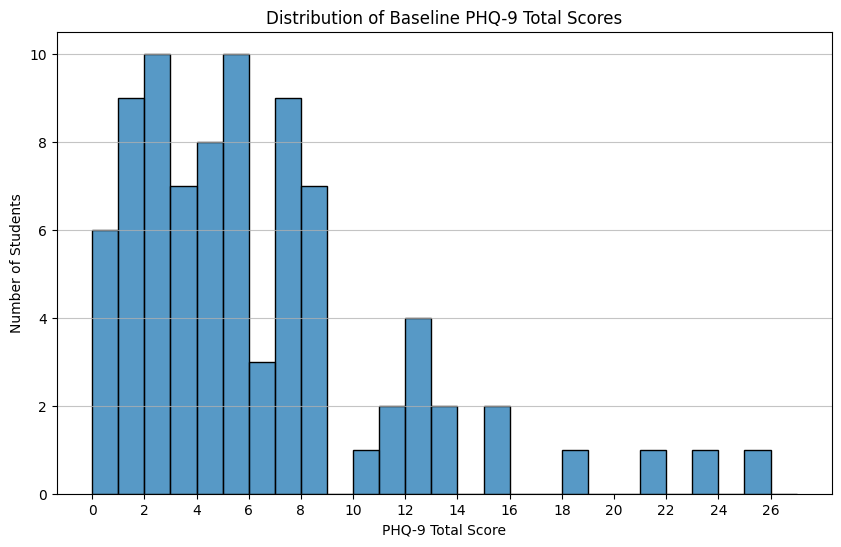

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_phq9 is your DataFrame with PHQ9_total_score
# Plotting a histogram of the PHQ9_total_score
plt.figure(figsize=(10, 6))
sns.histplot(df_phq9['PHQ9_total_score'], bins=range(0, 28, 1), kde=False) # Bins for each possible score
plt.title('Distribution of Baseline PHQ-9 Total Scores')
plt.xlabel('PHQ-9 Total Score')
plt.ylabel('Number of Students')
plt.xticks(range(0, 28, 2))
plt.grid(axis='y', alpha=0.75)
plt.show()

**Printing data for first user in the dataset from stress json**

In [ ]:
# Example: Load Stress EMA for user u00
user_id = "u00"
ema_type = "Stress" # Or 'Mood', 'Behavior', etc.

# First, let's re-load the EMA definitions to have them handy
ema_def_path = os.path.join(base_dataset_folder_path, "EMA", "EMA_definition.json")
ema_definitions = []
try:
    with open(ema_def_path, 'r') as f:
        ema_definitions_full = json.load(f)
    # Find the definition for the chosen EMA type
    for ema_def in ema_definitions_full:
        if ema_def['name'] == ema_type:
            ema_definitions = ema_def['questions']
            break
    if not ema_definitions:
        print(f"Could not find definition for EMA type: {ema_type}")

except Exception as e:
    print(f"Error loading EMA definitions: {e}")
    ema_definitions_full = [] # ensure it's defined
    ema_definitions = []


ema_response_path = os.path.join(base_dataset_folder_path, "EMA", "response", ema_type, f"{ema_type}_{user_id}.json")
print(f"\nAttempting to load: {ema_response_path}")

try:
    with open(ema_response_path, 'r') as f:
        ema_responses = json.load(f) # This might be a list of responses

    print(f"\nContent of {ema_type}_{user_id}.json (first few responses if it's a list):")
    if isinstance(ema_responses, list):
        pprint.pprint(ema_responses[:3]) # Print first 3 responses
        # You would typically convert this list of dicts into a Pandas DataFrame
        # df_ema_stress_u00 = pd.DataFrame(ema_responses)
        # print("\nEMA responses as DataFrame (first 5 rows):")
        # print(df_ema_stress_u00.head())
    else: # If it's a single JSON object
        pprint.pprint(ema_responses)

    # Now you can map answers to scores using your ema_definitions
    # For example, for the "Stress" EMA:
    # question_id 'level': 'Right now, I am...'
    # Options: '[1]A little stressed, [2]Definitely stressed, [3]Stressed out, [4]Feeling good, [5]Feeling great, '
    # You'd define a mapping: e.g., {'1':1, '2':2, '3':3, '4':4, '5':5} or a health-positive scale.

except FileNotFoundError:
    print(f"ERROR: File not found at '{ema_response_path}'.")
except Exception as e:
    print(f"An error occurred: {e}")


Attempting to load: /Users/saurabhkankekar/jupyter_env/dataset/EMA/response/Stress/Stress_u00.json

Content of Stress_u00.json (first few responses if it's a list):
[{'null': '43.75908069,-72.32885314', 'resp_time': 1364114401},
 {'null': '43.75908069,-72.32885314', 'resp_time': 1364114458},
 {'null': '43.70677151,-72.28746626', 'resp_time': 1364177805}]


**Converting EMA to pandas dataframe**

In [ ]:

ema_response_path = os.path.join(base_dataset_folder_path, "EMA", "response", ema_type, f"{ema_type}_{user_id}.json")

try:
    df_ema_stress_u00 = pd.read_json(ema_response_path)
    print(f"Successfully loaded {ema_response_path} into DataFrame.\n")

    # Convert resp_time to datetime first (as it's straightforward)
    # It's good practice to handle potential errors if 'resp_time' might be missing in some JSON objects
    if 'resp_time' in df_ema_stress_u00.columns:
        df_ema_stress_u00['resp_datetime'] = pd.to_datetime(df_ema_stress_u00['resp_time'], unit='s', errors='coerce')
    else:
        df_ema_stress_u00['resp_datetime'] = pd.NaT


    # Consolidate stress response
    # Initialize 'final_stress_response' as object dtype to accommodate strings from 'null'
    df_ema_stress_u00['final_stress_response'] = pd.Series(dtype='object')

    # Prioritize 'level' column. Convert to integer then string to standardize (e.g., 1.0 -> "1")
    if 'level' in df_ema_stress_u00.columns:
        # Fill NaNs temporarily before astype(int) if you want to convert valid numbers
        # then back to string. Or map directly if they are already clean.
        df_ema_stress_u00['final_stress_response'] = df_ema_stress_u00['level'].dropna().astype(float).astype(int).astype(str)


    # If 'final_stress_response' is still NaN (or was not populated from 'level'),
    # check the 'null' column for rows where 'null' is one of the 'potential_responses'
    if 'null' in df_ema_stress_u00.columns:
        potential_responses_in_null = ['1', '2', '3', '4', '5']
        condition_null_is_response = df_ema_stress_u00['null'].isin(potential_responses_in_null)
        # Apply only where final_stress_response is currently NaN
        df_ema_stress_u00.loc[df_ema_stress_u00['final_stress_response'].isna() & condition_null_is_response, 'final_stress_response'] = df_ema_stress_u00['null']

    print("--- DataFrame with consolidated 'final_stress_response' column (first 10 rows) ---")
    # Select columns for display to verify
    display_cols_initial = ['resp_datetime', 'null', 'level', 'location', 'final_stress_response']
    # Filter out columns that might not exist if the JSON structure is very sparse for some reason
    display_cols_initial = [col for col in display_cols_initial if col in df_ema_stress_u00.columns]
    print(df_ema_stress_u00[display_cols_initial].head(10))

    print(f"\nNumber of non-NaN values in 'final_stress_response': {df_ema_stress_u00['final_stress_response'].notna().sum()}")
    print(f"Unique values in 'final_stress_response': {df_ema_stress_u00['final_stress_response'].dropna().unique()}")

    # Map the 'final_stress_response' to meaningful labels
    # Keys are now strings '1' through '5'
    stress_label_mapping = {
        '1': 'A little stressed',
        '2': 'Definitely stressed',
        '3': 'Stressed out',
        '4': 'Feeling good',
        '5': 'Feeling great'
    }

    df_ema_stress_u00['stress_label'] = df_ema_stress_u00['final_stress_response'].map(stress_label_mapping)

    print("\n--- Processed Stress EMA data for u00 (first 10 rows with labels) ---")
    display_cols_processed = ['resp_datetime', 'final_stress_response', 'stress_label', 'null', 'level', 'location']
    display_cols_processed = [col for col in display_cols_processed if col in df_ema_stress_u00.columns] # Ensure columns exist
    print(df_ema_stress_u00[display_cols_processed].head(10))
    print("\nValue counts for 'stress_label':")
    print(df_ema_stress_u00['stress_label'].value_counts(dropna=False))

except FileNotFoundError:
    print(f"ERROR: File not found at '{ema_response_path}'.")
except KeyError as e:
    print(f"ERROR: A key was not found. This might mean a column is missing in some/all JSON objects. Error: {e}")
    if 'df_ema_stress_u00' in locals():
        print("Available columns:", df_ema_stress_u00.columns.tolist())
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded /Users/saurabhkankekar/jupyter_env/dataset/EMA/response/Stress/Stress_u00.json into DataFrame.

--- DataFrame with consolidated 'final_stress_response' column (first 10 rows) ---
        resp_datetime                      null  level  \
0 2013-03-24 08:40:01  43.75908069,-72.32885314    NaN   
1 2013-03-24 08:40:58  43.75908069,-72.32885314    NaN   
2 2013-03-25 02:16:45  43.70677151,-72.28746626    NaN   
3 2013-03-25 00:00:18                         1    NaN   
4 2013-03-25 02:16:49                         1    NaN   
5 2013-03-25 18:54:56                       NaN    2.0   
6 2013-03-26 03:33:26                       NaN    2.0   
7 2013-03-26 03:33:34                       NaN    2.0   
8 2013-03-27 01:12:20                       NaN    1.0   
9 2013-03-28 22:19:12                       NaN    4.0   

                   location final_stress_response  
0                       NaN                   NaN  
1                       NaN                   NaN  
2     

**Find all stress EMA files**

In [ ]:

# Find all Stress EMA files
stress_files_pattern = os.path.join(ema_responses_folder_path, f"{ema_type}_u*.json")
stress_files = glob.glob(stress_files_pattern)

print(f"Found {len(stress_files)} {ema_type} EMA files to process.\n")

for file_path in stress_files:
    try:
        user_id = os.path.basename(file_path).replace(f"{ema_type}_", "").replace(".json", "")
        print(f"Processing file: {os.path.basename(file_path)} for user: {user_id}")

        df_user_ema = pd.read_json(file_path)

        # --- Apply the refined processing logic ---
        if 'resp_time' in df_user_ema.columns:
            df_user_ema['resp_datetime'] = pd.to_datetime(df_user_ema['resp_time'], unit='s', errors='coerce')
        else:
            df_user_ema['resp_datetime'] = pd.NaT

        df_user_ema['uid'] = user_id # Add user ID to the DataFrame

        df_user_ema['final_stress_response'] = pd.Series(dtype='object')

        if 'level' in df_user_ema.columns:
            # Ensure 'level' column is accessed safely, handling cases where it might be all NaN
            valid_level_responses = df_user_ema['level'].dropna()
            if not valid_level_responses.empty:
                 df_user_ema['final_stress_response'] = valid_level_responses.astype(float).astype(int).astype(str)

        if 'null' in df_user_ema.columns:
            potential_responses_in_null = ['1', '2', '3', '4', '5']
            condition_null_is_response = df_user_ema['null'].isin(potential_responses_in_null)
            df_user_ema.loc[df_user_ema['final_stress_response'].isna() & condition_null_is_response, 'final_stress_response'] = df_user_ema['null']

        stress_label_mapping = {
            '1': 'A little stressed',
            '2': 'Definitely stressed',
            '3': 'Stressed out',
            '4': 'Feeling good',
            '5': 'Feeling great'
        }
        df_user_ema['stress_label'] = df_user_ema['final_stress_response'].map(stress_label_mapping)

        # Select and reorder columns for consistency before appending
        # Adjust these columns based on what you want in your final combined DataFrame
        cols_to_keep = ['uid', 'resp_datetime', 'final_stress_response', 'stress_label', 'null', 'level', 'location', 'resp_time']
        # Filter to only columns that actually exist in df_user_ema
        existing_cols_to_keep = [col for col in cols_to_keep if col in df_user_ema.columns]
        all_users_stress_ema_dfs.append(df_user_ema[existing_cols_to_keep])

    except FileNotFoundError:
        print(f"ERROR: File not found at '{file_path}'.")
    except Exception as e:
        print(f"An error occurred while processing {file_path}: {e}")
        if 'df_user_ema' in locals():
            print("Available columns during error:", df_user_ema.columns.tolist())


# Combine all DataFrames into one
if all_users_stress_ema_dfs:
    combined_stress_ema_df = pd.concat(all_users_stress_ema_dfs, ignore_index=True)
    print("\n--- Combined Stress EMA Data for All Users ---")
    print("Shape of combined DataFrame:", combined_stress_ema_df.shape)
    print("\nInfo for combined DataFrame:")
    combined_stress_ema_df.info()
    print("\nFirst 5 rows of combined DataFrame:")
    print(combined_stress_ema_df.head())
    print("\nLast 5 rows of combined DataFrame:")
    print(combined_stress_ema_df.tail())
    print("\nValue counts for 'stress_label' in combined DataFrame:")
    print(combined_stress_ema_df['stress_label'].value_counts(dropna=False))
    print("\nUnique UIDs in combined DataFrame:")
    print(combined_stress_ema_df['uid'].unique())
    print(f"Number of unique UIDs: {combined_stress_ema_df['uid'].nunique()}")

else:
    print("No Stress EMA data was processed.")

Found 49 Stress EMA files to process.

Processing file: Stress_u44.json for user: u44
Processing file: Stress_u13.json for user: u13
Processing file: Stress_u05.json for user: u05
Processing file: Stress_u52.json for user: u52
Processing file: Stress_u09.json for user: u09
Processing file: Stress_u25.json for user: u25
Processing file: Stress_u33.json for user: u33
Processing file: Stress_u32.json for user: u32
Processing file: Stress_u24.json for user: u24
Processing file: Stress_u08.json for user: u08
Processing file: Stress_u49.json for user: u49
Processing file: Stress_u53.json for user: u53
Processing file: Stress_u04.json for user: u04
Processing file: Stress_u12.json for user: u12
Processing file: Stress_u45.json for user: u45
Processing file: Stress_u19.json for user: u19
Processing file: Stress_u58.json for user: u58
Processing file: Stress_u23.json for user: u23
Processing file: Stress_u35.json for user: u35
Processing file: Stress_u42.json for user: u42
Processing file: Stre

**Processing the files for mood.json**

**Combining EMA for all users**

In [ ]:

ema_type_mood = "Mood"
ema_mood_folder_path = os.path.join(base_dataset_folder_path, "EMA", "response", ema_type_mood)

all_users_mood_ema_dfs = []

mood_files_pattern = os.path.join(ema_mood_folder_path, f"{ema_type_mood}_u*.json")
mood_files = glob.glob(mood_files_pattern)

print(f"Found {len(mood_files)} {ema_type_mood} EMA files to process.\n")

for file_path in mood_files:
    try:
        user_id = os.path.basename(file_path).replace(f"{ema_type_mood}_", "").replace(".json", "")
        print(f"Processing file: {os.path.basename(file_path)} for user: {user_id}")

        # It's possible some JSON files might be empty or malformed
        if os.path.getsize(file_path) == 0:
            print(f"Skipping empty file: {file_path}")
            continue

        df_user_ema = pd.read_json(file_path)

        if df_user_ema.empty:
            print(f"Skipping file with no data after loading: {file_path}")
            continue

        if 'resp_time' in df_user_ema.columns:
            df_user_ema['resp_datetime'] = pd.to_datetime(df_user_ema['resp_time'], unit='s', errors='coerce')
        else:
            df_user_ema['resp_datetime'] = pd.NaT

        df_user_ema['uid'] = user_id

        # --- Extract Mood responses ---
        # Expected question_ids from EMA_definition.json for "Mood":
        # 'happyornot', 'happy', 'sadornot', 'sad'
        # The actual keys in the JSON might be these question_ids.

        # Initialize columns
        for q_id in ['happyornot', 'happy', 'sadornot', 'sad']:
            if q_id not in df_user_ema.columns:
                 df_user_ema[q_id] = pd.Series(dtype='object') # Add if missing, common for sparse JSON


        # Define mappings (based on EMA_definition.json options)
        # Note: Options for 'happyornot' and 'sadornot' were "(Yes) 1 2 (No)"
        # This means '1' is Yes, '2' is No.
        yes_no_mapping = {'1': 'Yes', '2': 'No'}
        # For 'happy' and 'sad' levels:
        intensity_mapping = {
            '1': 'a little bit',
            '2': 'somewhat',
            '3': 'very much',
            '4': 'extremely'
        }

        # Apply mappings safely, converting to string first
        df_user_ema['happy_status'] = df_user_ema['happyornot'].astype(str).map(yes_no_mapping)
        df_user_ema['happy_intensity'] = df_user_ema['happy'].astype(str).map(intensity_mapping)
        df_user_ema['sad_status'] = df_user_ema['sadornot'].astype(str).map(yes_no_mapping)
        df_user_ema['sad_intensity'] = df_user_ema['sad'].astype(str).map(intensity_mapping)

        # Select and reorder columns
        cols_to_keep_mood = ['uid', 'resp_datetime', 'happyornot', 'happy_status', 'happy', 'happy_intensity',
                             'sadornot', 'sad_status', 'sad', 'sad_intensity', 'location', 'resp_time']
        existing_cols_to_keep_mood = [col for col in cols_to_keep_mood if col in df_user_ema.columns]
        all_users_mood_ema_dfs.append(df_user_ema[existing_cols_to_keep_mood])

    except FileNotFoundError:
        print(f"ERROR: File not found at '{file_path}'.")
    except ValueError as ve: # Catches issues with empty or malformed JSON more specifically
        print(f"ValueError while processing {file_path}: {ve}. Skipping file.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")
        if 'df_user_ema' in locals() and not df_user_ema.empty:
            print("Available columns during error:", df_user_ema.columns.tolist())


if all_users_mood_ema_dfs:
    combined_mood_ema_df = pd.concat(all_users_mood_ema_dfs, ignore_index=True)
    print("\n--- Combined Mood EMA Data for All Users ---")
    print("Shape of combined DataFrame:", combined_mood_ema_df.shape)
    combined_mood_ema_df.info()
    print("\nFirst 5 rows of combined Mood DataFrame:")
    print(combined_mood_ema_df.head())
    print("\nValue counts for 'happy_status':")
    print(combined_mood_ema_df['happy_status'].value_counts(dropna=False))
    print("\nValue counts for 'sad_status':")
    print(combined_mood_ema_df['sad_status'].value_counts(dropna=False))
    print(f"\nNumber of unique UIDs in Mood data: {combined_mood_ema_df['uid'].nunique()}")
else:
    print("No Mood EMA data was processed.")

Found 49 Mood EMA files to process.

Processing file: Mood_u56.json for user: u56
Processing file: Mood_u01.json for user: u01
Processing file: Mood_u17.json for user: u17
Processing file: Mood_u20.json for user: u20
Skipping file with no data after loading: /Users/saurabhkankekar/jupyter_env/dataset/EMA/response/Mood/Mood_u20.json
Processing file: Mood_u36.json for user: u36
Processing file: Mood_u41.json for user: u41
Skipping file with no data after loading: /Users/saurabhkankekar/jupyter_env/dataset/EMA/response/Mood/Mood_u41.json
Processing file: Mood_u16.json for user: u16
Processing file: Mood_u00.json for user: u00
Processing file: Mood_u57.json for user: u57
Processing file: Mood_u31.json for user: u31
Skipping file with no data after loading: /Users/saurabhkankekar/jupyter_env/dataset/EMA/response/Mood/Mood_u31.json
Processing file: Mood_u27.json for user: u27
Processing file: Mood_u50.json for user: u50
Processing file: Mood_u07.json for user: u07
Processing file: Mood_u46.j

**Processing Behaviour.json files**

In [ ]:

ema_behavior_folder_path = os.path.join(base_dataset_folder_path, "EMA", "response", ema_type_behavior)

all_users_behavior_ema_dfs = []

behavior_files_pattern = os.path.join(ema_behavior_folder_path, f"{ema_type_behavior}_u*.json")
behavior_files = glob.glob(behavior_files_pattern)

print(f"Found {len(behavior_files)} {ema_type_behavior} EMA files to process.\n")

# Define the mapping for the "anxious" question
# Options were: (Not at all) 1 2 3 4 5 (Extremely)
anxious_mapping = {
    '1': 'Not at all anxious',
    '2': 'A little anxious',
    '3': 'Somewhat anxious',
    '4': 'Very anxious',
    '5': 'Extremely anxious'
}

for file_path in behavior_files:
    try:
        user_id = os.path.basename(file_path).replace(f"{ema_type_behavior}_", "").replace(".json", "")
        print(f"Processing file: {os.path.basename(file_path)} for user: {user_id}")

        if os.path.getsize(file_path) == 0:
            print(f"Skipping empty file: {file_path}")
            continue

        df_user_ema = pd.read_json(file_path)

        if df_user_ema.empty:
            print(f"Skipping file with no data after loading: {file_path}")
            continue

        if 'resp_time' in df_user_ema.columns:
            df_user_ema['resp_datetime'] = pd.to_datetime(df_user_ema['resp_time'], unit='s', errors='coerce')
        else:
            df_user_ema['resp_datetime'] = pd.NaT

        df_user_ema['uid'] = user_id

        # --- Extract and label the 'anxious' response ---
        # The question_id for the anxious question is 'anxious'
        if 'anxious' not in df_user_ema.columns:
            df_user_ema['anxious'] = pd.Series(dtype='object') # Add if missing

        # The responses are expected to be '1', '2', '3', '4', '5'
        # We'll ensure they are strings for mapping
        df_user_ema['anxious_response_raw'] = df_user_ema['anxious'].astype(str)
        df_user_ema['anxious_label'] = df_user_ema['anxious_response_raw'].map(anxious_mapping)

        # Select and reorder columns
        # You can include other behavior questions if you want to process them too
        cols_to_keep_behavior = ['uid', 'resp_datetime', 'anxious_response_raw', 'anxious_label',
                                 'location', 'resp_time'] # Add other original behavior columns if needed

        # Include other behavior question_ids if you decide to process them:
        # e.g., 'enthusiastic', 'critical', 'dependable', 'experiences',
        # 'reserved', 'sympathetic', 'disorganized', 'calm', 'conventional'
        # For now, we focus on 'anxious'.

        existing_cols_to_keep_behavior = [col for col in cols_to_keep_behavior if col in df_user_ema.columns]
        all_users_behavior_ema_dfs.append(df_user_ema[existing_cols_to_keep_behavior])

    except FileNotFoundError:
        print(f"ERROR: File not found at '{file_path}'.")
    except ValueError as ve:
        print(f"ValueError while processing {file_path}: {ve}. Skipping file.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")
        if 'df_user_ema' in locals() and not df_user_ema.empty:
            print("Available columns during error:", df_user_ema.columns.tolist())


if all_users_behavior_ema_dfs:
    combined_behavior_ema_df = pd.concat(all_users_behavior_ema_dfs, ignore_index=True)
    print("\n--- Combined Behavior EMA Data (focused on 'anxious') for All Users ---")
    print("Shape of combined DataFrame:", combined_behavior_ema_df.shape)
    combined_behavior_ema_df.info()
    print("\nFirst 5 rows of combined Behavior (anxious) DataFrame:")
    print(combined_behavior_ema_df.head())
    print("\nValue counts for 'anxious_label':")
    print(combined_behavior_ema_df['anxious_label'].value_counts(dropna=False))
    print(f"\nNumber of unique UIDs in Behavior (anxious) data: {combined_behavior_ema_df['uid'].nunique()}")
else:
    print("No Behavior EMA data was processed.")

Found 49 Behavior EMA files to process.

Processing file: Behavior_u09.json for user: u09
Processing file: Behavior_u25.json for user: u25
Processing file: Behavior_u33.json for user: u33
Processing file: Behavior_u44.json for user: u44
Processing file: Behavior_u13.json for user: u13
Skipping file with no data after loading: /Users/saurabhkankekar/jupyter_env/dataset/EMA/response/Behavior/Behavior_u13.json
Processing file: Behavior_u05.json for user: u05
Processing file: Behavior_u52.json for user: u52
Processing file: Behavior_u53.json for user: u53
Processing file: Behavior_u04.json for user: u04
Processing file: Behavior_u12.json for user: u12
Processing file: Behavior_u45.json for user: u45
Processing file: Behavior_u32.json for user: u32
Processing file: Behavior_u24.json for user: u24
Processing file: Behavior_u08.json for user: u08
Processing file: Behavior_u49.json for user: u49
Processing file: Behavior_u42.json for user: u42
Processing file: Behavior_u15.json for user: u15
P

In [ ]:

# Example: Let's inspect 'BigFive.csv' (you'll need to do this for others too)
survey_file_to_check = "BigFive.csv" # Change this to other survey files
file_path = os.path.join(base_dataset_folder_path, "survey", survey_file_to_check)

print(f"--- Checking file: {file_path} ---")
try:
    df_survey_check = pd.read_csv(file_path)
    print(f"\nColumns in {survey_file_to_check}:")
    print(df_survey_check.columns.tolist())
    print(f"\nFirst 5 rows of {survey_file_to_check}:")
    print(df_survey_check.head())
    print(f"\nInfo for {survey_file_to_check}:")
    df_survey_check.info()
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"Error reading {file_path}: {e}")

# we need to repeat this for other csv as well

--- Checking file: /Users/saurabhkankekar/jupyter_env/dataset/survey/BigFive.csv ---

Columns in BigFive.csv:
['uid', 'type', 'I see myself as someone who...   - 1. Is talkative', 'I see myself as someone who...   - 2. Tends to find fault with others', 'I see myself as someone who...   - 3. Does a thorough job', 'I see myself as someone who...   - 4. Is depressed, blue', 'I see myself as someone who...   - 5. Is original, comes up with new ideas', 'I see myself as someone who...   - 6. Is reserved', 'I see myself as someone who...   - 7. Is helpful and unselfish with others', 'I see myself as someone who...   - 8. Can be somewhat careless', 'I see myself as someone who...   - 9. Is relaxed, handles stress well.', 'I see myself as someone who...   - 10. Is curious about many different things', 'I see myself as someone who...   - 11.Is full of energy', 'I see myself as someone who...   - 12. Starts quarrels with others', 'I see myself as someone who...   - 13. Is a reliable worker', 'I s

**Inspecting the survey file**

In [ ]:

survey_file_to_check = "FlourishingScale.csv"
# --- Or "LonelinessScale.csv", "panas.csv", etc. ---

file_path = os.path.join(base_dataset_folder_path, "survey", survey_file_to_check)

print(f"--- Checking file: {file_path} ---")
try:
    df_survey_check = pd.read_csv(file_path)
    print(f"\nColumns in {survey_file_to_check}:")
    print(df_survey_check.columns.tolist())
    print(f"\nFirst 5 rows of {survey_file_to_check}:")
    print(df_survey_check.head())
    print(f"\nInfo for {survey_file_to_check}:")
    df_survey_check.info()
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"Error reading {file_path}: {e}")

--- Checking file: /Users/saurabhkankekar/jupyter_env/dataset/survey/FlourishingScale.csv ---

Columns in FlourishingScale.csv:
['uid', 'type', 'I lead a purposeful and meaningful life', 'My social relationships are supportive and rewarding', 'I am engaged and interested in my daily activities', 'I actively contribute to the happiness and well-being of others', 'I am competent and capable in the activities that are important to me', 'I am a good person and live a good life', 'I am optimistic about my future', 'People respect me']

First 5 rows of FlourishingScale.csv:
   uid type  I lead a purposeful and meaningful life  \
0  u00  pre                                        7   
1  u01  pre                                        4   
2  u02  pre                                        6   
3  u03  pre                                        6   
4  u04  pre                                        3   

   My social relationships are supportive and rewarding  \
0                            

In [ ]:

# --- Change this to the next file you want to inspect ---
survey_file_to_check = "LonelinessScale.csv"
# --- Or "panas.csv", "PerceivedStressScale.csv", etc. ---

file_path = os.path.join(base_dataset_folder_path, "survey", survey_file_to_check)

print(f"--- Checking file: {file_path} ---")
try:
    df_survey_check = pd.read_csv(file_path)
    print(f"\nColumns in {survey_file_to_check}:")
    print(df_survey_check.columns.tolist())
    print(f"\nFirst 5 rows of {survey_file_to_check}:")
    print(df_survey_check.head())
    print(f"\nInfo for {survey_file_to_check}:")
    df_survey_check.info()
    print("---------------------------------------\n")
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"Error reading {file_path}: {e}")

--- Checking file: /Users/saurabhkankekar/jupyter_env/dataset/survey/LonelinessScale.csv ---

Columns in LonelinessScale.csv:
['uid', 'type', '1. I feel in tune with the people around me', '2. I lack companionship', '3. There is no one I can turn to', '4. I do not feel alone', '5. I feel part of a group of friends', '6. I have a lot in common with the people around me', '7. I am no longer close to anyone', '8. My interests and ideas are not shared by those around me', '9. I am an outgoing person', '10. There are people I feel close to', '11. I feel left out', '12. My social relationships are superficial', '13. No one really knows me well', '14. I feel isolated from others', '15. I can find companionship when I want it', '16. There are people who really understand me', '17. I am unhappy being so withdrawn', '18. People are around me but not with me', '19. There are people I can talk to', '20. There are people I can turn to']

First 5 rows of LonelinessScale.csv:
   uid type 1. I feel in

**Checking survey files one by one**

In [ ]:

# --- Change this to the next file you want to inspect ---
survey_file_to_check = "panas.csv"
# --- Or "PerceivedStressScale.csv", "psqi.csv", etc. ---

file_path = os.path.join(base_dataset_folder_path, "survey", survey_file_to_check)

print(f"--- Checking file: {file_path} ---")
try:
    df_survey_check = pd.read_csv(file_path)
    print(f"\nColumns in {survey_file_to_check}:")
    print(df_survey_check.columns.tolist())
    print(f"\nFirst 5 rows of {survey_file_to_check}:")
    print(df_survey_check.head())
    print(f"\nInfo for {survey_file_to_check}:")
    df_survey_check.info()
    print("---------------------------------------\n")
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"Error reading {file_path}: {e}")

--- Checking file: /Users/saurabhkankekar/jupyter_env/dataset/survey/panas.csv ---

Columns in panas.csv:
['uid', 'type', 'Interested', 'Distressed', 'Upset', 'Strong', 'Guilty', 'Scared', 'Hostile ', 'Enthusiastic', 'Proud', 'Irritable', 'Alert', 'Inspired', 'Nervous', 'Determined ', 'Attentive', 'Jittery', 'Active ', 'Afraid ']

First 5 rows of panas.csv:
   uid type  Interested  Distressed  Upset  Strong  Guilty  Scared  Hostile   \
0  u00  pre           5           4      3       4     3.0       5         5   
1  u01  pre           4           2      2       2     5.0       1         1   
2  u02  pre           4           1      1       2     2.0       2         1   
3  u03  pre           4           2      2       4     5.0       5         5   
4  u04  pre           4           2      1       3     3.0       1         1   

   Enthusiastic  Proud  Irritable  Alert  Inspired  Nervous  Determined   \
0             3      3          3      4       4.0      NaN            4   
1      

PSQI

In [ ]:

survey_file_to_check = "psqi.csv"


file_path = os.path.join(base_dataset_folder_path, "survey", survey_file_to_check)

print(f"--- Checking file: {file_path} ---")
try:
    df_survey_check = pd.read_csv(file_path)
    print(f"\nColumns in {survey_file_to_check}:")
    print(df_survey_check.columns.tolist())
    print(f"\nFirst 5 rows of {survey_file_to_check}:")
    print(df_survey_check.head())
    print(f"\nInfo for {survey_file_to_check}:")
    df_survey_check.info()
    print("---------------------------------------\n")
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"Error reading {file_path}: {e}")

--- Checking file: /Users/saurabhkankekar/jupyter_env/dataset/survey/psqi.csv ---

Columns in psqi.csv:
['uid', 'type', 'During the past month, what time have you usually gone to bed at night? ', 'During the past month, how long (in minutes) has it usually taken you to fall asleep each night?', 'When have you usually gotten up in the morning?', 'During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)', 'a. Cannot get to sleep within 30 minutes', 'b. Wake up in the middle of the night or early morning', 'c. Have to get up to use the bathroom', 'd. Cannot breathe comfortably', 'e. Cough or snore loudly', 'f. Feel too cold', 'g. Feel too hot', 'h. Have bad dreams', 'i. Have pain', 'j. Other reason(s)', 'Other reason(s), please describe, including how often you have had trouble sleeping because of this reason(s):', 'During the past month, how often have you taken medicine (prescribed or over the counter)

In [ ]:

survey_file_to_check = "vr_12.csv"

file_path = os.path.join(base_dataset_folder_path, "survey", survey_file_to_check)

print(f"--- Checking file: {file_path} ---")
try:
    df_survey_check = pd.read_csv(file_path)
    print(f"\nColumns in {survey_file_to_check}:")
    print(df_survey_check.columns.tolist())
    print(f"\nFirst 5 rows of {survey_file_to_check}:")
    print(df_survey_check.head())
    print(f"\nInfo for {survey_file_to_check}:")
    df_survey_check.info()
    print("---------------------------------------\n")
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"Error reading {file_path}: {e}")

--- Checking file: /Users/saurabhkankekar/jupyter_env/dataset/survey/vr_12.csv ---

Columns in vr_12.csv:
['uid', 'type', 'In general, would you say your health is', 'Moderate activities, such as moving a table, pushing a vacuum cleaner, bowling or playing golf?', 'Climbing several flights of stairs?', 'Accomplished less than you would like.', 'Were limited in the kind of work or other activities.', 'Accomplished less than you would like..1', "Didn't do work or other activities as carefully as usual.", 'During the past 4 weeks, how much did pain interfere with your normal work (including both work outside the home and housework)?', 'How much of the time during the past 4 weeks: Have you felt calm and peaceful?', 'How much of the time during the past 4 weeks: Did you have a lot of energy?', 'How much of the time during the past 4 weeks: Have you felt downhearted and blue?', 'During the past 4 weeks, how much of the time has your physical health or emotional problems interfered with your

**Check user acitvity files**

combining dataframes

In [ ]:

activity_folder_path = os.path.join(base_dataset_folder_path, "sensing", "activity")

# List to hold DataFrames for each user's activity data
all_users_activity_dfs = []

# Find all activity CSV files
activity_files_pattern = os.path.join(activity_folder_path, "activity_u*.csv")
activity_files = glob.glob(activity_files_pattern)

print(f"Found {len(activity_files)} activity CSV files to process.\n")

for file_path in activity_files:
    try:
        user_id = os.path.basename(file_path).replace("activity_", "").replace(".csv", "")
        print(f"Processing file: {os.path.basename(file_path)} for user: {user_id}")

        # Check if file is empty before trying to read
        if os.path.getsize(file_path) == 0:
            print(f"Skipping empty file: {file_path}")
            continue

        df_user_activity = pd.read_csv(file_path)

        if df_user_activity.empty:
            print(f"Skipping file with no data after loading: {file_path}")
            continue

        df_user_activity['uid'] = user_id # Add user ID to the DataFrame

        # It's common for these files to have a 'timestamp' column.
        # Let's try to convert it to datetime if it exists.
        if 'timestamp' in df_user_activity.columns:
            df_user_activity['datetime'] = pd.to_datetime(df_user_activity['timestamp'], unit='s', errors='coerce')

        all_users_activity_dfs.append(df_user_activity)

    except FileNotFoundError:
        print(f"ERROR: File not found at '{file_path}'.")
    except pd.errors.EmptyDataError:
        print(f"ERROR: No data or no columns to parse in {file_path}. Skipping.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")
        if 'df_user_activity' in locals() and not df_user_activity.empty:
            print("Available columns during error:", df_user_activity.columns.tolist())


# Combine all DataFrames into one
if all_users_activity_dfs:
    combined_activity_df = pd.concat(all_users_activity_dfs, ignore_index=True)
    print("\n--- Combined Activity Data for All Users ---")
    print("Shape of combined DataFrame:", combined_activity_df.shape)
    print("\nInfo for combined DataFrame:")
    combined_activity_df.info()
    print("\nFirst 5 rows of combined DataFrame:")
    print(combined_activity_df.head())
    print("\nLast 5 rows of combined DataFrame:")
    print(combined_activity_df.tail())


    # Common names are 'activity_type', 'activity', 'type', 'label'
    # checking for a few common we might need to inspect df.columns
    activity_type_col = None
    potential_activity_cols = ['activity type', 'activity', ' Activity Type', 'activity_type', 'label'] # Note 'activity type' from example
    for col in potential_activity_cols:
        if col in combined_activity_df.columns:
            activity_type_col = col
            break

    if activity_type_col:
        print(f"\nUnique values in '{activity_type_col}' column:")
        print(combined_activity_df[activity_type_col].unique())
        print(f"\nValue counts for '{activity_type_col}':")
        print(combined_activity_df[activity_type_col].value_counts(dropna=False))
    else:
        print("\nCould not automatically identify activity type column. Please inspect columns manually:")
        print(combined_activity_df.columns.tolist())

    print(f"\nNumber of unique UIDs in Activity data: {combined_activity_df['uid'].nunique()}")

else:
    print("No Activity data was processed.")

Found 49 activity CSV files to process.

Processing file: activity_u44.csv for user: u44
Processing file: activity_u50.csv for user: u50
Processing file: activity_u51.csv for user: u51
Processing file: activity_u45.csv for user: u45
Processing file: activity_u53.csv for user: u53
Processing file: activity_u47.csv for user: u47
Processing file: activity_u46.csv for user: u46
Processing file: activity_u52.csv for user: u52
Processing file: activity_u56.csv for user: u56
Processing file: activity_u42.csv for user: u42
Processing file: activity_u43.csv for user: u43
Processing file: activity_u57.csv for user: u57
Processing file: activity_u41.csv for user: u41
Processing file: activity_u54.csv for user: u54
Processing file: activity_u27.csv for user: u27
Processing file: activity_u33.csv for user: u33
Processing file: activity_u32.csv for user: u32
Processing file: activity_u30.csv for user: u30
Processing file: activity_u24.csv for user: u24
Processing file: activity_u18.csv for user: u18

**Inference for activity_column_name**

In [ ]:

activity_column_name = ' activity inference' # Note the leading space

if activity_column_name in combined_activity_df.columns:
    print(f"\n--- Inspecting the '{activity_column_name}' column ---")

    # It's good practice to handle potential errors if the column is all NaN
    # before calling .unique() if that could be an issue, though .unique() handles NaNs.
    unique_activity_codes = combined_activity_df[activity_column_name].unique()
    # Sort if possible (requires codes to be sortable, which they are if numeric)
    try:
        sorted_codes = sorted(unique_activity_codes)
    except TypeError: # In case of mixed types that can't be sorted easily
        sorted_codes = unique_activity_codes
    print(f"Unique activity codes found: {sorted_codes}")

    print(f"\nValue counts for '{activity_column_name}':")
    print(combined_activity_df[activity_column_name].value_counts(dropna=False))
else:
    print(f"ERROR: Column '{activity_column_name}' not found. Current columns are: {combined_activity_df.columns.tolist()}")


--- Inspecting the ' activity inference' column ---
Unique activity codes found: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

Value counts for ' activity inference':
 activity inference
0    21022995
1      972376
3      608598
2      238222
Name: count, dtype: int64


**Creating combined_activity_df dataframe**

In [ ]:

activity_column_name = ' activity inference'

if 'combined_activity_df' in locals() and isinstance(combined_activity_df, pd.DataFrame):
    if activity_column_name in combined_activity_df.columns:
        activity_code_mapping = {
            0: 'Stationary',
            1: 'Walking',
            2: 'Running',
            3: 'Unknown'
        }
        combined_activity_df['activity_label'] = combined_activity_df[activity_column_name].map(activity_code_mapping)

        print("\n--- Activity data with labels (first 10 rows) ---")
        # Display relevant columns
        display_cols = ['datetime', 'uid', activity_column_name, 'activity_label']
        # Ensure all display_cols actually exist before trying to print them
        display_cols = [col for col in display_cols if col in combined_activity_df.columns]
        print(combined_activity_df[display_cols].head(10))

        print("\nValue counts for 'activity_label':")
        print(combined_activity_df['activity_label'].value_counts(dropna=False))
    else:
        print(f"ERROR: Column '{activity_column_name}' not found in combined_activity_df. Current columns are: {combined_activity_df.columns.tolist()}")
else:
    print("ERROR: 'combined_activity_df' not found or is not a DataFrame. Please load it first.")


--- Activity data with labels (first 10 rows) ---
             datetime  uid   activity inference activity_label
0 2013-03-27 18:54:50  u44                    0     Stationary
1 2013-03-27 18:54:58  u44                    0     Stationary
2 2013-03-27 18:55:01  u44                    0     Stationary
3 2013-03-27 18:55:03  u44                    0     Stationary
4 2013-03-27 18:55:06  u44                    0     Stationary
5 2013-03-27 18:55:09  u44                    0     Stationary
6 2013-03-27 18:55:11  u44                    0     Stationary
7 2013-03-27 18:55:14  u44                    0     Stationary
8 2013-03-27 18:55:16  u44                    0     Stationary
9 2013-03-27 19:17:51  u44                    0     Stationary

Value counts for 'activity_label':
activity_label
Stationary    21022995
Walking         972376
Unknown         608598
Running         238222
Name: count, dtype: int64


In [ ]:

if 'combined_activity_df' not in locals() or not isinstance(combined_activity_df, pd.DataFrame):
    print("ERROR: 'combined_activity_df' not found or is not a DataFrame. Please load it first.")
    # exit() # Or handle error as appropriate for your environment
else:
    print("Calculating duration for each activity segment...")
    # Ensure datetime is sorted for each user to correctly calculate durations
    combined_activity_df = combined_activity_df.sort_values(by=['uid', 'datetime'])

    # Calculate the time difference to the *next* row's datetime, grouped by user
    # This difference represents the duration for which the current activity was active.
    combined_activity_df['duration_seconds'] = combined_activity_df.groupby('uid')['datetime'].diff().shift(-1).dt.total_seconds()

    # Handle the last activity segment for each user:
    # The duration calculated above for the very last segment per user will be NaN.
    # We can fill it with a default duration (e.g., the median of other durations, or a typical inference gap like 2-3 seconds).
    # Or, for simplicity in this step, we can leave them as NaN, and they might be dropped in sum,
    # or fill with a small sensible value, e.g. median of non-NaN durations or a fixed short interval.

    # Let's identify the last entries per user
    last_entries_mask = combined_activity_df.groupby('uid')['datetime'].transform('max') == combined_activity_df['datetime']

    # For these last entries, we don't have a "next" timestamp to diff with.
    # Let's fill their duration with a common value, e.g., 2 seconds, assuming an inference lasts about that long by default.
    # More sophisticated imputation could be used if needed.
    default_duration_for_last_segment = 2.0 # seconds
    combined_activity_df.loc[last_entries_mask, 'duration_seconds'] = default_duration_for_last_segment

    # If there are any other NaNs (e.g., if a user has only one record), fill them too or drop.
    # For now, let's fill any remaining NaNs in duration_seconds with the default, though diff().shift(-1)
    # should only leave NaNs at the very end of each group.
    combined_activity_df['duration_seconds'] = combined_activity_df['duration_seconds'].fillna(default_duration_for_last_segment)


    print("\n--- Combined activity data with segment durations (first 10 rows) ---")
    display_cols = ['uid', 'datetime', 'activity_label', 'duration_seconds']
    # Ensure all display_cols actually exist
    display_cols = [col for col in display_cols if col in combined_activity_df.columns]
    print(combined_activity_df[display_cols].head(10))

    print("\nDescriptive statistics for 'duration_seconds':")
    print(combined_activity_df['duration_seconds'].describe())

    # --- Next Step: Aggregate these durations per day ---
    print("\nAggregating activity durations per user per day...")
    # Ensure 'datetime' column is in datetime type
    combined_activity_df['date'] = combined_activity_df['datetime'].dt.date

    daily_activity_summary = combined_activity_df.groupby(['uid', 'date', 'activity_label'])['duration_seconds'].sum().reset_index()

    # Convert duration to minutes for easier interpretation
    daily_activity_summary['duration_minutes'] = daily_activity_summary['duration_seconds'] / 60

    print("\n--- Daily activity summary (first 10 rows) ---")
    print(daily_activity_summary.head(10))

    print("\nInfo for daily_activity_summary:")
    daily_activity_summary.info()

    # You can further pivot this table to have activity labels as columns if needed for merging
    # daily_activity_pivot = daily_activity_summary.pivot_table(
    # index=['uid', 'date'],
    # columns='activity_label',
    # values='duration_minutes',
    # fill_value=0
    # ).reset_index()
    # print("\n--- Pivoted daily activity summary (first 10 rows) ---")
    # print(daily_activity_pivot.head(10))
    # print("\nInfo for daily_activity_pivot:")
    # daily_activity_pivot.info()

Calculating duration for each activity segment...

--- Combined activity data with segment durations (first 10 rows) ---
          uid            datetime activity_label  duration_seconds
16639662  u00 2013-03-27 04:00:01     Stationary               3.0
16639663  u00 2013-03-27 04:00:04     Stationary               3.0
16639664  u00 2013-03-27 04:00:07     Stationary               2.0
16639665  u00 2013-03-27 04:00:09     Stationary             183.0
16639666  u00 2013-03-27 04:03:12     Stationary               3.0
16639667  u00 2013-03-27 04:03:15     Stationary               2.0
16639668  u00 2013-03-27 04:03:17     Stationary               3.0
16639669  u00 2013-03-27 04:03:20     Stationary               2.0
16639670  u00 2013-03-27 04:03:22     Stationary               3.0
16639671  u00 2013-03-27 04:03:25     Stationary               3.0

Descriptive statistics for 'duration_seconds':
count    2.284219e+07
mean     1.149641e+01
std      7.618989e+02
min      0.000000e+00
25%   

**Processing dark csv for 49 users**

In [ ]:

all_users_dark_dfs = []

dark_files_pattern = os.path.join(dark_folder_path, "dark_u*.csv")
dark_files = glob.glob(dark_files_pattern)

print(f"Found {len(dark_files)} dark CSV files to process.\n")

for file_path in dark_files:
    try:
        user_id = os.path.basename(file_path).replace("dark_", "").replace(".csv", "")
        print(f"Processing file: {os.path.basename(file_path)} for user: {user_id}")

        if os.path.getsize(file_path) == 0:
            print(f"Skipping empty file: {file_path}")
            continue

        # Try to read with header inference first
        df_user_dark_temp = pd.read_csv(file_path)

        # Check if the inferred headers match what we expect ('start', 'end' or similar)
        # or if it's a 2-column CSV with no headers (then assign them)
        if ('start' in df_user_dark_temp.columns and 'end' in df_user_dark_temp.columns and len(df_user_dark_temp.columns) >= 2):
            df_user_dark = df_user_dark_temp.rename(columns={'start': 'start_timestamp', 'end': 'end_timestamp'})
        elif len(df_user_dark_temp.columns) == 2 and not isinstance(df_user_dark_temp.columns[0], str): # No proper header, assume 2 cols
             df_user_dark = pd.read_csv(file_path, header=None, names=['start_timestamp', 'end_timestamp'])
        elif 'start_timestamp' in df_user_dark_temp.columns and 'end_timestamp' in df_user_dark_temp.columns: # Already has desired names
             df_user_dark = df_user_dark_temp
        else: # Fallback if headers are unexpected but it's 2 columns
            if len(df_user_dark_temp.columns) == 2:
                print(f"Warning: File {os.path.basename(file_path)} has 2 columns but unexpected headers: {df_user_dark_temp.columns.tolist()}. Assuming [start_timestamp, end_timestamp].")
                df_user_dark = pd.read_csv(file_path) # Re-read to ensure full data
                df_user_dark.columns = ['start_timestamp', 'end_timestamp'] # Rename columns
            else:
                print(f"Skipping file with unexpected column structure: {os.path.basename(file_path)}. Columns: {df_user_dark_temp.columns.tolist()}")
                continue


        if df_user_dark.empty:
            print(f"Skipping file with no data after loading/header adjustment: {file_path}")
            continue

        df_user_dark['uid'] = user_id

        # Convert timestamps to datetime
        if 'start_timestamp' in df_user_dark.columns:
            df_user_dark['start_datetime'] = pd.to_datetime(df_user_dark['start_timestamp'], unit='s', errors='coerce')
        if 'end_timestamp' in df_user_dark.columns:
            df_user_dark['end_datetime'] = pd.to_datetime(df_user_dark['end_timestamp'], unit='s', errors='coerce')

        # Calculate duration of dark periods
        if 'start_datetime' in df_user_dark.columns and 'end_datetime' in df_user_dark.columns:
            df_user_dark['dark_duration_seconds'] = (df_user_dark['end_datetime'] - df_user_dark['start_datetime']).dt.total_seconds()
            df_user_dark['dark_duration_minutes'] = df_user_dark['dark_duration_seconds'] / 60

        all_users_dark_dfs.append(df_user_dark) # Corrected line

    except pd.errors.EmptyDataError:
        print(f"Skipping file with no data (EmptyDataError): {file_path}")
    except ValueError as ve:
        print(f"ValueError while processing {file_path}: {ve}. Skipping file.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")
        if 'df_user_dark' in locals() and not df_user_dark.empty:
            print("Available columns during error:", df_user_dark.columns.tolist())


if all_users_dark_dfs:
    combined_dark_df = pd.concat(all_users_dark_dfs, ignore_index=True)
    print("\n--- Combined Dark Period Data for All Users ---")
    print("Shape of combined DataFrame:", combined_dark_df.shape)
    combined_dark_df.info()
    print("\nFirst 5 rows of combined Dark Period DataFrame:")
    print(combined_dark_df.head())
    print("\nDescriptive statistics for 'dark_duration_minutes':")
    if 'dark_duration_minutes' in combined_dark_df.columns:
        print(combined_dark_df['dark_duration_minutes'].describe())
    else:
        print("'dark_duration_minutes' column not created.")
    print(f"\nNumber of unique UIDs in Dark Period data: {combined_dark_df['uid'].nunique()}")
else:
    print("No Dark Period data was processed.")

Found 49 dark CSV files to process.

Processing file: dark_u53.csv for user: u53
Processing file: dark_u47.csv for user: u47
Processing file: dark_u46.csv for user: u46
Processing file: dark_u52.csv for user: u52
Processing file: dark_u44.csv for user: u44
Processing file: dark_u50.csv for user: u50
Processing file: dark_u51.csv for user: u51
Processing file: dark_u45.csv for user: u45
Processing file: dark_u41.csv for user: u41
Processing file: dark_u54.csv for user: u54
Processing file: dark_u56.csv for user: u56
Processing file: dark_u42.csv for user: u42
Processing file: dark_u43.csv for user: u43
Processing file: dark_u57.csv for user: u57
Processing file: dark_u30.csv for user: u30
Processing file: dark_u24.csv for user: u24
Processing file: dark_u18.csv for user: u18
Processing file: dark_u19.csv for user: u19
Processing file: dark_u25.csv for user: u25
Processing file: dark_u31.csv for user: u31
Processing file: dark_u27.csv for user: u27
Processing file: dark_u33.csv for user:

In [ ]:

phonelock_folder_path = os.path.join(base_dataset_folder_path, "sensing", "phonelock")

all_users_phonelock_dfs = []

phonelock_files_pattern = os.path.join(phonelock_folder_path, "phonelock_u*.csv")
phonelock_files = glob.glob(phonelock_files_pattern)

print(f"Found {len(phonelock_files)} phonelock CSV files to process.\n")

for file_path in phonelock_files:
    try:
        user_id = os.path.basename(file_path).replace("phonelock_", "").replace(".csv", "")
        print(f"Processing file: {os.path.basename(file_path)} for user: {user_id}")

        if os.path.getsize(file_path) == 0:
            print(f"Skipping empty file: {file_path}")
            continue

        # Attempt to read with header inference, then adjust if necessary
        df_user_phonelock_temp = pd.read_csv(file_path)

        if ('start' in df_user_phonelock_temp.columns and 'end' in df_user_phonelock_temp.columns and len(df_user_phonelock_temp.columns) >= 2):
            df_user_phonelock = df_user_phonelock_temp.rename(columns={'start': 'start_timestamp', 'end': 'end_timestamp'})
        elif len(df_user_phonelock_temp.columns) == 2 and not isinstance(df_user_phonelock_temp.columns[0], str):
             df_user_phonelock = pd.read_csv(file_path, header=None, names=['start_timestamp', 'end_timestamp'])
        elif 'start_timestamp' in df_user_phonelock_temp.columns and 'end_timestamp' in df_user_phonelock_temp.columns:
             df_user_phonelock = df_user_phonelock_temp
        else:
            if len(df_user_phonelock_temp.columns) == 2:
                print(f"Warning: File {os.path.basename(file_path)} has 2 columns but unexpected headers: {df_user_phonelock_temp.columns.tolist()}. Assuming [start_timestamp, end_timestamp].")
                df_user_phonelock = pd.read_csv(file_path)
                df_user_phonelock.columns = ['start_timestamp', 'end_timestamp']
            else:
                print(f"Skipping file with unexpected column structure: {os.path.basename(file_path)}. Columns: {df_user_phonelock_temp.columns.tolist()}")
                continue

        if df_user_phonelock.empty:
            print(f"Skipping file with no data after loading/header adjustment: {file_path}")
            continue

        df_user_phonelock['uid'] = user_id

        if 'start_timestamp' in df_user_phonelock.columns:
            df_user_phonelock['start_datetime'] = pd.to_datetime(df_user_phonelock['start_timestamp'], unit='s', errors='coerce')
        if 'end_timestamp' in df_user_phonelock.columns:
            df_user_phonelock['end_datetime'] = pd.to_datetime(df_user_phonelock['end_timestamp'], unit='s', errors='coerce')

        if 'start_datetime' in df_user_phonelock.columns and 'end_datetime' in df_user_phonelock.columns:
            df_user_phonelock['lock_duration_seconds'] = (df_user_phonelock['end_datetime'] - df_user_phonelock['start_datetime']).dt.total_seconds()
            df_user_phonelock['lock_duration_minutes'] = df_user_phonelock['lock_duration_seconds'] / 60

        all_users_phonelock_dfs.append(df_user_phonelock)

    except pd.errors.EmptyDataError:
        print(f"Skipping file with no data (EmptyDataError): {file_path}")
    except ValueError as ve:
        print(f"ValueError while processing {file_path}: {ve}. Skipping file.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")
        if 'df_user_phonelock' in locals() and not df_user_phonelock.empty:
            print("Available columns during error:", df_user_phonelock.columns.tolist())


if all_users_phonelock_dfs:
    combined_phonelock_df = pd.concat(all_users_phonelock_dfs, ignore_index=True)
    print("\n--- Combined Phone Lock Period Data for All Users ---")
    print("Shape of combined DataFrame:", combined_phonelock_df.shape)
    combined_phonelock_df.info()
    print("\nFirst 5 rows of combined Phone Lock Period DataFrame:")
    print(combined_phonelock_df.head())
    print("\nDescriptive statistics for 'lock_duration_minutes':")
    if 'lock_duration_minutes' in combined_phonelock_df.columns:
        print(combined_phonelock_df['lock_duration_minutes'].describe())
    else:
        print("'lock_duration_minutes' column not created.")
    print(f"\nNumber of unique UIDs in Phone Lock Period data: {combined_phonelock_df['uid'].nunique()}")
else:
    print("No Phone Lock Period data was processed.")

Found 49 phonelock CSV files to process.

Processing file: phonelock_u09.csv for user: u09
Processing file: phonelock_u35.csv for user: u35
Processing file: phonelock_u20.csv for user: u20
Processing file: phonelock_u34.csv for user: u34
Processing file: phonelock_u08.csv for user: u08
Processing file: phonelock_u22.csv for user: u22
Processing file: phonelock_u36.csv for user: u36
Processing file: phonelock_u23.csv for user: u23
Processing file: phonelock_u27.csv for user: u27
Processing file: phonelock_u33.csv for user: u33
Processing file: phonelock_u32.csv for user: u32
Processing file: phonelock_u30.csv for user: u30
Processing file: phonelock_u24.csv for user: u24
Processing file: phonelock_u18.csv for user: u18
Processing file: phonelock_u19.csv for user: u19
Processing file: phonelock_u25.csv for user: u25
Processing file: phonelock_u31.csv for user: u31
Processing file: phonelock_u56.csv for user: u56
Processing file: phonelock_u42.csv for user: u42
Processing file: phonelock_

**Checking user phonelock duration**

In [ ]:

conversation_folder_path = os.path.join(base_dataset_folder_path, "sensing", "conversation")

all_users_conversation_dfs = []

conversation_files_pattern = os.path.join(conversation_folder_path, "conversation_u*.csv")
conversation_files = glob.glob(conversation_files_pattern)

print(f"Found {len(conversation_files)} conversation CSV files to process.\n")

for file_path in conversation_files:
    try:
        user_id = os.path.basename(file_path).replace("conversation_", "").replace(".csv", "")
        print(f"Processing file: {os.path.basename(file_path)} for user: {user_id}")

        if os.path.getsize(file_path) == 0:
            print(f"Skipping empty file: {file_path}")
            continue

        # The documentation for conversation data shows 'start_timestamp' and 'end_timestamp'
        # as headers. We will assume these are the column names.
        # If read_csv has issues, we might need to specify header=None and names=['start_timestamp', 'end_timestamp']
        # or handle a different header row if present.
        try:
            df_user_conversation_temp = pd.read_csv(file_path)
             # Check if the common headers are present
            if ('start_timestamp' in df_user_conversation_temp.columns and
                'end_timestamp' in df_user_conversation_temp.columns and
                len(df_user_conversation_temp.columns) >= 2):
                df_user_conversation = df_user_conversation_temp
            elif len(df_user_conversation_temp.columns) == 2 and not isinstance(df_user_conversation_temp.columns[0], str): # No proper header
                 df_user_conversation = pd.read_csv(file_path, header=None, names=['start_timestamp', 'end_timestamp'])
            else: # Fallback if headers are unexpected but it's 2 columns
                if len(df_user_conversation_temp.columns) == 2:
                    print(f"Warning: File {os.path.basename(file_path)} has 2 columns but unexpected headers: {df_user_conversation_temp.columns.tolist()}. Assuming [start_timestamp, end_timestamp].")
                    df_user_conversation = pd.read_csv(file_path) # Re-read
                    df_user_conversation.columns = ['start_timestamp', 'end_timestamp'] # Rename columns
                else:
                    print(f"Skipping file with unexpected column structure: {os.path.basename(file_path)}. Columns: {df_user_conversation_temp.columns.tolist()}")
                    continue

        except pd.errors.EmptyDataError:
             print(f"Skipping file with no data (EmptyDataError): {file_path}")
             continue

        if df_user_conversation.empty:
            print(f"Skipping file with no data after loading/header adjustment: {file_path}")
            continue

        df_user_conversation['uid'] = user_id

        if 'start_timestamp' in df_user_conversation.columns:
            df_user_conversation['start_datetime'] = pd.to_datetime(df_user_conversation['start_timestamp'], unit='s', errors='coerce')
        if 'end_timestamp' in df_user_conversation.columns:
            df_user_conversation['end_datetime'] = pd.to_datetime(df_user_conversation['end_timestamp'], unit='s', errors='coerce')

        if 'start_datetime' in df_user_conversation.columns and 'end_datetime' in df_user_conversation.columns:
            df_user_conversation['conversation_duration_seconds'] = (df_user_conversation['end_datetime'] - df_user_conversation['start_datetime']).dt.total_seconds()
            df_user_conversation['conversation_duration_minutes'] = df_user_conversation['conversation_duration_seconds'] / 60

        all_users_conversation_dfs.append(df_user_conversation)

    except ValueError as ve: # Specific catch for issues like JSON decoding or value errors during conversion
        print(f"ValueError while processing {file_path}: {ve}. Skipping file.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")
        if 'df_user_conversation' in locals() and not df_user_conversation.empty:
            print("Available columns during error:", df_user_conversation.columns.tolist())


if all_users_conversation_dfs:
    combined_conversation_df = pd.concat(all_users_conversation_dfs, ignore_index=True)
    print("\n--- Combined Conversation Data for All Users ---")
    print("Shape of combined DataFrame:", combined_conversation_df.shape)
    combined_conversation_df.info()
    print("\nFirst 5 rows of combined Conversation DataFrame:")
    print(combined_conversation_df.head())
    print("\nDescriptive statistics for 'conversation_duration_minutes':")
    if 'conversation_duration_minutes' in combined_conversation_df.columns:
        print(combined_conversation_df['conversation_duration_minutes'].describe())
    else:
        print("'conversation_duration_minutes' column not created.")
    print(f"\nNumber of unique UIDs in Conversation data: {combined_conversation_df['uid'].nunique()}")

    # --- Aggregate conversation data per day ---
    print("\nAggregating conversation data per user per day...")
    combined_conversation_df['date'] = combined_conversation_df['start_datetime'].dt.date

    daily_conversation_summary = combined_conversation_df.groupby(['uid', 'date']).agg(
        total_conversation_duration_minutes=('conversation_duration_minutes', 'sum'),
        number_of_conversations=('uid', 'count') # Each row is one conversation segment
    ).reset_index()

    print("\n--- Daily Conversation Summary (first 10 rows) ---")
    print(daily_conversation_summary.head(10))
    daily_conversation_summary.info()

else:
    print("No Conversation data was processed.")

Found 49 conversation CSV files to process.

Processing file: conversation_u10.csv for user: u10
Processing file: conversation_u04.csv for user: u04
Processing file: conversation_u39.csv for user: u39
Processing file: conversation_u05.csv for user: u05
Processing file: conversation_u07.csv for user: u07
Processing file: conversation_u13.csv for user: u13
Processing file: conversation_u12.csv for user: u12
Processing file: conversation_u02.csv for user: u02
Processing file: conversation_u16.csv for user: u16
Processing file: conversation_u17.csv for user: u17
Processing file: conversation_u03.csv for user: u03
Processing file: conversation_u15.csv for user: u15
Processing file: conversation_u01.csv for user: u01
Processing file: conversation_u00.csv for user: u00
Processing file: conversation_u14.csv for user: u14
Processing file: conversation_u58.csv for user: u58
Processing file: conversation_u59.csv for user: u59
Processing file: conversation_u49.csv for user: u49
Processing file: co

In [ ]:

if 'combined_dark_df' not in locals() or 'combined_phonelock_df' not in locals():
    print("ERROR: 'combined_dark_df' or 'combined_phonelock_df' not found. Please load/create them first.")
    # exit() # Or handle error as appropriate
else:
    print("Processing nighttime dark and lock durations...")

    # Ensure necessary columns are in datetime format
    combined_dark_df['start_datetime'] = pd.to_datetime(combined_dark_df['start_datetime'])
    combined_dark_df['end_datetime'] = pd.to_datetime(combined_dark_df['end_datetime'])
    combined_phonelock_df['start_datetime'] = pd.to_datetime(combined_phonelock_df['start_datetime'])
    combined_phonelock_df['end_datetime'] = pd.to_datetime(combined_phonelock_df['end_datetime'])

    # Define the nighttime window
    NIGHT_START_HOUR = 21 # 9 PM
    NIGHT_END_HOUR = 9   # 9 AM (next day)

    all_night_summaries = []

    # Process for dark periods
    for uid, group in combined_dark_df.groupby('uid'):
        print(f"Processing nighttime dark periods for user: {uid}")
        # Create a full range of dates for this user to define night windows
        if group['start_datetime'].empty:
            continue
        min_date = group['start_datetime'].min().normalize() # Get date part
        max_date = group['end_datetime'].max().normalize()   # Get date part

        for current_date in pd.date_range(min_date, max_date):
            night_window_start = pd.Timestamp(current_date, tz=group['start_datetime'].dt.tz) + pd.Timedelta(hours=NIGHT_START_HOUR)
            night_window_end = pd.Timestamp(current_date, tz=group['start_datetime'].dt.tz) + pd.Timedelta(days=1, hours=NIGHT_END_HOUR)

            total_dark_duration_in_night_seconds = 0

            # Filter intervals that overlap with the night window
            overlapping_intervals = group[
                (group['start_datetime'] < night_window_end) & (group['end_datetime'] > night_window_start)
            ]

            for _, row in overlapping_intervals.iterrows():
                overlap_start = max(row['start_datetime'], night_window_start)
                overlap_end = min(row['end_datetime'], night_window_end)
                duration = (overlap_end - overlap_start).total_seconds()
                if duration > 0:
                    total_dark_duration_in_night_seconds += duration

            if total_dark_duration_in_night_seconds > 0:
                all_night_summaries.append({
                    'uid': uid,
                    'date_of_night_start': current_date.date(), # The date the night begins
                    'nighttime_dark_minutes': total_dark_duration_in_night_seconds / 60,
                    'sensor_type': 'dark'
                })

    # Process for phonelock periods
    for uid, group in combined_phonelock_df.groupby('uid'):
        print(f"Processing nighttime lock periods for user: {uid}")
        if group['start_datetime'].empty:
            continue
        min_date = group['start_datetime'].min().normalize()
        max_date = group['end_datetime'].max().normalize()

        for current_date in pd.date_range(min_date, max_date):
            night_window_start = pd.Timestamp(current_date, tz=group['start_datetime'].dt.tz) + pd.Timedelta(hours=NIGHT_START_HOUR)
            night_window_end = pd.Timestamp(current_date, tz=group['start_datetime'].dt.tz) + pd.Timedelta(days=1, hours=NIGHT_END_HOUR)

            total_lock_duration_in_night_seconds = 0

            overlapping_intervals = group[
                (group['start_datetime'] < night_window_end) & (group['end_datetime'] > night_window_start)
            ]

            for _, row in overlapping_intervals.iterrows():
                overlap_start = max(row['start_datetime'], night_window_start)
                overlap_end = min(row['end_datetime'], night_window_end)
                duration = (overlap_end - overlap_start).total_seconds()
                if duration > 0:
                    total_lock_duration_in_night_seconds += duration

            if total_lock_duration_in_night_seconds > 0:
                 all_night_summaries.append({
                    'uid': uid,
                    'date_of_night_start': current_date.date(),
                    'nighttime_locked_minutes': total_lock_duration_in_night_seconds / 60,
                    'sensor_type': 'phonelock'
                })

    if all_night_summaries:
        daily_sleep_proxies_df = pd.DataFrame(all_night_summaries)

        print("\n--- Raw Daily Sleep Proxies (Dark and Locked times during night window) ---")
        print(daily_sleep_proxies_df.head())

        # Pivot to get dark and locked minutes in the same row per user per night
        daily_sleep_proxies_pivot_df = daily_sleep_proxies_df.pivot_table(
            index=['uid', 'date_of_night_start'],
            columns='sensor_type',
            values=['nighttime_dark_minutes', 'nighttime_locked_minutes'] # Specify for clarity, though pivot will pick value columns
        ).reset_index()

        # Flatten MultiIndex columns (e.g., ('nighttime_dark_minutes', 'dark') -> 'nighttime_dark_minutes_dark')
        daily_sleep_proxies_pivot_df.columns = [f'{col[0]}_{col[1]}'.strip('_') if col[1] else col[0] for col in daily_sleep_proxies_pivot_df.columns]

        # Fill NaNs with 0, as no recorded duration means 0 minutes for that type in that night
        cols_to_fill = [col for col in daily_sleep_proxies_pivot_df.columns if 'minutes' in col]
        for col in cols_to_fill:
            daily_sleep_proxies_pivot_df[col] = daily_sleep_proxies_pivot_df[col].fillna(0)


        print("\n--- Combined Daily Nighttime Dark and Lock Durations (first 10 rows) ---")
        print(daily_sleep_proxies_pivot_df.head(10))
        daily_sleep_proxies_pivot_df.info()

        print("\nDescriptive statistics for nighttime durations:")
        if 'nighttime_dark_minutes_dark' in daily_sleep_proxies_pivot_df.columns:
             print("\nDark Minutes (during night):")
             print(daily_sleep_proxies_pivot_df['nighttime_dark_minutes_dark'].describe())
        if 'nighttime_locked_minutes_phonelock' in daily_sleep_proxies_pivot_df.columns:
             print("\nLocked Minutes (during night):")
             print(daily_sleep_proxies_pivot_df['nighttime_locked_minutes_phonelock'].describe())
    else:
        print("No nighttime data processed to create sleep proxies.")

Processing nighttime dark and lock durations...
Processing nighttime dark periods for user: u00
Processing nighttime dark periods for user: u01
Processing nighttime dark periods for user: u02
Processing nighttime dark periods for user: u03
Processing nighttime dark periods for user: u04
Processing nighttime dark periods for user: u05
Processing nighttime dark periods for user: u07
Processing nighttime dark periods for user: u08
Processing nighttime dark periods for user: u09
Processing nighttime dark periods for user: u10
Processing nighttime dark periods for user: u12
Processing nighttime dark periods for user: u13
Processing nighttime dark periods for user: u14
Processing nighttime dark periods for user: u15
Processing nighttime dark periods for user: u16
Processing nighttime dark periods for user: u17
Processing nighttime dark periods for user: u18
Processing nighttime dark periods for user: u19
Processing nighttime dark periods for user: u20
Processing nighttime dark periods for us

**Checking the wifi location csv for individual users**

In [ ]:

wifi_location_folder_path = os.path.join(base_dataset_folder_path, "sensing", "wifi_location")

all_users_wifi_location_dfs = []

wifi_location_files_pattern = os.path.join(wifi_location_folder_path, "wifi_location_u*.csv")
wifi_location_files = glob.glob(wifi_location_files_pattern)

print(f"Found {len(wifi_location_files)} WiFi location CSV files to process.\n")

for file_path in wifi_location_files:
    try:
        user_id = os.path.basename(file_path).replace("wifi_location_", "").replace(".csv", "")
        print(f"Processing file: {os.path.basename(file_path)} for user: {user_id}")

        if os.path.getsize(file_path) == 0:
            print(f"Skipping empty file: {file_path}")
            continue

        # Documentation suggests columns 'time' and 'location'.
        # Let's try to read, assuming these might be the headers or it's headerless.
        try:
            df_user_wifi_loc_temp = pd.read_csv(file_path)
            # Check if the common headers are present
            if ('time' in df_user_wifi_loc_temp.columns and
                'location' in df_user_wifi_loc_temp.columns and
                len(df_user_wifi_loc_temp.columns) >= 2): # Ensure at least 2 columns
                df_user_wifi_loc = df_user_wifi_loc_temp
            elif len(df_user_wifi_loc_temp.columns) == 2 and not isinstance(df_user_wifi_loc_temp.columns[0], str): # No proper header
                 df_user_wifi_loc = pd.read_csv(file_path, header=None, names=['time', 'location'])
            else: # Fallback if headers are unexpected but it's 2 columns
                if len(df_user_wifi_loc_temp.columns) == 2:
                    print(f"Warning: File {os.path.basename(file_path)} has 2 columns but unexpected headers: {df_user_wifi_loc_temp.columns.tolist()}. Assuming [time, location].")
                    df_user_wifi_loc = pd.read_csv(file_path) # Re-read
                    df_user_wifi_loc.columns = ['time', 'location'] # Rename columns
                else:
                    print(f"Skipping file with unexpected column structure: {os.path.basename(file_path)}. Columns: {df_user_wifi_loc_temp.columns.tolist()}")
                    continue
        except pd.errors.EmptyDataError:
             print(f"Skipping file with no data (EmptyDataError): {file_path}")
             continue

        if df_user_wifi_loc.empty:
            print(f"Skipping file with no data after loading/header adjustment: {file_path}")
            continue

        df_user_wifi_loc['uid'] = user_id

        if 'time' in df_user_wifi_loc.columns:
            df_user_wifi_loc['datetime'] = pd.to_datetime(df_user_wifi_loc['time'], unit='s', errors='coerce')

        all_users_wifi_location_dfs.append(df_user_wifi_loc)

    except ValueError as ve:
        print(f"ValueError while processing {file_path}: {ve}. Skipping file.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")
        if 'df_user_wifi_loc' in locals() and not df_user_wifi_loc.empty:
            print("Available columns during error:", df_user_wifi_loc.columns.tolist())


if all_users_wifi_location_dfs:
    combined_wifi_location_df = pd.concat(all_users_wifi_location_dfs, ignore_index=True)
    print("\n--- Combined WiFi Location Data for All Users ---")
    print("Shape of combined DataFrame:", combined_wifi_location_df.shape)
    combined_wifi_location_df.info()
    print("\nFirst 5 rows of combined WiFi Location DataFrame:")
    print(combined_wifi_location_df.head())

    if 'location' in combined_wifi_location_df.columns:
        print("\nUnique location types (sample):")
        print(combined_wifi_location_df['location'].value_counts().nlargest(20)) # Show top 20 most frequent
    else:
        print("'location' column not found.")

    print(f"\nNumber of unique UIDs in WiFi Location data: {combined_wifi_location_df['uid'].nunique()}")

    # --- Next step would be to engineer features from this, e.g., daily time spent at locations ---
    # For example, parse the 'location' string to identify building types,
    # then calculate duration at each location (similar to activity), then aggregate daily.
    # This is a more involved feature engineering step.
    # For now, loading and inspecting is key.
else:
    print("No WiFi Location data was processed.")

Found 49 WiFi location CSV files to process.

Processing file: wifi_location_u59.csv for user: u59
Processing file: wifi_location_u58.csv for user: u58
Processing file: wifi_location_u49.csv for user: u49
Processing file: wifi_location_u05.csv for user: u05
Processing file: wifi_location_u39.csv for user: u39
Processing file: wifi_location_u04.csv for user: u04
Processing file: wifi_location_u10.csv for user: u10
Processing file: wifi_location_u12.csv for user: u12
Processing file: wifi_location_u13.csv for user: u13
Processing file: wifi_location_u07.csv for user: u07
Processing file: wifi_location_u03.csv for user: u03
Processing file: wifi_location_u17.csv for user: u17
Processing file: wifi_location_u16.csv for user: u16
Processing file: wifi_location_u02.csv for user: u02
Processing file: wifi_location_u14.csv for user: u14
Processing file: wifi_location_u00.csv for user: u00
Processing file: wifi_location_u01.csv for user: u01
Processing file: wifi_location_u15.csv for user: u15


In [ ]:

wifi_location_files_pattern = os.path.join(wifi_location_folder_path, "wifi_location_u*.csv")
wifi_location_files = glob.glob(wifi_location_files_pattern)

if not wifi_location_files:
    print("No WiFi location files found to process.")
else:
    # Let's investigate the first file found
    file_to_investigate = wifi_location_files[0]
    user_id_investigate = os.path.basename(file_to_investigate).replace("wifi_location_", "").replace(".csv", "")

    print(f"--- Investigating file: {os.path.basename(file_to_investigate)} for user: {user_id_investigate} ---")

    try:
        # Try to read with 3 column names to capture the extra field
        # We'll use 'skip' for on_bad_lines for now if there are even more columns,
        # but the goal is to see the 3-column lines.
        # A more robust way if lines truly vary is to read line by line, but let's try this.
        df_investigate = pd.read_csv(file_to_investigate, header=None, names=['col1', 'col2', 'col3_extra'], on_bad_lines='skip')

        print("\n--- First 20 rows of the investigated file (showing all 3 potential columns) ---")
        print(df_investigate.head(20))

        print("\n--- Rows where the 3rd column ('col3_extra') is not NaN (if any) ---")
        problematic_lines = df_investigate[df_investigate['col3_extra'].notna()]
        if not problematic_lines.empty:
            print(problematic_lines.head(10))
            print(f"\nFound {len(problematic_lines)} lines with data in 'col3_extra'.")
        else:
            print("No lines seemed to have 3 distinct columns captured in this pass, or 'col3_extra' was always NaN.")
            print("This might happen if 'on_bad_lines=skip' still skipped lines that didn't fit 3 columns either.")
            print("Let's check the original file manually for a line that was reported with 3 fields.")

        print(f"\nData types of loaded columns: col1: {df_investigate['col1'].dtype}, col2: {df_investigate['col2'].dtype}, col3_extra: {df_investigate['col3_extra'].dtype}")


    except pd.errors.EmptyDataError:
         print(f"File {os.path.basename(file_to_investigate)} is empty or has no data to parse.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_to_investigate}: {e}")

--- Investigating file: wifi_location_u59.csv for user: u59 ---

--- First 20 rows of the investigated file (showing all 3 potential columns) ---
          col1                                               col2  col3_extra
0         time                                           location         NaN
1   1364356855                                    in[baker-berry]         NaN
2   1364356915                                    in[baker-berry]         NaN
3   1364356975                                    in[baker-berry]         NaN
4   1364357035                                    in[baker-berry]         NaN
5   1364357095                                    in[baker-berry]         NaN
6   1364357155                                    in[baker-berry]         NaN
7   1364357215                                    in[baker-berry]         NaN
8   1364357275                                    in[baker-berry]         NaN
9   1364357335                                    in[baker-berry]         

In [ ]:

wifi_location_folder_path = os.path.join(base_dataset_folder_path, "sensing", "wifi_location")

all_users_wifi_location_dfs = []

wifi_location_files_pattern = os.path.join(wifi_location_folder_path, "wifi_location_u*.csv")
wifi_location_files = glob.glob(wifi_location_files_pattern)

print(f"Found {len(wifi_location_files)} WiFi location CSV files to process.\n")

for file_path in wifi_location_files:
    try:
        user_id = os.path.basename(file_path).replace("wifi_location_", "").replace(".csv", "")
        print(f"Processing file: {os.path.basename(file_path)} for user: {user_id}")

        if os.path.getsize(file_path) == 0:
            print(f"Skipping empty file: {file_path}")
            continue

        # Use the header from the file. Pandas should correctly identify 'time' and 'location'.
        # 'on_bad_lines' will warn about lines with too many fields but try to proceed.
        df_user_wifi_loc = pd.read_csv(file_path, header=0, on_bad_lines='warn')

        if df_user_wifi_loc.empty:
            print(f"Skipping file with no data after loading: {file_path}")
            continue

        # Ensure the expected columns 'time' and 'location' exist after loading
        if 'time' not in df_user_wifi_loc.columns or 'location' not in df_user_wifi_loc.columns:
            print(f"Skipping file {os.path.basename(file_path)} due to missing 'time' or 'location' columns. Actual columns: {df_user_wifi_loc.columns.tolist()}")
            continue

        df_user_wifi_loc['uid'] = user_id

        # Convert 'time' column to numeric first (in case of any non-numeric entries) then to datetime
        df_user_wifi_loc['timestamp_numeric'] = pd.to_numeric(df_user_wifi_loc['time'], errors='coerce')
        df_user_wifi_loc.dropna(subset=['timestamp_numeric'], inplace=True) # Drop rows where 'time' wasn't numeric
        df_user_wifi_loc['datetime'] = pd.to_datetime(df_user_wifi_loc['timestamp_numeric'], unit='s', errors='coerce')
        df_user_wifi_loc.dropna(subset=['datetime'], inplace=True) # Drop rows where datetime conversion failed

        # Ensure location is string
        df_user_wifi_loc['semantic_location'] = df_user_wifi_loc['location'].astype(str)

        # Select and reorder columns for consistency
        columns_to_keep = ['uid', 'datetime', 'timestamp_numeric', 'semantic_location']
        # Keep original 'time' and 'location' if needed for debugging, but 'timestamp_numeric' and 'semantic_location' are cleaned.

        all_users_wifi_location_dfs.append(df_user_wifi_loc[columns_to_keep])

    except pd.errors.EmptyDataError:
         print(f"Skipping file with no data (EmptyDataError): {file_path}")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")
        # If df_user_wifi_loc was defined, you could print its columns here for debugging
        # if 'df_user_wifi_loc' in locals():
        # print("Available columns during error:", df_user_wifi_loc.columns.tolist())


if all_users_wifi_location_dfs:
    combined_wifi_location_df = pd.concat(all_users_wifi_location_dfs, ignore_index=True)
    print("\n--- Combined WiFi Location Data for All Users (Revised Parsing) ---")
    print("Shape of combined DataFrame:", combined_wifi_location_df.shape)
    combined_wifi_location_df.info()
    print("\nFirst 5 rows of combined WiFi Location DataFrame:")
    print(combined_wifi_location_df.head())

    if 'semantic_location' in combined_wifi_location_df.columns:
        print("\nUnique location types (top 20 most frequent):")
        # Drop NaNs that might result from 'astype(str)' if original was purely NaN
        print(combined_wifi_location_df['semantic_location'].dropna().value_counts().nlargest(20))
    else:
        print("'semantic_location' column not found.")

    print(f"\nNumber of unique UIDs in WiFi Location data: {combined_wifi_location_df['uid'].nunique()}")
else:
    print("No WiFi Location data was processed.")

Found 49 WiFi location CSV files to process.

Processing file: wifi_location_u59.csv for user: u59
Processing file: wifi_location_u58.csv for user: u58
Processing file: wifi_location_u49.csv for user: u49
Processing file: wifi_location_u05.csv for user: u05
Processing file: wifi_location_u39.csv for user: u39
Processing file: wifi_location_u04.csv for user: u04
Processing file: wifi_location_u10.csv for user: u10
Processing file: wifi_location_u12.csv for user: u12
Processing file: wifi_location_u13.csv for user: u13
Processing file: wifi_location_u07.csv for user: u07
Processing file: wifi_location_u03.csv for user: u03
Processing file: wifi_location_u17.csv for user: u17
Processing file: wifi_location_u16.csv for user: u16
Processing file: wifi_location_u02.csv for user: u02
Processing file: wifi_location_u14.csv for user: u14
Processing file: wifi_location_u00.csv for user: u00
Processing file: wifi_location_u01.csv for user: u01
Processing file: wifi_location_u15.csv for user: u15


Processing file for individual user to inspect

In [ ]:

wifi_location_folder_path = os.path.join(base_dataset_folder_path, "sensing", "wifi_location")

all_users_wifi_location_dfs = []

wifi_location_files_pattern = os.path.join(wifi_location_folder_path, "wifi_location_u*.csv")
wifi_location_files = glob.glob(wifi_location_files_pattern)

print(f"Found {len(wifi_location_files)} WiFi location CSV files to process.\n")

files_to_debug = 1 # Let's debug just the first file to confirm the fix

for i, file_path in enumerate(wifi_location_files):
    print(f"\nProcessing file: {os.path.basename(file_path)} for user: {os.path.basename(file_path).replace('wifi_location_', '').replace('.csv', '')}")

    is_debugging_this_file = i < files_to_debug

    try:
        user_id = os.path.basename(file_path).replace("wifi_location_", "").replace(".csv", "")

        if os.path.getsize(file_path) == 0:
            if is_debugging_this_file: print(f"DEBUG for {user_id}: Skipping empty file.")
            continue

        if is_debugging_this_file: print(f"DEBUG for {user_id}: Reading CSV with header=0 and index_col=False...")
        # MODIFICATION HERE: Added index_col=False
        df_user_wifi_loc = pd.read_csv(file_path, header=0, index_col=False, on_bad_lines='warn')

        if df_user_wifi_loc.empty:
            if is_debugging_this_file: print(f"DEBUG for {user_id}: DataFrame is empty immediately after pd.read_csv(). Skipping.")
            continue

        if is_debugging_this_file:
            print(f"DEBUG for {user_id}: Columns after read_csv: {df_user_wifi_loc.columns.tolist()}")
            print(f"DEBUG for {user_id}: Head after read_csv:\n{df_user_wifi_loc.head()}")

        if 'time' not in df_user_wifi_loc.columns or 'location' not in df_user_wifi_loc.columns:
            if is_debugging_this_file: print(f"DEBUG for {user_id}: Skipping file due to missing 'time' or 'location' columns. Actual columns: {df_user_wifi_loc.columns.tolist()}")
            continue

        df_user_wifi_loc['uid'] = user_id

        if is_debugging_this_file: print(f"DEBUG for {user_id}: 'time' column head before numeric conversion:\n{df_user_wifi_loc['time'].head()}")
        df_user_wifi_loc['timestamp_numeric'] = pd.to_numeric(df_user_wifi_loc['time'], errors='coerce')

        if is_debugging_this_file:
            print(f"DEBUG for {user_id}: 'timestamp_numeric' column head after numeric conversion:\n{df_user_wifi_loc['timestamp_numeric'].head()}")
            print(f"DEBUG for {user_id}: Count of NaNs in 'timestamp_numeric': {df_user_wifi_loc['timestamp_numeric'].isna().sum()} out of {len(df_user_wifi_loc)}")

        df_user_wifi_loc.dropna(subset=['timestamp_numeric'], inplace=True)

        if df_user_wifi_loc.empty:
            if is_debugging_this_file: print(f"DEBUG for {user_id}: DataFrame is empty after dropping NaNs from 'timestamp_numeric'. Skipping.")
            continue

        if is_debugging_this_file: print(f"DEBUG for {user_id}: 'timestamp_numeric' head before datetime conversion:\n{df_user_wifi_loc['timestamp_numeric'].head()}")
        df_user_wifi_loc['datetime'] = pd.to_datetime(df_user_wifi_loc['timestamp_numeric'], unit='s', errors='coerce')

        if is_debugging_this_file:
            print(f"DEBUG for {user_id}: 'datetime' column head after datetime conversion:\n{df_user_wifi_loc['datetime'].head()}")
            print(f"DEBUG for {user_id}: Count of NaTs in 'datetime': {df_user_wifi_loc['datetime'].isna().sum()} out of {len(df_user_wifi_loc)}")

        df_user_wifi_loc.dropna(subset=['datetime'], inplace=True)

        if df_user_wifi_loc.empty:
            if is_debugging_this_file: print(f"DEBUG for {user_id}: DataFrame is empty after dropping NaTs from 'datetime'. Skipping.")
            continue

        df_user_wifi_loc['semantic_location'] = df_user_wifi_loc['location'].astype(str)

        columns_to_keep = ['uid', 'datetime', 'timestamp_numeric', 'semantic_location']
        actual_columns_to_keep = [col for col in columns_to_keep if col in df_user_wifi_loc.columns]
        all_users_wifi_location_dfs.append(df_user_wifi_loc[actual_columns_to_keep])
        if is_debugging_this_file: print(f"DEBUG for {user_id}: Successfully processed and added to list.")

    except pd.errors.EmptyDataError:
         print(f"Skipping file with no data (EmptyDataError): {file_path}")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")

if all_users_wifi_location_dfs:
    combined_wifi_location_df = pd.concat(all_users_wifi_location_dfs, ignore_index=True)
    print("\n--- Combined WiFi Location Data for All Users (Corrected Parsing) ---")
    print("Shape of combined DataFrame:", combined_wifi_location_df.shape)
    if not combined_wifi_location_df.empty:
        combined_wifi_location_df.info()
        print("\nFirst 5 rows of combined WiFi Location DataFrame:")
        print(combined_wifi_location_df.head())

        if 'semantic_location' in combined_wifi_location_df.columns:
            print("\nUnique location types (top 20 most frequent):")
            print(combined_wifi_location_df['semantic_location'].dropna().value_counts().nlargest(20))
        else:
            print("'semantic_location' column not found.")

        print(f"\nNumber of unique UIDs in WiFi Location data: {combined_wifi_location_df['uid'].nunique()}")
    else:
        print("Combined DataFrame is empty after processing all files.")
else:
    print("No WiFi Location data was processed (all_users_wifi_location_dfs list is empty).")

Found 49 WiFi location CSV files to process.


Processing file: wifi_location_u59.csv for user: u59
DEBUG for u59: Reading CSV with header=0 and index_col=False...
DEBUG for u59: Columns after read_csv: ['time', 'location']
DEBUG for u59: Head after read_csv:
         time         location
0  1364356855  in[baker-berry]
1  1364356915  in[baker-berry]
2  1364356975  in[baker-berry]
3  1364357035  in[baker-berry]
4  1364357095  in[baker-berry]
DEBUG for u59: 'time' column head before numeric conversion:
0    1364356855
1    1364356915
2    1364356975
3    1364357035
4    1364357095
Name: time, dtype: int64
DEBUG for u59: 'timestamp_numeric' column head after numeric conversion:
0    1364356855
1    1364356915
2    1364356975
3    1364357035
4    1364357095
Name: timestamp_numeric, dtype: int64
DEBUG for u59: Count of NaNs in 'timestamp_numeric': 0 out of 83731
DEBUG for u59: 'timestamp_numeric' head before datetime conversion:
0    1364356855
1    1364356915
2    1364356975
3    13643570

In [ ]:
import pandas as pd
import re # For parsing the location string using regular expressions

# Assume 'combined_wifi_location_df' is loaded and processed from the previous step.
if 'combined_wifi_location_df' not in locals() or not isinstance(combined_wifi_location_df, pd.DataFrame):
    print("ERROR: 'combined_wifi_location_df' not found. Please load it first.")
    # exit() # Or handle error
else:
    print("Processing WiFi Location data for feature engineering...")

    # 1. Parse the semantic_location string
    def parse_location(location_str):
        if pd.isna(location_str):
            return None, None # Or 'Unknown', 'Unknown'

        # Handle 'in[building]'
        match_in = re.search(r"in\[([^\]]+)\]", str(location_str))
        if match_in:
            return 'in', match_in.group(1).split(';')[0].strip() # Take first building if multiple, though 'in' usually has one

        # Handle 'near[building1; building2; ...]'
        match_near = re.search(r"near\[([^\]]+)\]", str(location_str))
        if match_near:
            # Take the first building mentioned as the primary 'near' reference
            return 'near', match_near.group(1).split(';')[0].strip()

        return 'unknown_format', str(location_str) # If format is unexpected

    combined_wifi_location_df[['location_status', 'primary_location']] = combined_wifi_location_df['semantic_location'].apply(
        lambda x: pd.Series(parse_location(x))
    )

    print("\n--- WiFi Location data with parsed locations (first 5 rows) ---")
    print(combined_wifi_location_df[['uid', 'datetime', 'semantic_location', 'location_status', 'primary_location']].head())
    print("\nValue counts for 'primary_location' (top 10):")
    print(combined_wifi_location_df['primary_location'].value_counts().nlargest(10))
    print("\nValue counts for 'location_status':")
    print(combined_wifi_location_df['location_status'].value_counts())

    # 2. Calculate duration of each location visit segment
    print("\nCalculating duration for each location segment...")
    combined_wifi_location_df = combined_wifi_location_df.sort_values(by=['uid', 'datetime'])

    combined_wifi_location_df['location_duration_seconds'] = combined_wifi_location_df.groupby('uid')['datetime'].diff().shift(-1).dt.total_seconds()

    # Handle the last location segment for each user
    last_entries_mask_loc = combined_wifi_location_df.groupby('uid')['datetime'].transform('max') == combined_wifi_location_df['datetime']
    # For WiFi location, sampling is every 10 mins according to docs, but could be more frequent.
    # Let's assume a default duration if next point isn't known, e.g. median of other durations or a fixed interval.
    # Documentation mentioned WiFi scans "frequently". GPS was every 10 mins.
    # The documentation for wifi_location was less specific on interval than activity.
    # Let's use a small default or fill with median later if this becomes an issue.
    # A common sampling rate for WiFi based location can be 1-5 minutes when active.
    # The data itself shows timestamps are often ~1 minute apart or less.
    default_duration_loc = 60.0 # seconds (e.g., assume location is valid for 1 minute if it's the last point)
    combined_wifi_location_df.loc[last_entries_mask_loc, 'location_duration_seconds'] = default_duration_loc
    combined_wifi_location_df['location_duration_seconds'] = combined_wifi_location_df['location_duration_seconds'].fillna(default_duration_loc)

    print("\n--- WiFi Location data with segment durations (first 5 rows) ---")
    print(combined_wifi_location_df[['uid', 'datetime', 'primary_location', 'location_duration_seconds']].head())

    # 3. Aggregate these durations per day per primary_location
    print("\nAggregating location durations per user per day...")
    combined_wifi_location_df['date'] = combined_wifi_location_df['datetime'].dt.date

    daily_location_summary = combined_wifi_location_df.groupby(
        ['uid', 'date', 'primary_location']
    )['location_duration_seconds'].sum().reset_index()

    daily_location_summary['location_duration_minutes'] = daily_location_summary['location_duration_seconds'] / 60

    print("\n--- Daily Location Summary (first 10 rows) ---")
    print(daily_location_summary.head(10))
    daily_location_summary.info()

    # Optional: Pivot this table to have locations as columns
    # daily_location_pivot = daily_location_summary.pivot_table(
    #     index=['uid', 'date'],
    #     columns='primary_location',
    #     values='location_duration_minutes',
    #     fill_value=0
    # ).reset_index()
    # print("\n--- Pivoted Daily Location Summary (first 10 rows) ---")
    # print(daily_location_pivot.head(10))

Processing WiFi Location data for feature engineering...

--- WiFi Location data with parsed locations (first 5 rows) ---
   uid            datetime semantic_location location_status primary_location
0  u59 2013-03-27 04:00:55   in[baker-berry]              in      baker-berry
1  u59 2013-03-27 04:01:55   in[baker-berry]              in      baker-berry
2  u59 2013-03-27 04:02:55   in[baker-berry]              in      baker-berry
3  u59 2013-03-27 04:03:55   in[baker-berry]              in      baker-berry
4  u59 2013-03-27 04:04:55   in[baker-berry]              in      baker-berry

Value counts for 'primary_location' (top 10):
primary_location
north-main     287955
sudikoff       270492
mclaughlin     156683
north-park     119769
baker-berry    114528
massrow        112357
hopkins         62985
lsb             57417
53_commons      56179
ripley          53365
Name: count, dtype: int64

Value counts for 'location_status':
location_status
in      1742566
near     151272
Name: count, dt

**Mapping for Wifi locations**

In [ ]:
# --- This is a SAMPLE mapping - you will likely need to verify and expand it ---
location_to_category_mapping = {
    # Libraries / Study
    'baker-berry': 'academic_study',
    'dana-library': 'academic_study', # From your u00 example
    'lsb': 'academic_study',         # Life Sciences Building?
    'kemeny': 'academic_study',      # Kemeny Hall (Math)
    'sudikoff': 'academic_study',    # Sudikoff Lab (Computer Science)
    'burke': 'academic_study',       # Burke Lab (Chemistry/Physics?)
    'carson-tech_services': 'academic_study', # Carson Hall also has dorms, but tech_services part
    'silsby-rocky': 'academic_study', # Silsby Hall, Rockefeller Hall
    'parkhurst': 'academic_study',   # Administration, but students might study there
    'fairchild': 'academic_study',   # Fairchild Physical Sciences Center
    'dartmouth_hall': 'academic_study',
    'reed': 'academic_study',        # Reed Hall
    'wentworth': 'academic_study',   # Wentworth Hall
    'thornton': 'academic_study',    # Thornton Hall
    'wilder': 'academic_study',      # Wilder Hall (Physics)
    'steele': 'academic_study',      # Steele Hall (Chemistry)

    # Residential (Dorms) - These are guesses based on common Dartmouth dorm clusters/names
    'north-main': 'residential',     # North Main Street area might have dorms
    'mclaughlin': 'residential',     # McLaughlin Cluster (dorms)
    'north-park': 'residential',     # North Park area
    'massrow': 'residential',        # Massachusetts Row (dorms)
    'east-wheelock': 'residential',  # East Wheelock Cluster (dorms)
    'butterfield': 'residential',    # Butterfield Hall (dorm)
    'occum': 'residential',          # OccomPond area / Occom Ridge might have some student housing or be near it
    'gile': 'residential',           # Gile Hall (dorm)
    'newhamp': 'residential',        # New Hampshire Hall (dorm)
    'little_hall': 'residential',    # Little Hall (dorm)
    'woodward': 'residential',       # Woodward Hall (dorm)
    'french': 'residential',         # French Hall (dorm)
    'channing-cox': 'residential',   # Channing Cox (apartments)
    'ripley': 'residential',         # Ripley, Woodward, Smith (dorms)
    'wheeler': 'residential',        # Wheeler Hall (dorm)
    'smith': 'residential',          # Smith Hall (dorm)
    'topliff': 'residential',        # Topliff Hall (dorm)
    'fayerweather': 'residential',   # Fayerweather Halls (dorms)
    'streeter': 'residential',       # Streeter Hall (dorm)
    'lord': 'residential',           # Lord Hall (dorm)
    'hinman': 'residential',         # Hinman Post Office, but might be near dorms or other student services
    'maxwell': 'residential',        # Maxwell Hall (Grad student housing)
    'cohen': 'residential',          # Cohen Hall (Tuck dorm)

    # Dining
    '53_commons': 'dining',          # Class of 1953 Commons (main dining hall)
    'collis': 'dining',              # Collis Center (has dining options)
    'hopkins': 'dining',             # Hopkins Center for the Arts (has dining) - also social
    'novack': 'dining',              # Novack Cafe (in Baker-Berry)

    # Social / Recreation / Arts
    # 'hopkins': 'social_recreation', # Already listed as dining, can be multi-purpose
    'robinson': 'social_recreation', # Robinson Hall (student activities, music)
    'alumni_gym': 'athletic',        # Alumni Gymnasium
    'leverone': 'athletic',          # Leverone Field House
    'blunt_alumni_center': 'other',   # Alumni center, less frequent student location typically

    # Other / Unclear without more context
    'HanoverInn': 'other',
    'college-street': 'other',       # A street, not a specific building type
    'dick\'s_house': 'other',         # Health services
    # Add more known locations and their categories here
}

In [ ]:
import pandas as pd
# Assume 'daily_location_summary' is loaded from your previous step.

if 'daily_location_summary' not in locals() or not isinstance(daily_location_summary, pd.DataFrame):
    print("ERROR: 'daily_location_summary' not found. Please create it first.")
    # exit()
else:
    print("Categorizing primary locations and re-aggregating...")

    # Apply the mapping to create a 'location_category' column
    # Ensure 'primary_location' is string and matches keys
    daily_location_summary['location_category'] = daily_location_summary['primary_location'].astype(str).map(location_to_category_mapping)

    # Fill locations not in our map with a general category like 'other_campus' or keep them as specific primary_location
    daily_location_summary['location_category'].fillna('other_campus_specific_building', inplace=True)
    # Or, if you want to group unmapped ones by their original name:
    # daily_location_summary['location_category'] = daily_location_summary.apply(
    #     lambda row: location_to_category_mapping.get(row['primary_location'], row['primary_location']), axis=1
    # )


    print("\n--- Daily Location Summary with Categories (first 10 rows) ---")
    print(daily_location_summary[['uid', 'date', 'primary_location', 'location_category', 'location_duration_minutes']].head(10))

    print("\nValue counts for 'location_category':")
    print(daily_location_summary['location_category'].value_counts(dropna=False))

    # Now, aggregate by these new categories
    daily_location_category_summary = daily_location_summary.groupby(
        ['uid', 'date', 'location_category']
    )['location_duration_minutes'].sum().reset_index()

    print("\n--- Daily Location Category Summary (first 10 rows) ---")
    print(daily_location_category_summary.head(10))
    daily_location_category_summary.info()

    # Optional: Pivot this table for easier merging later
    # daily_location_category_pivot = daily_location_category_summary.pivot_table(
    #     index=['uid', 'date'],
    #     columns='location_category',
    #     values='location_duration_minutes',
    #     fill_value=0
    # ).reset_index()
    # print("\n--- Pivoted Daily Location Category Summary (first 10 rows) ---")
    # print(daily_location_category_pivot.head(10))

Categorizing primary locations and re-aggregating...

--- Daily Location Summary with Categories (first 10 rows) ---
   uid        date      primary_location location_category  \
0  u00  2013-03-27            HanoverInn             other   
1  u00  2013-03-27           baker-berry    academic_study   
2  u00  2013-03-27                 burke    academic_study   
3  u00  2013-03-27  carson-tech_services    academic_study   
4  u00  2013-03-27        college-street             other   
5  u00  2013-03-27          dana-library    academic_study   
6  u00  2013-03-27         east-wheelock       residential   
7  u00  2013-03-27          fayerweather       residential   
8  u00  2013-03-27               hopkins            dining   
9  u00  2013-03-27                   lsb    academic_study   

   location_duration_minutes  
0                  12.233333  
1                  30.066667  
2                   1.016667  
3                   4.816667  
4                  14.450000  
5             

/var/folders/fs/nlhdbllj2_70tz9r3b__txcm0000gn/T/ipykernel_50095/1277253633.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_location_summary['location_category'].fillna('other_campus_specific_building', inplace=True)


**Processing app usage files**

In [ ]:

app_usage_folder_path = os.path.join(base_dataset_folder_path, "app_usage")

all_users_app_usage_dfs = []

app_usage_files_pattern = os.path.join(app_usage_folder_path, "running_app_u*.csv") # Assuming 'running_app' based on your traversal
app_usage_files = glob.glob(app_usage_files_pattern)

print(f"Found {len(app_usage_files)} app usage CSV files to process.\n")

# --- Variables to identify key columns, adjust after inspecting the first file ---
# We'll try to guess, but you might need to set these manually after seeing the columns
TIMESTAMP_COLUMN_APP = 'timestamp' # or 'time', 'start_timestamp'
APP_NAME_COLUMN = 'package_name'   # or 'app_name', 'app', 'package'
# Some app usage logs might have a 'duration' column. If not, we might need to infer it.

files_to_debug_app = 1 # For printing info from the first file

for i, file_path in enumerate(app_usage_files):
    try:
        user_id = os.path.basename(file_path).replace("running_app_", "").replace(".csv", "") # Adjust prefix if needed
        print(f"Processing file: {os.path.basename(file_path)} for user: {user_id}")

        if os.path.getsize(file_path) == 0:
            print(f"Skipping empty file: {file_path}")
            continue

        # Load the CSV
        df_user_app_usage = pd.read_csv(file_path, on_bad_lines='warn')

        if df_user_app_usage.empty:
            print(f"Skipping file with no data after loading: {file_path}")
            continue

        if i < files_to_debug_app:
            print(f"--- DEBUG: Columns for {os.path.basename(file_path)}: {df_user_app_usage.columns.tolist()} ---")
            print(f"--- DEBUG: Head of {os.path.basename(file_path)} ---\n{df_user_app_usage.head()}")
            # Based on this debug output, you may need to update TIMESTAMP_COLUMN_APP and APP_NAME_COLUMN

        # Ensure necessary columns exist (update with actual names after debugging)
        # For now, let's assume a generic timestamp column exists for conversion
        # and a generic app identifier column exists.

        # Tentatively try common timestamp column names
        actual_timestamp_col = None
        for col_name in ['timestamp', 'time', 'start_time', 'event_time']: # Add other possibilities
            if col_name in df_user_app_usage.columns:
                actual_timestamp_col = col_name
                break

        if not actual_timestamp_col:
            print(f"Skipping file {os.path.basename(file_path)}: Could not identify a timestamp column from expected names.")
            continue

        df_user_app_usage['uid'] = user_id
        df_user_app_usage['datetime'] = pd.to_datetime(df_user_app_usage[actual_timestamp_col], unit='s', errors='coerce')
        df_user_app_usage.dropna(subset=['datetime'], inplace=True)

        if df_user_app_usage.empty:
            print(f"Skipping file {os.path.basename(file_path)} after datetime conversion led to empty DataFrame.")
            continue

        all_users_app_usage_dfs.append(df_user_app_usage)

    except pd.errors.EmptyDataError:
         print(f"Skipping file with no data (EmptyDataError): {file_path}")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")


if all_users_app_usage_dfs:
    combined_app_usage_df = pd.concat(all_users_app_usage_dfs, ignore_index=True)
    print("\n--- Combined App Usage Data for All Users ---")
    print("Shape of combined DataFrame:", combined_app_usage_df.shape)
    if not combined_app_usage_df.empty:
        combined_app_usage_df.info()

Found 49 app usage CSV files to process.

Processing file: running_app_u44.csv for user: u44
--- DEBUG: Columns for running_app_u44.csv: ['id', 'device', 'timestamp', 'RUNNING_TASKS_baseActivity_mClass', 'RUNNING_TASKS_baseActivity_mPackage', 'RUNNING_TASKS_id', 'RUNNING_TASKS_numActivities', 'RUNNING_TASKS_numRunning', 'RUNNING_TASKS_topActivity_mClass', 'RUNNING_TASKS_topActivity_mPackage'] ---
--- DEBUG: Head of running_app_u44.csv ---
                                        id  \
0  5426a149-25fb-4688-b3eb-5d707f8b76bb-19   
1  5426a149-25fb-4688-b3eb-5d707f8b76bb-19   
2  5426a149-25fb-4688-b3eb-5d707f8b76bb-19   
3  5426a149-25fb-4688-b3eb-5d707f8b76bb-19   
4  5426a149-25fb-4688-b3eb-5d707f8b76bb-19   

                                 device   timestamp  \
0  2de1b6fd-f0e6-43e2-b63f-83458da3bf6e  1364102090   
1  2de1b6fd-f0e6-43e2-b63f-83458da3bf6e  1364102090   
2  2de1b6fd-f0e6-43e2-b63f-83458da3bf6e  1364102090   
3  2de1b6fd-f0e6-43e2-b63f-83458da3bf6e  1364102090   
4  2d

In [ ]:

all_users_app_usage_dfs = []

app_usage_files_pattern = os.path.join(app_usage_folder_path, "running_app_u*.csv")
app_usage_files = glob.glob(app_usage_files_pattern)

print(f"Found {len(app_usage_files)} app usage CSV files to process.\n")

# --- Correct column names identified from DEBUG output ---
TIMESTAMP_COLUMN_APP = 'timestamp'
APP_NAME_COLUMN = 'RUNNING_TASKS_topActivity_mPackage' # This is the foreground app package

for file_path in app_usage_files:
    try:
        user_id = os.path.basename(file_path).replace("running_app_", "").replace(".csv", "")
        # To keep output cleaner now, we'll remove the processing message for each file
        # print(f"Processing file: {os.path.basename(file_path)} for user: {user_id}")

        if os.path.getsize(file_path) == 0:
            # print(f"Skipping empty file: {file_path}")
            continue

        df_user_app_usage = pd.read_csv(file_path, on_bad_lines='warn')

        if df_user_app_usage.empty:
            # print(f"Skipping file with no data after loading: {file_path}")
            continue

        # Ensure the identified timestamp and app name columns exist
        if TIMESTAMP_COLUMN_APP not in df_user_app_usage.columns:
            print(f"Skipping file {os.path.basename(file_path)}: Timestamp column '{TIMESTAMP_COLUMN_APP}' not found.")
            continue
        if APP_NAME_COLUMN not in df_user_app_usage.columns:
            print(f"Skipping file {os.path.basename(file_path)}: App name column '{APP_NAME_COLUMN}' not found.")
            continue

        df_user_app_usage['uid'] = user_id
        df_user_app_usage['datetime'] = pd.to_datetime(df_user_app_usage[TIMESTAMP_COLUMN_APP], unit='s', errors='coerce')
        df_user_app_usage.dropna(subset=['datetime'], inplace=True) # Remove rows where datetime conversion failed

        if df_user_app_usage.empty:
            # print(f"Skipping file {os.path.basename(file_path)} after datetime conversion led to empty DataFrame.")
            continue

        # Select only necessary columns to reduce memory if the original df is very wide
        # and we don't need all original columns for the combined_app_usage_df
        columns_to_append = ['uid', 'datetime', TIMESTAMP_COLUMN_APP, APP_NAME_COLUMN]
        # Add any other RUNNING_TASKS columns if you want to keep them in combined_app_usage_df

        all_users_app_usage_dfs.append(df_user_app_usage[columns_to_append])

    except pd.errors.EmptyDataError:
         print(f"Skipping file with no data (EmptyDataError): {file_path}")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")


if all_users_app_usage_dfs:
    combined_app_usage_df = pd.concat(all_users_app_usage_dfs, ignore_index=True)
    print("\n--- Combined App Usage Data for All Users ---")
    print("Shape of combined DataFrame:", combined_app_usage_df.shape)
    if not combined_app_usage_df.empty:
        combined_app_usage_df.info()
        print("\nFirst 5 rows of combined App Usage DataFrame:")
        print(combined_app_usage_df.head())

        print(f"\nTop 20 most frequent apps (from column '{APP_NAME_COLUMN}'):")
        print(combined_app_usage_df[APP_NAME_COLUMN].value_counts().nlargest(20))

        print(f"\nNumber of unique UIDs in App Usage data: {combined_app_usage_df['uid'].nunique()}")

        # --- Daily Aggregation ---
        if 'datetime' in combined_app_usage_df.columns and APP_NAME_COLUMN in combined_app_usage_df.columns:
            print("\nAggregating app usage data per user per day...")
            combined_app_usage_df['date'] = combined_app_usage_df['datetime'].dt.date

            daily_app_summary = combined_app_usage_df.groupby(['uid', 'date']).agg(
                distinct_apps_used=(APP_NAME_COLUMN, 'nunique'),
                total_app_events=(APP_NAME_COLUMN, 'count')
            ).reset_index()

            print("\n--- Daily App Usage Summary (first 10 rows) ---")
            print(daily_app_summary.head(10))
            daily_app_summary.info()

            # Store this for later use
            # For example: daily_app_summary_df = daily_app_summary.copy()
        else:
            print("\nCould not perform daily app usage aggregation due to missing 'datetime' or app name column in combined_app_usage_df.")

else:
    print("No App Usage data was processed.")

Found 49 app usage CSV files to process.


--- Combined App Usage Data for All Users ---
Shape of combined DataFrame: (1990510, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990510 entries, 0 to 1990509
Data columns (total 4 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   uid                                 object        
 1   datetime                            datetime64[ns]
 2   timestamp                           int64         
 3   RUNNING_TASKS_topActivity_mPackage  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 60.7+ MB

First 5 rows of combined App Usage DataFrame:
   uid            datetime   timestamp RUNNING_TASKS_topActivity_mPackage
0  u44 2013-03-24 05:14:50  1364102090                      org.bewellapp
1  u44 2013-03-24 05:14:50  1364102090       com.android.packageinstaller
2  u44 2013-03-24 05:14:50  1364102090               com.android.launcher
3  u44 2

In [ ]:

APP_NAME_COLUMN = 'RUNNING_TASKS_topActivity_mPackage'

if 'combined_app_usage_df' not in locals() or not isinstance(combined_app_usage_df, pd.DataFrame):
    print("ERROR: 'combined_app_usage_df' not found or is not a DataFrame. Please ensure it was loaded correctly in a previous step.")
elif combined_app_usage_df.empty:
    print("ERROR: 'combined_app_usage_df' is empty. Cannot proceed with duration calculation.")
elif APP_NAME_COLUMN not in combined_app_usage_df.columns:
    print(f"ERROR: App name column '{APP_NAME_COLUMN}' not found in combined_app_usage_df. Current columns: {combined_app_usage_df.columns.tolist()}")
elif 'datetime' not in combined_app_usage_df.columns:
    print(f"ERROR: 'datetime' column not found in combined_app_usage_df. Current columns: {combined_app_usage_df.columns.tolist()}")
else:
    print("Calculating foreground duration for each app event...")

    # Ensure datetime is sorted for each user to correctly calculate durations
    # Make a copy to avoid SettingWithCopyWarning if combined_app_usage_df is a slice
    df_to_process = combined_app_usage_df.copy()
    df_to_process = df_to_process.sort_values(by=['uid', 'datetime'])

    # Calculate the time difference to the *next* row's datetime, grouped by user
    df_to_process['foreground_duration_seconds'] = df_to_process.groupby('uid')['datetime'].diff().shift(-1).dt.total_seconds()

    # Handle the last app event for each user
    last_entries_mask_app = df_to_process.groupby('uid')['datetime'].transform('max') == df_to_process['datetime']
    default_duration_for_last_app_event = 5.0 # seconds (a small assumption)
    df_to_process.loc[last_entries_mask_app, 'foreground_duration_seconds'] = default_duration_for_last_app_event

    df_to_process['foreground_duration_seconds'] = df_to_process['foreground_duration_seconds'].fillna(default_duration_for_last_app_event)

    MAX_REASONABLE_FOREGROUND_EVENT_DURATION_SECONDS = 300 # 5 minutes
    df_to_process['foreground_duration_seconds'] = df_to_process['foreground_duration_seconds'].clip(upper=MAX_REASONABLE_FOREGROUND_EVENT_DURATION_SECONDS)

    print("\n--- Combined app usage data with foreground durations (first 10 rows) ---")
    display_cols_app_dur = ['uid', 'datetime', APP_NAME_COLUMN, 'foreground_duration_seconds']
    # Ensure columns exist before trying to display
    actual_display_cols = [col for col in display_cols_app_dur if col in df_to_process.columns]
    print(df_to_process[actual_display_cols].head(10))

    print("\nDescriptive statistics for 'foreground_duration_seconds':")
    if 'foreground_duration_seconds' in df_to_process.columns:
        print(df_to_process['foreground_duration_seconds'].describe())
    else:
        print("'foreground_duration_seconds' column not created.")

    # --- Aggregate these durations per day per app, and total daily app usage ---
    print("\nAggregating app foreground durations per user per day...")

    df_to_process['date'] = df_to_process['datetime'].dt.date

    # Time spent per app per day
    daily_app_duration_per_app = df_to_process.groupby(
        ['uid', 'date', APP_NAME_COLUMN]
    )['foreground_duration_seconds'].sum().reset_index()
    daily_app_duration_per_app['foreground_duration_minutes'] = daily_app_duration_per_app['foreground_duration_seconds'] / 60

    print("\n--- Daily Foreground Duration per App (first 10 rows) ---")
    print(daily_app_duration_per_app.head(10))
    daily_app_duration_per_app.info()

    # Total app usage time per day (sum across all apps)
    daily_total_app_duration = daily_app_duration_per_app.groupby(
        ['uid', 'date']
    )['foreground_duration_minutes'].sum().reset_index().rename(
        columns={'foreground_duration_minutes': 'total_app_foreground_minutes'}
    )

    print("\n--- Total Daily App Foreground Duration (first 10 rows) ---")
    print(daily_total_app_duration.head(10))
    daily_total_app_duration.info()

Calculating foreground duration for each app event...

--- Combined app usage data with foreground durations (first 10 rows) ---
         uid            datetime RUNNING_TASKS_topActivity_mPackage  \
1602007  u00 2013-03-24 03:31:23                      org.bewellapp   
1602008  u00 2013-03-24 03:31:23       com.android.packageinstaller   
1602009  u00 2013-03-24 03:31:23                 com.android.chrome   
1602010  u00 2013-03-24 03:31:23              com.google.android.gm   
1602011  u00 2013-03-24 03:31:23               com.android.launcher   
1602012  u00 2013-03-24 03:31:23               com.android.systemui   
1602013  u00 2013-03-24 03:31:23       com.google.android.gallery3d   
1602014  u00 2013-03-24 03:31:23       com.google.android.apps.paco   
1602015  u00 2013-03-24 03:31:23               com.android.settings   
1602016  u00 2013-03-24 03:31:23       com.google.android.deskclock   

         foreground_duration_seconds  
1602007                          0.0  
1602008    

**Processing audio files**

In [ ]:

audio_folder_path = os.path.join(base_dataset_folder_path, "sensing", "audio")

all_users_audio_dfs = []

audio_files_pattern = os.path.join(audio_folder_path, "audio_u*.csv")
audio_files = glob.glob(audio_files_pattern)

print(f"Found {len(audio_files)} audio CSV files to process.\n")

# Audio inference mapping from documentation
audio_code_mapping = {
    0: 'Silence',
    1: 'Voice',
    2: 'Noise',
    3: 'Unknown'
}
# Get the column name for audio inference (it was 'audio inference' in doc, check if leading space)
# For now, let's assume it might have a leading space like activity if read similarly.
# We'll confirm or adjust after inspecting the first file's columns.
AUDIO_INFERENCE_COLUMN_NAME = 'audio inference' # Default based on documentation image
# If the CSV only has two columns and no header, we'll name them 'timestamp', 'audio_inference_id'

files_to_debug_audio = 1 # Debug first file

for i, file_path in enumerate(audio_files):
    try:
        user_id = os.path.basename(file_path).replace("audio_", "").replace(".csv", "")
        # print(f"Processing file: {os.path.basename(file_path)} for user: {user_id}")

        if os.path.getsize(file_path) == 0:
            # print(f"Skipping empty file: {file_path}")
            continue

        # Read the CSV. Documentation suggests 'timestamp' and 'audio inference' might be headers.
        # Let's try to read with header=0, and if that fails or columns are not as expected,
        # try header=None.
        try:
            df_user_audio_temp = pd.read_csv(file_path, header=0, on_bad_lines='warn')
            # Check if it got the expected columns, possibly with leading/trailing spaces
            inferred_cols = [col.strip() for col in df_user_audio_temp.columns]
            if 'timestamp' in inferred_cols and AUDIO_INFERENCE_COLUMN_NAME in inferred_cols:
                # Standardize column names
                df_user_audio_temp.columns = [col.strip() for col in df_user_audio_temp.columns]
                df_user_audio = df_user_audio_temp.rename(columns={AUDIO_INFERENCE_COLUMN_NAME: 'audio_inference_id'})
            elif len(df_user_audio_temp.columns) == 2: # If it's 2 columns but not the expected names
                print(f"Warning: File {os.path.basename(file_path)} has 2 columns but unexpected headers: {df_user_audio_temp.columns.tolist()}. Assuming [timestamp, audio_inference_id].")
                df_user_audio = pd.read_csv(file_path, header=None, names=['timestamp', 'audio_inference_id'], on_bad_lines='warn')
            else:
                print(f"Skipping file {os.path.basename(file_path)}: Unexpected column structure: {df_user_audio_temp.columns.tolist()}")
                continue
        except pd.errors.ParserError: # If header=0 fails completely due to bad lines
             print(f"ParserError for {os.path.basename(file_path)}. Trying with header=None.")
             df_user_audio = pd.read_csv(file_path, header=None, names=['timestamp', 'audio_inference_id'], on_bad_lines='warn')


        if i < files_to_debug_audio:
            print(f"--- DEBUG: Columns for {os.path.basename(file_path)}: {df_user_audio.columns.tolist()} ---")
            print(f"--- DEBUG: Head of {os.path.basename(file_path)} ---\n{df_user_audio.head()}")

        if df_user_audio.empty:
            # print(f"Skipping file with no data after loading: {file_path}")
            continue

        if 'timestamp' not in df_user_audio.columns or 'audio_inference_id' not in df_user_audio.columns:
            print(f"Skipping {os.path.basename(file_path)}: Missing 'timestamp' or 'audio_inference_id' after attempting to read/rename.")
            continue

        df_user_audio['uid'] = user_id
        df_user_audio['datetime'] = pd.to_datetime(df_user_audio['timestamp'], unit='s', errors='coerce')
        df_user_audio.dropna(subset=['datetime', 'audio_inference_id'], inplace=True)

        if df_user_audio.empty:
            continue

        df_user_audio['audio_label'] = df_user_audio['audio_inference_id'].map(audio_code_mapping)

        # Calculate duration of each audio segment
        df_user_audio = df_user_audio.sort_values(by=['uid', 'datetime'])
        df_user_audio['audio_segment_duration_seconds'] = df_user_audio.groupby('uid')['datetime'].diff().shift(-1).dt.total_seconds()

        last_entries_mask_audio = df_user_audio.groupby('uid')['datetime'].transform('max') == df_user_audio['datetime']
        default_duration_audio = 2.0 # Assuming 2-3 second inference interval from docs
        df_user_audio.loc[last_entries_mask_audio, 'audio_segment_duration_seconds'] = default_duration_audio
        df_user_audio['audio_segment_duration_seconds'] = df_user_audio['audio_segment_duration_seconds'].fillna(default_duration_audio)

        # Cap duration (e.g., if audio classifier pauses for 3 mins, a segment shouldn't be longer than ~1 min of continuous + pause)
        # Max duration of a continuous audio sensing block according to docs is 1 minute + time if conversation detected.
        # Let's cap individual segments at a reasonable value, e.g., 5 minutes, to avoid huge durations from logging gaps.
        MAX_AUDIO_SEGMENT_DURATION_SECONDS = 300 # 5 minutes
        df_user_audio['audio_segment_duration_seconds'] = df_user_audio['audio_segment_duration_seconds'].clip(upper=MAX_AUDIO_SEGMENT_DURATION_SECONDS)

        all_users_audio_dfs.append(df_user_audio)

    except pd.errors.EmptyDataError:
         print(f"Skipping file with no data (EmptyDataError): {file_path}")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")


if all_users_audio_dfs:
    combined_audio_df = pd.concat(all_users_audio_dfs, ignore_index=True)
    print("\n--- Combined Audio Inference Data for All Users ---")
    print("Shape of combined DataFrame:", combined_audio_df.shape)
    if not combined_audio_df.empty:
        combined_audio_df.info()
        print("\nFirst 5 rows of combined Audio DataFrame:")
        # Ensure columns exist before printing
        cols_to_show = ['uid', 'datetime', 'audio_inference_id', 'audio_label', 'audio_segment_duration_seconds']
        actual_cols_to_show = [col for col in cols_to_show if col in combined_audio_df.columns]
        print(combined_audio_df[actual_cols_to_show].head())

        if 'audio_label' in combined_audio_df.columns:
            print("\nValue counts for 'audio_label':")
            print(combined_audio_df['audio_label'].value_counts(dropna=False))

        print(f"\nNumber of unique UIDs in Audio data: {combined_audio_df['uid'].nunique()}")

        # --- Aggregate audio data per day ---
        print("\nAggregating audio data per user per day...")
        if 'datetime' not in combined_audio_df.columns or 'audio_label' not in combined_audio_df.columns or 'audio_segment_duration_seconds' not in combined_audio_df.columns:
            print("Cannot aggregate daily audio summary due to missing required columns.")
        else:
            combined_audio_df['date'] = combined_audio_df['datetime'].dt.date
            daily_audio_summary = combined_audio_df.groupby(['uid', 'date', 'audio_label'])['audio_segment_duration_seconds'].sum().reset_index()
            daily_audio_summary['duration_minutes'] = daily_audio_summary['audio_segment_duration_seconds'] / 60

            print("\n--- Daily Audio Summary (first 10 rows) ---")
            print(daily_audio_summary.head(10))
            daily_audio_summary.info()

            # You might also want to pivot this for easier merging later:
            # daily_audio_pivot_df = daily_audio_summary.pivot_table(
            # index=['uid', 'date'],
            # columns='audio_label',
            # values='duration_minutes',
            # fill_value=0
            # ).reset_index()
            # print("\n--- Pivoted Daily Audio Summary (first 10 rows) ---")
            # print(daily_audio_pivot_df.head(10))
    else:
        print("Combined Audio DataFrame is empty.")
else:
    print("No Audio Inference data was processed.")

Found 49 audio CSV files to process.

--- DEBUG: Columns for audio_u59.csv: ['timestamp', 'audio_inference_id'] ---
--- DEBUG: Head of audio_u59.csv ---
    timestamp  audio_inference_id
0  1364356800                   0
1  1364356801                   0
2  1364356802                   0
3  1364356803                   0
4  1364356804                   0

--- Combined Audio Inference Data for All Users ---
Shape of combined DataFrame: (99298223, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99298223 entries, 0 to 99298222
Data columns (total 6 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   timestamp                       int64         
 1   audio_inference_id              int64         
 2   uid                             object        
 3   datetime                        datetime64[ns]
 4   audio_label                     object        
 5   audio_segment_duration_seconds  float64       
dtypes: datetime6

In [ ]:
import pandas as pd
# Ensure 'combined_audio_df' is loaded and processed from your previous step,
# including 'uid', 'datetime', 'audio_label', and 'audio_segment_duration_seconds'

if 'combined_audio_df' in locals() and isinstance(combined_audio_df, pd.DataFrame):
    if 'datetime' in combined_audio_df.columns and \
       'audio_label' in combined_audio_df.columns and \
       'audio_segment_duration_seconds' in combined_audio_df.columns:

        print("\nAggregating audio data per user per day...")
        combined_audio_df['date'] = combined_audio_df['datetime'].dt.date

        daily_audio_summary_df = combined_audio_df.groupby(
            ['uid', 'date', 'audio_label']
        )['audio_segment_duration_seconds'].sum().reset_index()

        daily_audio_summary_df['duration_minutes'] = daily_audio_summary_df['audio_segment_duration_seconds'] / 60

        print("\n--- Daily Audio Summary (first 10 rows) ---")
        print(daily_audio_summary_df.head(10))
        print("\nInfo for daily_audio_summary_df:")
        daily_audio_summary_df.info()

        # Optional: Pivot for easier merging later
        # daily_audio_pivot_df = daily_audio_summary_df.pivot_table(
        #     index=['uid', 'date'],
        #     columns='audio_label',
        #     values='duration_minutes',
        #     fill_value=0
        # ).reset_index()
        # print("\n--- Pivoted Daily Audio Summary (first 10 rows) ---")
        # print(daily_audio_pivot_df.head(10))
    else:
        print("Cannot create daily audio summary due to missing required columns in 'combined_audio_df'.")
        print(f"Available columns: {combined_audio_df.columns.tolist()}")
else:
    print("ERROR: 'combined_audio_df' not found. Please ensure it was created in the previous step.")


Aggregating audio data per user per day...

--- Daily Audio Summary (first 10 rows) ---
   uid        date audio_label  audio_segment_duration_seconds  \
0  u00  2013-03-27       Noise                         13694.0   
1  u00  2013-03-27     Silence                         42176.0   
2  u00  2013-03-27       Voice                         15989.0   
3  u00  2013-03-28       Noise                          9219.0   
4  u00  2013-03-28     Silence                         57243.0   
5  u00  2013-03-28       Voice                         15236.0   
6  u00  2013-03-29       Noise                         20889.0   
7  u00  2013-03-29     Silence                         45748.0   
8  u00  2013-03-29       Voice                         19835.0   
9  u00  2013-03-30       Noise                         16110.0   

   duration_minutes  
0        228.233333  
1        702.933333  
2        266.483333  
3        153.650000  
4        954.050000  
5        253.933333  
6        348.150000  
7       

In [ ]:
import pandas as pd
# Ensure 'daily_sleep_proxies_pivot_df' is loaded from your previous step.
# It should have columns: 'uid', 'date_of_night_start',
# 'nighttime_dark_minutes_dark', 'nighttime_locked_minutes_phonelock'

if 'daily_sleep_proxies_pivot_df' not in locals() or not isinstance(daily_sleep_proxies_pivot_df, pd.DataFrame):
    print("ERROR: 'daily_sleep_proxies_pivot_df' not found. Please ensure it was created correctly.")
    # exit() # Or handle error
else:
    print("Refining daily sleep proxy metric...")

    # Make a copy to avoid modifying the original if you want to keep it separate
    df_sleep_refined = daily_sleep_proxies_pivot_df.copy()

    # Ensure the relevant columns exist
    dark_col = 'nighttime_dark_minutes_dark'
    locked_col = 'nighttime_locked_minutes_phonelock'

    if dark_col in df_sleep_refined.columns and locked_col in df_sleep_refined.columns:
        # Calculate the minimum of the two durations
        df_sleep_refined['min_dark_locked_night_minutes'] = df_sleep_refined[[dark_col, locked_col]].min(axis=1)

        # This new column is a proxy for "time when it was both dark and phone locked during the night"
        # It's a conservative estimate for sleep or deep rest duration.

        print("\n--- Daily Sleep Proxies with Min Dark & Locked Duration (first 10 rows) ---")
        # Rename date column for clarity if needed, e.g. to just 'date' for merging
        df_sleep_refined.rename(columns={'date_of_night_start': 'date'}, inplace=True)
        print(df_sleep_refined[['uid', 'date', dark_col, locked_col, 'min_dark_locked_night_minutes']].head(10))

        print("\nInfo for refined sleep data:")
        df_sleep_refined.info()

        print("\nDescriptive statistics for 'min_dark_locked_night_minutes':")
        print(df_sleep_refined['min_dark_locked_night_minutes'].describe())

        # This df_sleep_refined can now be used for merging with other daily summaries
        # daily_sleep_summary_df = df_sleep_refined.copy() # If you want to rename it
    else:
        print(f"ERROR: Required columns ('{dark_col}' or '{locked_col}') not found in daily_sleep_proxies_pivot_df.")
        print(f"Available columns: {df_sleep_refined.columns.tolist()}")

Refining daily sleep proxy metric...

--- Daily Sleep Proxies with Min Dark & Locked Duration (first 10 rows) ---
   uid        date  nighttime_dark_minutes_dark  \
0  u00  2013-03-27                    65.450000   
1  u00  2013-03-28                   243.800000   
2  u00  2013-03-29                   161.200000   
3  u00  2013-03-30                    43.333333   
4  u00  2013-03-31                   613.766667   
5  u00  2013-04-02                   603.200000   
6  u00  2013-04-03                   157.983333   
7  u00  2013-04-04                    69.650000   
8  u00  2013-04-05                   582.366667   
9  u00  2013-04-06                   379.983333   

   nighttime_locked_minutes_phonelock  min_dark_locked_night_minutes  
0                           65.216667                      65.216667  
1                          178.566667                     178.566667  
2                          190.466667                     161.200000  
3                          604.516667   

In [ ]:


# --- Pivot daily_activity_summary ---
if 'daily_activity_summary' in locals() and isinstance(daily_activity_summary, pd.DataFrame):
    print("Pivoting daily_activity_summary...")
    try:
        daily_activity_pivot_df = daily_activity_summary.pivot_table(
            index=['uid', 'date'],
            columns='activity_label',
            values='duration_minutes',
            fill_value=0
        ).reset_index()
        daily_activity_pivot_df.columns.name = None # Remove the columns' name
        print("Pivoted Daily Activity Summary (first 5 rows):")
        print(daily_activity_pivot_df.head())
    except Exception as e:
        print(f"Error pivoting daily_activity_summary: {e}")
        daily_activity_pivot_df = None # Ensure it's defined for later checks
else:
    print("daily_activity_summary not found or not a DataFrame. Skipping its pivot.")
    daily_activity_pivot_df = None

# --- Pivot daily_location_category_summary ---
if 'daily_location_category_summary' in locals() and isinstance(daily_location_category_summary, pd.DataFrame):
    print("\nPivoting daily_location_category_summary...")
    try:
        daily_location_category_pivot_df = daily_location_category_summary.pivot_table(
            index=['uid', 'date'],
            columns='location_category',
            values='location_duration_minutes',
            fill_value=0
        ).reset_index()
        daily_location_category_pivot_df.columns.name = None
        print("Pivoted Daily Location Category Summary (first 5 rows):")
        print(daily_location_category_pivot_df.head())
    except Exception as e:
        print(f"Error pivoting daily_location_category_summary: {e}")
        daily_location_category_pivot_df = None
else:
    print("daily_location_category_summary not found or not a DataFrame. Skipping its pivot.")
    daily_location_category_pivot_df = None

# --- Pivot daily_audio_summary_df ---
if 'daily_audio_summary_df' in locals() and isinstance(daily_audio_summary_df, pd.DataFrame):
    print("\nPivoting daily_audio_summary_df...")
    try:
        daily_audio_pivot_df = daily_audio_summary_df.pivot_table(
            index=['uid', 'date'],
            columns='audio_label',
            values='duration_minutes',
            fill_value=0
        ).reset_index()
        daily_audio_pivot_df.columns.name = None
        print("Pivoted Daily Audio Summary (first 5 rows):")
        print(daily_audio_pivot_df.head())
    except Exception as e:
        print(f"Error pivoting daily_audio_summary_df: {e}")
        daily_audio_pivot_df = None
else:
    print("daily_audio_summary_df not found or not a DataFrame. Skipping its pivot.")
    daily_audio_pivot_df = None

Pivoting daily_activity_summary...
Pivoted Daily Activity Summary (first 5 rows):
   uid        date     Running   Stationary    Unknown     Walking
0  u00  2013-03-27   56.400000   981.500000  30.333333  131.766667
1  u00  2013-03-28   38.083333  1289.066667  32.933333   80.766667
2  u00  2013-03-29   23.433333  1179.466667  54.700000  182.150000
3  u00  2013-03-30    7.833333  1342.416667  27.800000   62.483333
4  u00  2013-03-31  107.766667  1168.733333  30.150000  133.733333

Pivoting daily_location_category_summary...
Pivoted Daily Location Category Summary (first 5 rows):
   uid        date  academic_study      dining      other  \
0  u00  2013-03-27      577.700000    2.950000  26.683333   
1  u00  2013-03-28      667.933333    0.000000   5.766667   
2  u00  2013-03-29      643.250000  617.383333  20.000000   
3  u00  2013-03-30        5.866667    0.000000   0.000000   
4  u00  2013-04-01      600.583333    0.250000  16.800000   

   other_campus_specific_building  residential  

## **MERGING all dataframes**

In [ ]:

# List of all daily DataFrames to merge
data_frames_to_merge = []

if 'daily_activity_pivot_df' in locals() and daily_activity_pivot_df is not None:
    data_frames_to_merge.append(daily_activity_pivot_df)
if 'daily_location_category_pivot_df' in locals() and daily_location_category_pivot_df is not None:
    data_frames_to_merge.append(daily_location_category_pivot_df)
if 'daily_audio_pivot_df' in locals() and daily_audio_pivot_df is not None:
    data_frames_to_merge.append(daily_audio_pivot_df)

# Add other DFs that are already one row per uid/date
if 'daily_conversation_summary' in locals() and isinstance(daily_conversation_summary, pd.DataFrame):
    # Ensure 'date' column is in the correct format (object, matching others before merge)
    # It should already be datetime.date object from previous step, which is fine.
    data_frames_to_merge.append(daily_conversation_summary)

if 'daily_sleep_summary_df' in locals() and isinstance(daily_sleep_summary_df, pd.DataFrame):
    # 'date' column in daily_sleep_summary_df should already be datetime.date object
    data_frames_to_merge.append(daily_sleep_summary_df)

if 'daily_total_app_duration' in locals() and isinstance(daily_total_app_duration, pd.DataFrame):
    data_frames_to_merge.append(daily_total_app_duration)

if 'daily_app_summary' in locals() and isinstance(daily_app_summary, pd.DataFrame): # From earlier app processing step
    # This df has distinct_apps_used and total_app_events
    data_frames_to_merge.append(daily_app_summary)


if len(data_frames_to_merge) > 1:
    print(f"\nMerging {len(data_frames_to_merge)} daily behavioral feature DataFrames...")
    # Merge them all together using 'uid' and 'date'
    # We use an outer merge to keep all user-days, filling missing features with NaN (or 0 later)
    daily_behavioral_features_df = reduce(lambda left, right: pd.merge(left, right, on=['uid', 'date'], how='outer'), data_frames_to_merge)

    print("\n--- Combined Daily Behavioral Features DataFrame (first 5 rows) ---")
    print(daily_behavioral_features_df.head())
    print("\nInfo for Combined Daily Behavioral Features DataFrame:")
    daily_behavioral_features_df.info()


elif len(data_frames_to_merge) == 1:
    daily_behavioral_features_df = data_frames_to_merge[0]
    print("\nOnly one behavioral feature DataFrame was available, no merge performed, but named 'daily_behavioral_features_df'.")
    daily_behavioral_features_df.info()
    print(daily_behavioral_features_df.head())
else:
    print("ERROR: No daily behavioral feature DataFrames were available to merge.")


Merging 6 daily behavioral feature DataFrames...

--- Combined Daily Behavioral Features DataFrame (first 5 rows) ---
   uid        date    Running   Stationary    Unknown     Walking  \
0  u00  2013-03-24        NaN          NaN        NaN         NaN   
1  u00  2013-03-25        NaN          NaN        NaN         NaN   
2  u00  2013-03-26        NaN          NaN        NaN         NaN   
3  u00  2013-03-27  56.400000   981.500000  30.333333  131.766667   
4  u00  2013-03-28  38.083333  1289.066667  32.933333   80.766667   

   academic_study  dining      other  other_campus_specific_building  \
0             NaN     NaN        NaN                             NaN   
1             NaN     NaN        NaN                             NaN   
2             NaN     NaN        NaN                             NaN   
3      577.700000    2.95  26.683333                           19.65   
4      667.933333    0.00   5.766667                            3.75   

   residential  social_recreation

In [ ]:
import pandas as pd
# Assume 'daily_behavioral_features_df' is loaded from your previous step.

if 'daily_behavioral_features_df' not in locals() or not isinstance(daily_behavioral_features_df, pd.DataFrame):
    print("ERROR: 'daily_behavioral_features_df' not found. Please ensure it was created correctly.")
    # df_to_clean = None # Or exit / handle error
else:
    df_to_clean = daily_behavioral_features_df.copy() # Work on a copy

    print("Cleaning and preparing daily_behavioral_features_df...")

    # Convert 'date' column to datetime objects
    if 'date' in df_to_clean.columns:
        df_to_clean['date'] = pd.to_datetime(df_to_clean['date'], errors='coerce')
        df_to_clean.dropna(subset=['date'], inplace=True) # Drop rows if date conversion failed
        print("\n'date' column converted to datetime.")
    else:
        print("ERROR: 'date' column not found.")

    # Fill NaN values in feature columns with 0
    # Identify feature columns (all except 'uid' and 'date')
    if 'uid' in df_to_clean.columns and 'date' in df_to_clean.columns:
        feature_columns = df_to_clean.columns.drop(['uid', 'date'])
        df_to_clean[feature_columns] = df_to_clean[feature_columns].fillna(0)
        print(f"\nNaN values in feature columns ({feature_columns.tolist()}) filled with 0.")
    else:
        print("ERROR: 'uid' or 'date' column not found, cannot identify feature columns for fillna.")

    print("\n--- Cleaned Daily Behavioral Features DataFrame (Info) ---")
    df_to_clean.info()
    print("\n--- Cleaned Daily Behavioral Features DataFrame (First 5 rows) ---")
    print(df_to_clean.head())

    # Assign the cleaned DataFrame back or use it for next steps
    daily_behavioral_features_cleaned_df = df_to_clean

Cleaning and preparing daily_behavioral_features_df...

'date' column converted to datetime.

NaN values in feature columns (['Running', 'Stationary', 'Unknown', 'Walking', 'academic_study', 'dining', 'other', 'other_campus_specific_building', 'residential', 'social_recreation', 'Noise', 'Silence', 'Voice', 'total_conversation_duration_minutes', 'number_of_conversations', 'total_app_foreground_minutes', 'distinct_apps_used', 'total_app_events']) filled with 0.

--- Cleaned Daily Behavioral Features DataFrame (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   uid                                  3126 non-null   object        
 1   date                                 3126 non-null   datetime64[ns]
 2   Running                              3126 non-null   float64       
 3 

In [ ]:
import pandas as pd
from functools import reduce # For merging multiple dataframes

# Assume the following DataFrames are loaded and processed in your session:
# 1. daily_behavioral_features_cleaned_df (from cleaning the big behavioral merge)
# 2. daily_stress_summary_df (from daily stress EMA aggregation)
# 3. daily_mood_summary_df (from daily mood EMA aggregation)

# Ensure all 'date' columns are consistently datetime objects for merging
if 'daily_behavioral_features_cleaned_df' in locals() and 'date' in daily_behavioral_features_cleaned_df.columns:
    daily_behavioral_features_cleaned_df['date'] = pd.to_datetime(daily_behavioral_features_cleaned_df['date'])
if 'daily_stress_summary_df' in locals() and 'date' in daily_stress_summary_df.columns:
    daily_stress_summary_df['date'] = pd.to_datetime(daily_stress_summary_df['date'])
if 'daily_mood_summary_df' in locals() and 'date' in daily_mood_summary_df.columns:
    daily_mood_summary_df['date'] = pd.to_datetime(daily_mood_summary_df['date'])


# List of DataFrames to merge
data_frames_to_merge = []

if 'daily_behavioral_features_cleaned_df' in locals() and isinstance(daily_behavioral_features_cleaned_df, pd.DataFrame) and not daily_behavioral_features_cleaned_df.empty:
    data_frames_to_merge.append(daily_behavioral_features_cleaned_df)
else:
    print("Warning: 'daily_behavioral_features_cleaned_df' not found or is empty.")

if 'daily_stress_summary_df' in locals() and isinstance(daily_stress_summary_df, pd.DataFrame) and not daily_stress_summary_df.empty:
    data_frames_to_merge.append(daily_stress_summary_df)
else:
    print("Warning: 'daily_stress_summary_df' not found or is empty.")

if 'daily_mood_summary_df' in locals() and isinstance(daily_mood_summary_df, pd.DataFrame) and not daily_mood_summary_df.empty:
    data_frames_to_merge.append(daily_mood_summary_df)
else:
    print("Warning: 'daily_mood_summary_df' not found or is empty.")


if len(data_frames_to_merge) >= 2: # Need at least two DataFrames to merge
    print(f"\nMerging {len(data_frames_to_merge)} daily feature DataFrames...")

    # Use reduce to sequentially merge all DataFrames in the list
    master_daily_df = reduce(lambda left, right: pd.merge(left, right, on=['uid', 'date'], how='outer'),
                             data_frames_to_merge)

    print("\n--- Master Daily DataFrame (Behavioral Features + EMAs) ---")
    print("Shape of master_daily_df:", master_daily_df.shape)
    master_daily_df.info()
    print("\nFirst 5 rows of master_daily_df:")
    print(master_daily_df.head())

    # You might want to fill NaNs that resulted from the outer merge, especially for numeric feature columns
    # For example, for EMA scores or counts, a NaN might mean no EMA was taken that day, so 0 could be appropriate.
    # For averaged scores like 'avg_daily_stress_score', NaN is probably the correct representation if no EMA was taken.
    # This depends on how you want to treat missing EMA data for specific analyses.
    # Example:
    # numeric_ema_cols_to_fill = ['avg_daily_stress_score', 'avg_daily_happy_intensity',
    #                             'avg_daily_sad_intensity', 'daily_stress_ema_count',
    #                             'daily_mood_ema_count', 'pct_time_happy', 'pct_time_sad']
    # for col in numeric_ema_cols_to_fill:
    #     if col in master_daily_df.columns:
    #         master_daily_df[col] = master_daily_df[col].fillna(0) # Or another appropriate fill value / strategy

    # print("\nMaster Daily DataFrame after filling some NaNs (first 5 rows):")
    # print(master_daily_df.head())

elif len(data_frames_to_merge) == 1:
    master_daily_df = data_frames_to_merge[0].copy() # If only one df, it becomes the master
    print("\nOnly one daily DataFrame was available. It has been named 'master_daily_df'.")
    master_daily_df.info()
    print(master_daily_df.head())
else:
    print("ERROR: No daily DataFrames were available to merge. 'master_daily_df' not created.")
    master_daily_df = pd.DataFrame() # Define as empty


Merging 3 daily feature DataFrames...

--- Master Daily DataFrame (Behavioral Features + EMAs) ---
Shape of master_daily_df: (3141, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   uid                                  3141 non-null   object        
 1   date                                 3141 non-null   datetime64[ns]
 2   Running                              3126 non-null   float64       
 3   Stationary                           3126 non-null   float64       
 4   Unknown                              3126 non-null   float64       
 5   Walking                              3126 non-null   float64       
 6   academic_study                       3126 non-null   float64       
 7   dining                               3126 non-null   float64       
 8   other                

In [ ]:

if 'master_daily_df' not in locals() or not isinstance(master_daily_df, pd.DataFrame):
    print("ERROR: 'master_daily_df' not found. Please ensure it was created correctly.")
else:
    print("Cleaning NaNs in EMA-derived columns of master_daily_df...")
    master_daily_df_cleaned = master_daily_df.copy()

    # Convert 'date' column to ensure it's just date component if it's full datetime
    # (It was datetime64[ns] from merge, which is fine, but extracting .dt.date ensures consistency if needed)
    # master_daily_df_cleaned['date'] = pd.to_datetime(master_daily_df_cleaned['date']).dt.date

    # Columns for EMA counts - NaN likely means 0 for these
    ema_count_cols = ['daily_stress_ema_count', 'daily_mood_ema_count']
    for col in ema_count_cols:
        if col in master_daily_df_cleaned.columns:
            master_daily_df_cleaned[col] = master_daily_df_cleaned[col].fillna(0)

    # Columns for percentages - NaN likely means 0 if count is 0
    ema_pct_cols = ['pct_time_happy', 'pct_time_sad']
    for col in ema_pct_cols:
        if col in master_daily_df_cleaned.columns:
            # Only fill with 0 if the corresponding count is 0 (or NaN, which we just filled to 0)
            # For simplicity here, if the pct is NaN, we'll assume it means 0% for that day.
            # A more nuanced approach might check if daily_mood_ema_count is 0.
            master_daily_df_cleaned[col] = master_daily_df_cleaned[col].fillna(0)

    # For average scores (e.g., avg_daily_stress_score), NaN means no EMAs to average,
    # so keeping them as NaN is often appropriate unless you have a specific imputation strategy.
    # We will leave them as NaN for now.

    print("\n--- master_daily_df after handling NaNs in EMA count/percent columns (Info) ---")
    master_daily_df_cleaned.info()
    print("\n--- master_daily_df after handling NaNs (First 5 rows of relevant EMA columns) ---")
    ema_related_cols = ['uid', 'date', 'avg_daily_stress_score', 'mode_daily_stress_label',
                        'daily_stress_ema_count', 'daily_mood_ema_count', 'avg_daily_happy_intensity',
                        'avg_daily_sad_intensity', 'pct_time_happy', 'pct_time_sad']
    existing_ema_related_cols = [col for col in ema_related_cols if col in master_daily_df_cleaned.columns]
    print(master_daily_df_cleaned[existing_ema_related_cols].head())

Cleaning NaNs in EMA-derived columns of master_daily_df...

--- master_daily_df after handling NaNs in EMA count/percent columns (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   uid                                  3141 non-null   object        
 1   date                                 3141 non-null   datetime64[ns]
 2   Running                              3126 non-null   float64       
 3   Stationary                           3126 non-null   float64       
 4   Unknown                              3126 non-null   float64       
 5   Walking                              3126 non-null   float64       
 6   academic_study                       3126 non-null   float64       
 7   dining                               3126 non-null   float64       
 8   other             

In [ ]:
import pandas as pd
# Assume 'master_daily_df_cleaned' is from your previous cleaning step.
# Assume 'df_phq9' (with 'uid', 'type', and 'PHQ9_total_score') is now loaded from the step above.

if 'master_daily_df_cleaned' not in locals() or not isinstance(master_daily_df_cleaned, pd.DataFrame):
    print("ERROR: 'master_daily_df_cleaned' not found. Please ensure it was created and cleaned in the previous steps.")
    master_daily_df_final = pd.DataFrame() # Define as empty
elif 'df_phq9' not in locals() or not isinstance(df_phq9, pd.DataFrame) or df_phq9.empty:
    print("ERROR: 'df_phq9' (with PHQ-9 scores) not found or is empty. Please ensure it's loaded and processed from the immediately preceding step.")
    master_daily_df_final = master_daily_df_cleaned.copy() if 'master_daily_df_cleaned' in locals() else pd.DataFrame()
else:
    print("\nMerging baseline PHQ-9 scores into master_daily_df_cleaned...")

    # Ensure df_phq9 has the total score and is filtered for 'pre' type
    if 'PHQ9_total_score' not in df_phq9.columns:
        print("ERROR: 'PHQ9_total_score' column not found in df_phq9. This should have been created when df_phq9 was processed.")
        master_daily_df_final = master_daily_df_cleaned.copy()
    elif 'type' not in df_phq9.columns:
        print("ERROR: 'type' column not found in df_phq9 to filter for 'pre' assessment.")
        master_daily_df_final = master_daily_df_cleaned.copy()
    else:
        # Select only 'pre' type assessments and the necessary columns for merging
        df_phq9_pre_to_merge = df_phq9[df_phq9['type'] == 'pre'][['uid', 'PHQ9_total_score']].copy()

        # Handle potential duplicate uids in the baseline PHQ-9 data (take the first one for 'pre')
        df_phq9_pre_to_merge = df_phq9_pre_to_merge.drop_duplicates(subset=['uid'], keep='first')

        # Perform the merge
        master_daily_df_final = pd.merge(master_daily_df_cleaned, df_phq9_pre_to_merge, on='uid', how='left')

        print("\n--- Master Daily DataFrame with Baseline PHQ-9 (Info) ---")
        master_daily_df_final.info()
        print("\n--- Master Daily DataFrame with Baseline PHQ-9 (First 5 rows showing new column) ---")

        cols_to_show_final = ['uid', 'date', 'Walking', 'total_app_foreground_minutes',
                              'avg_daily_stress_score', 'PHQ9_total_score']
        # Ensure all columns to show actually exist to prevent KeyError
        existing_cols_to_show_final = [col for col in cols_to_show_final if col in master_daily_df_final.columns]
        print(master_daily_df_final[existing_cols_to_show_final].head())

        # Check merge success
        phq9_merged_count_user_days = master_daily_df_final['PHQ9_total_score'].notna().sum()
        phq9_merged_unique_users = master_daily_df_final[master_daily_df_final['PHQ9_total_score'].notna()]['uid'].nunique()
        total_unique_users = master_daily_df_final['uid'].nunique()

        print(f"\nNumber of user-days with a merged PHQ-9 score: {phq9_merged_count_user_days} (out of {len(master_daily_df_final)} total user-days)")
        print(f"Number of unique users in master_daily_df_final: {total_unique_users}")
        print(f"Number of unique users with a merged PHQ-9 score: {phq9_merged_unique_users}")

# Ensure master_daily_df_final is defined for subsequent steps
if 'master_daily_df_final' not in locals():
    if 'master_daily_df_cleaned' in locals():
        master_daily_df_final = master_daily_df_cleaned.copy() # Fallback if merge fails but cleaned df exists
        if 'PHQ9_total_score' not in master_daily_df_final.columns: # Add empty col if not present
             master_daily_df_final['PHQ9_total_score'] = np.nan
    else:
        master_daily_df_final = pd.DataFrame()


Merging baseline PHQ-9 scores into master_daily_df_cleaned...

--- Master Daily DataFrame with Baseline PHQ-9 (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   uid                                  3141 non-null   object        
 1   date                                 3141 non-null   datetime64[ns]
 2   Running                              3126 non-null   float64       
 3   Stationary                           3126 non-null   float64       
 4   Unknown                              3126 non-null   float64       
 5   Walking                              3126 non-null   float64       
 6   academic_study                       3126 non-null   float64       
 7   dining                               3126 non-null   float64       
 8   other                               

**Checking the required dataframes**

In [ ]:
import pandas as pd
from functools import reduce

# Ensure all 'date' columns are consistently datetime objects for merging
# This should have been done when each df was created, but as a safety check:
dfs_to_check_date = {
    'daily_activity_pivot_df': daily_activity_pivot_df if 'daily_activity_pivot_df' in locals() else None,
    'daily_location_category_pivot_df': daily_location_category_pivot_df if 'daily_location_category_pivot_df' in locals() else None,
    'daily_audio_pivot_df': daily_audio_pivot_df if 'daily_audio_pivot_df' in locals() else None,
    'daily_conversation_summary': daily_conversation_summary if 'daily_conversation_summary' in locals() else None,
    'daily_sleep_summary_df': daily_sleep_summary_df if 'daily_sleep_summary_df' in locals() else None,
    'daily_total_app_duration': daily_total_app_duration if 'daily_total_app_duration' in locals() else None,
    'daily_app_summary': daily_app_summary if 'daily_app_summary' in locals() else None
}

for df_name, df_var in dfs_to_check_date.items():
    if df_var is not None and isinstance(df_var, pd.DataFrame) and 'date' in df_var.columns:
        df_var['date'] = pd.to_datetime(df_var['date']).dt.normalize()


# List of all daily BEHAVIORAL DataFrames to merge
behavioral_data_frames_to_merge = []

if 'daily_activity_pivot_df' in locals() and daily_activity_pivot_df is not None and not daily_activity_pivot_df.empty:
    behavioral_data_frames_to_merge.append(daily_activity_pivot_df)
if 'daily_location_category_pivot_df' in locals() and daily_location_category_pivot_df is not None and not daily_location_category_pivot_df.empty:
    behavioral_data_frames_to_merge.append(daily_location_category_pivot_df)
if 'daily_audio_pivot_df' in locals() and daily_audio_pivot_df is not None and not daily_audio_pivot_df.empty:
    behavioral_data_frames_to_merge.append(daily_audio_pivot_df)
if 'daily_conversation_summary' in locals() and daily_conversation_summary is not None and not daily_conversation_summary.empty:
    behavioral_data_frames_to_merge.append(daily_conversation_summary)
if 'daily_sleep_summary_df' in locals() and daily_sleep_summary_df is not None and not daily_sleep_summary_df.empty: # ADDED THIS
    behavioral_data_frames_to_merge.append(daily_sleep_summary_df)
if 'daily_total_app_duration' in locals() and daily_total_app_duration is not None and not daily_total_app_duration.empty:
    behavioral_data_frames_to_merge.append(daily_total_app_duration)
if 'daily_app_summary' in locals() and daily_app_summary is not None and not daily_app_summary.empty:
    behavioral_data_frames_to_merge.append(daily_app_summary)


if len(behavioral_data_frames_to_merge) >= 1:
    print(f"\nMerging {len(behavioral_data_frames_to_merge)} daily behavioral feature DataFrames...")
    # Merge them all together using 'uid' and 'date'
    daily_behavioral_features_df = reduce(lambda left, right: pd.merge(left, right, on=['uid', 'date'], how='outer'), behavioral_data_frames_to_merge)
    print("Initial merge of behavioral features complete.")

    # Cleaning Step (from your previous successful run)
    print("Cleaning and preparing daily_behavioral_features_df...")
    daily_behavioral_features_cleaned_df = daily_behavioral_features_df.copy()
    if 'date' in daily_behavioral_features_cleaned_df.columns: # Should already be datetime due to pre-check
        daily_behavioral_features_cleaned_df['date'] = pd.to_datetime(daily_behavioral_features_cleaned_df['date'])

    if 'uid' in daily_behavioral_features_cleaned_df.columns and 'date' in daily_behavioral_features_cleaned_df.columns:
        feature_columns = daily_behavioral_features_cleaned_df.columns.drop(['uid', 'date'])
        daily_behavioral_features_cleaned_df[feature_columns] = daily_behavioral_features_cleaned_df[feature_columns].fillna(0)
        print("NaN values in behavioral feature columns filled with 0.")

else:
    print("ERROR: Not enough behavioral feature DataFrames were available to merge.")
    daily_behavioral_features_cleaned_df = pd.DataFrame()


# Step 3: Merge with daily EMA summaries
ema_data_frames_to_merge = []
if 'daily_stress_summary_df' in locals() and daily_stress_summary_df is not None and not daily_stress_summary_df.empty:
    daily_stress_summary_df['date'] = pd.to_datetime(daily_stress_summary_df['date']).dt.normalize()
    ema_data_frames_to_merge.append(daily_stress_summary_df)
if 'daily_mood_summary_df' in locals() and daily_mood_summary_df is not None and not daily_mood_summary_df.empty:
    daily_mood_summary_df['date'] = pd.to_datetime(daily_mood_summary_df['date']).dt.normalize()
    ema_data_frames_to_merge.append(daily_mood_summary_df)

# Start with the cleaned behavioral features
if 'daily_behavioral_features_cleaned_df' in locals() and not daily_behavioral_features_cleaned_df.empty:
    master_daily_df = daily_behavioral_features_cleaned_df.copy()
    if ema_data_frames_to_merge: # If there are EMA dataframes to merge
        print(f"\nMerging {len(ema_data_frames_to_merge)} daily EMA summary DataFrames with behavioral features...")
        master_daily_df = reduce(lambda left, right: pd.merge(left, right, on=['uid', 'date'], how='outer'),
                                 [master_daily_df] + ema_data_frames_to_merge)

    # Clean NaNs from EMA count/percent columns in the new master_daily_df
    ema_count_cols = ['daily_stress_ema_count', 'daily_mood_ema_count']
    for col in ema_count_cols:
        if col in master_daily_df.columns:
            master_daily_df[col] = master_daily_df[col].fillna(0)
    ema_pct_cols = ['pct_time_happy', 'pct_time_sad']
    for col in ema_pct_cols:
        if col in master_daily_df.columns:
            master_daily_df[col] = master_daily_df[col].fillna(0)

    # Step 4: Merge with Baseline PHQ-9
    # Assume 'df_phq9' is loaded and processed with 'PHQ9_total_score'
    if 'df_phq9' in locals() and isinstance(df_phq9, pd.DataFrame) and not df_phq9.empty and \
       'PHQ9_total_score' in df_phq9.columns and 'type' in df_phq9.columns:
        print("\nMerging baseline PHQ-9 scores...")
        df_phq9_pre_to_merge = df_phq9[df_phq9['type'] == 'pre'][['uid', 'PHQ9_total_score']].copy()
        df_phq9_pre_to_merge = df_phq9_pre_to_merge.drop_duplicates(subset=['uid'], keep='first')
        master_daily_df_final = pd.merge(master_daily_df, df_phq9_pre_to_merge, on='uid', how='left')
    else:
        print("Warning: df_phq9 not available or not processed correctly; PHQ-9 scores not merged.")
        master_daily_df_final = master_daily_df.copy() # Keep what we have
        if 'PHQ9_total_score' not in master_daily_df_final.columns: # Add empty col if not present
            master_daily_df_final['PHQ9_total_score'] = np.nan


    print("\n--- Final Master Daily DataFrame (Info) ---")
    master_daily_df_final.info()
    print("\n--- Final Master Daily DataFrame (First 5 rows) ---")
    print(master_daily_df_final.head())
    # Check if sleep columns are now present
    sleep_cols_check = ['min_dark_locked_night_minutes', 'nighttime_dark_minutes_dark', 'nighttime_locked_minutes_phonelock']
    for col in sleep_cols_check:
        if col in master_daily_df_final.columns:
            print(f"Column '{col}' IS PRESENT. Non-null count: {master_daily_df_final[col].notna().sum()}")
        else:
            print(f"Column '{col}' IS MISSING.")

else:
    print("ERROR: 'daily_behavioral_features_cleaned_df' was not created. Cannot proceed.")
    master_daily_df_final = pd.DataFrame() # Define as empty


Merging 6 daily behavioral feature DataFrames...
Initial merge of behavioral features complete.
Cleaning and preparing daily_behavioral_features_df...
NaN values in behavioral feature columns filled with 0.

Merging 2 daily EMA summary DataFrames with behavioral features...

Merging baseline PHQ-9 scores...

--- Final Master Daily DataFrame (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   uid                                  3141 non-null   object        
 1   date                                 3141 non-null   datetime64[ns]
 2   Running                              3126 non-null   float64       
 3   Stationary                           3126 non-null   float64       
 4   Unknown                              3126 non-null   float64       
 5   Walking               

In [ ]:

if 'daily_sleep_proxies_pivot_df' not in locals() or not isinstance(daily_sleep_proxies_pivot_df, pd.DataFrame):
    print("ERROR: 'daily_sleep_proxies_pivot_df' not found. Please ensure it was created correctly by processing dark and phonelock data.")
    daily_sleep_summary_df = pd.DataFrame() # Define as empty if source is missing
else:
    print("Recreating/Ensuring 'daily_sleep_summary_df' with refined sleep proxy metric...")

    daily_sleep_summary_df = daily_sleep_proxies_pivot_df.copy()

    dark_col = 'nighttime_dark_minutes_dark'
    locked_col = 'nighttime_locked_minutes_phonelock'

    if dark_col in daily_sleep_summary_df.columns and locked_col in daily_sleep_summary_df.columns:
        daily_sleep_summary_df['min_dark_locked_night_minutes'] = daily_sleep_summary_df[[dark_col, locked_col]].min(axis=1)

        daily_sleep_summary_df.rename(columns={'date_of_night_start': 'date'}, inplace=True)

        print("\n--- Recreated daily_sleep_summary_df (Info) ---")
        daily_sleep_summary_df.info()
        print("\n--- Recreated daily_sleep_summary_df (First 5 rows) ---")
        cols_to_display_sleep = ['uid', 'date', dark_col, locked_col, 'min_dark_locked_night_minutes']
        actual_cols_to_display_sleep = [col for col in cols_to_display_sleep if col in daily_sleep_summary_df.columns]
        print(daily_sleep_summary_df[actual_cols_to_display_sleep].head())
    else:
        print(f"ERROR: Required columns ('{dark_col}' or '{locked_col}') not found in daily_sleep_proxies_pivot_df when trying to create daily_sleep_summary_df.")
        daily_sleep_summary_df = pd.DataFrame() # Ensure it's empty if creation failed

if 'daily_sleep_summary_df' not in locals(): # Ensure it's defined for the next step
    daily_sleep_summary_df = pd.DataFrame()

Recreating/Ensuring 'daily_sleep_summary_df' with refined sleep proxy metric...

--- Recreated daily_sleep_summary_df (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459 entries, 0 to 2458
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   uid                                 2459 non-null   object 
 1   date                                2459 non-null   object 
 2   nighttime_dark_minutes_dark         2459 non-null   float64
 3   nighttime_locked_minutes_phonelock  2459 non-null   float64
 4   min_dark_locked_night_minutes       2459 non-null   float64
dtypes: float64(3), object(2)
memory usage: 96.2+ KB

--- Recreated daily_sleep_summary_df (First 5 rows) ---
   uid        date  nighttime_dark_minutes_dark  \
0  u00  2013-03-27                    65.450000   
1  u00  2013-03-28                   243.800000   
2  u00  2013-03-29                   161.200000

**Performing Date Normalization**

In [ ]:

print("\n--- Starting Full Re-merge for master_daily_df_final ---")

# Prepare a dictionary of all dataframes that need date normalization
# This helps manage them and check for existence.
dfs_to_normalize_date = {
    'daily_activity_pivot_df': daily_activity_pivot_df if 'daily_activity_pivot_df' in locals() else pd.DataFrame(),
    'daily_location_category_pivot_df': daily_location_category_pivot_df if 'daily_location_category_pivot_df' in locals() else pd.DataFrame(),
    'daily_audio_pivot_df': daily_audio_pivot_df if 'daily_audio_pivot_df' in locals() else pd.DataFrame(),
    'daily_conversation_summary': daily_conversation_summary if 'daily_conversation_summary' in locals() else pd.DataFrame(),
    'daily_sleep_summary_df': daily_sleep_summary_df if 'daily_sleep_summary_df' in locals() else pd.DataFrame(),
    'daily_total_app_duration': daily_total_app_duration if 'daily_total_app_duration' in locals() else pd.DataFrame(),
    'daily_app_summary': daily_app_summary if 'daily_app_summary' in locals() else pd.DataFrame(),
    'daily_stress_summary_df': daily_stress_summary_df if 'daily_stress_summary_df' in locals() else pd.DataFrame(),
    'daily_mood_summary_df': daily_mood_summary_df if 'daily_mood_summary_df' in locals() else pd.DataFrame()
}

# Normalize 'date' columns
for df_name, df_var in dfs_to_normalize_date.items():
    if not df_var.empty and 'date' in df_var.columns:
        df_var['date'] = pd.to_datetime(df_var['date']).dt.normalize()
        print(f"Normalized 'date' column for {df_name}")
    elif not df_var.empty and 'date' not in df_var.columns:
        print(f"Warning: 'date' column missing in {df_name}. It cannot be normalized or used in date-based merges.")
    # If df_var is an empty DataFrame, it will be skipped by add_to_merge_list later

# List of all daily BEHAVIORAL DataFrames to merge
behavioral_data_frames_to_merge = []
# Helper to add DFs to list if they exist and are not empty
def add_to_merge_list(df_name_str, df_object, list_to_add_to):
    if df_object is not None and isinstance(df_object, pd.DataFrame) and not df_object.empty:
        # Ensure 'uid' and 'date' columns exist for merging
        if 'uid' in df_object.columns and 'date' in df_object.columns:
            list_to_add_to.append(df_object)
            print(f"Added {df_name_str} to behavioral merge list. Shape: {df_object.shape}, Columns: {df_object.columns.tolist()}")
        else:
            print(f"Warning: {df_name_str} is missing 'uid' or 'date' column. Will not be merged. Columns: {df_object.columns.tolist()}")
    else:
        print(f"Warning: {df_name_str} not found, is None, or is empty. Will not be merged.")

add_to_merge_list('daily_activity_pivot_df', dfs_to_normalize_date.get('daily_activity_pivot_df'), behavioral_data_frames_to_merge)
add_to_merge_list('daily_location_category_pivot_df', dfs_to_normalize_date.get('daily_location_category_pivot_df'), behavioral_data_frames_to_merge)
add_to_merge_list('daily_audio_pivot_df', dfs_to_normalize_date.get('daily_audio_pivot_df'), behavioral_data_frames_to_merge)
add_to_merge_list('daily_conversation_summary', dfs_to_normalize_date.get('daily_conversation_summary'), behavioral_data_frames_to_merge)
add_to_merge_list('daily_sleep_summary_df', dfs_to_normalize_date.get('daily_sleep_summary_df'), behavioral_data_frames_to_merge)
add_to_merge_list('daily_total_app_duration', dfs_to_normalize_date.get('daily_total_app_duration'), behavioral_data_frames_to_merge)
add_to_merge_list('daily_app_summary', dfs_to_normalize_date.get('daily_app_summary'), behavioral_data_frames_to_merge)


daily_behavioral_features_cleaned_df = pd.DataFrame()
if len(behavioral_data_frames_to_merge) >= 1:
    print(f"\nMerging {len(behavioral_data_frames_to_merge)} daily behavioral feature DataFrames...")
    # Make sure all DFs in list actually have uid and date
    valid_behavioral_dfs_for_merge = [df for df in behavioral_data_frames_to_merge if 'uid' in df.columns and 'date' in df.columns]
    if len(valid_behavioral_dfs_for_merge) >= 1:
        daily_behavioral_features_df = reduce(lambda left, right: pd.merge(left, right, on=['uid', 'date'], how='outer'), valid_behavioral_dfs_for_merge)

        print("Initial merge of behavioral features complete. Cleaning...")
        daily_behavioral_features_cleaned_df = daily_behavioral_features_df.copy()
        if 'date' in daily_behavioral_features_cleaned_df.columns: # Should already be datetime
            daily_behavioral_features_cleaned_df['date'] = pd.to_datetime(daily_behavioral_features_cleaned_df['date'])

        if 'uid' in daily_behavioral_features_cleaned_df.columns and 'date' in daily_behavioral_features_cleaned_df.columns:
            feature_columns_to_fill = daily_behavioral_features_cleaned_df.columns.drop(['uid', 'date'])
            daily_behavioral_features_cleaned_df[feature_columns_to_fill] = daily_behavioral_features_cleaned_df[feature_columns_to_fill].fillna(0)
            print("NaN values in behavioral feature columns filled with 0.")
        else:
            print("Warning: 'uid' or 'date' missing after behavioral merge, cannot fill NaNs for features.")
    else:
        print("ERROR: No valid behavioral DataFrames with 'uid' and 'date' to merge.")
else:
    print("ERROR: Not enough behavioral feature DataFrames were available to merge.")


master_daily_df_final = pd.DataFrame() # Initialize
if not daily_behavioral_features_cleaned_df.empty:
    master_daily_df = daily_behavioral_features_cleaned_df.copy()

    ema_data_frames_to_merge = []
    add_to_merge_list('daily_stress_summary_df', dfs_to_normalize_date.get('daily_stress_summary_df'), ema_data_frames_to_merge)
    add_to_merge_list('daily_mood_summary_df', dfs_to_normalize_date.get('daily_mood_summary_df'), ema_data_frames_to_merge)

    if ema_data_frames_to_merge: # If there are EMA dataframes to merge
        print(f"\nMerging {len(ema_data_frames_to_merge)} daily EMA summary DataFrames with behavioral features...")
        valid_ema_dfs_for_merge = [df for df in ema_data_frames_to_merge if 'uid' in df.columns and 'date' in df.columns]
        if len(valid_ema_dfs_for_merge) >=1:
             master_daily_df = reduce(lambda left, right: pd.merge(left, right, on=['uid', 'date'], how='outer'),
                                     [master_daily_df] + valid_ema_dfs_for_merge)
        else:
            print("Warning: No valid EMA DataFrames with 'uid' and 'date' to merge with behavioral features.")

    # Clean NaNs from specific EMA count/percent columns in the new master_daily_df
    ema_count_cols = ['daily_stress_ema_count', 'daily_mood_ema_count']
    for col in ema_count_cols:
        if col in master_daily_df.columns:
            master_daily_df[col] = master_daily_df[col].fillna(0)
    ema_pct_cols = ['pct_time_happy', 'pct_time_sad']
    for col in ema_pct_cols:
        if col in master_daily_df.columns:
            master_daily_df[col] = master_daily_df[col].fillna(0)

    # Merge with Baseline PHQ-9
    if 'df_phq9' in locals() and isinstance(df_phq9, pd.DataFrame) and not df_phq9.empty and \
       'PHQ9_total_score' in df_phq9.columns and 'type' in df_phq9.columns and 'uid' in df_phq9.columns:
        print("\nMerging baseline PHQ-9 scores...")
        df_phq9_pre_to_merge = df_phq9[df_phq9['type'] == 'pre'][['uid', 'PHQ9_total_score']].copy()
        df_phq9_pre_to_merge = df_phq9_pre_to_merge.drop_duplicates(subset=['uid'], keep='first')
        master_daily_df_final = pd.merge(master_daily_df, df_phq9_pre_to_merge, on='uid', how='left')
    else:
        print("Warning: df_phq9 not available or not processed correctly; PHQ-9 scores not merged into final.")
        master_daily_df_final = master_daily_df.copy() # Keep what we have from EMA and behavioral merge
        if 'PHQ9_total_score' not in master_daily_df_final.columns: # Add empty col if not present
            master_daily_df_final['PHQ9_total_score'] = np.nan

    print("\n--- Final Master Daily DataFrame (Info) ---")
    master_daily_df_final.info()
    print("\n--- Final Master Daily DataFrame (First 5 rows) ---")
    print(master_daily_df_final.head())

    print("\n--- Checking for Sleep Columns in Final DataFrame ---")
    sleep_cols_check = ['min_dark_locked_night_minutes', 'nighttime_dark_minutes_dark', 'nighttime_locked_minutes_phonelock']
    for col in sleep_cols_check:
        if col in master_daily_df_final.columns:
            print(f"Column '{col}' IS PRESENT. Non-null count: {master_daily_df_final[col].notna().sum()}")
            print(master_daily_df_final[['uid', 'date', col]].dropna(subset=[col]).head(2)) # Show some values
        else:
            print(f"Column '{col}' IS MISSING.")
else:
    print("ERROR: Initial merge of behavioral features failed or resulted in an empty DataFrame. Full merge aborted.")
    master_daily_df_final = pd.DataFrame() # Define as empty

if 'master_daily_df_final' not in locals(): # Final fallback
    master_daily_df_final = pd.DataFrame()


--- Starting Full Re-merge for master_daily_df_final ---
Normalized 'date' column for daily_activity_pivot_df
Normalized 'date' column for daily_location_category_pivot_df
Normalized 'date' column for daily_audio_pivot_df
Normalized 'date' column for daily_conversation_summary
Normalized 'date' column for daily_sleep_summary_df
Normalized 'date' column for daily_total_app_duration
Normalized 'date' column for daily_app_summary
Normalized 'date' column for daily_stress_summary_df
Normalized 'date' column for daily_mood_summary_df
Added daily_activity_pivot_df to behavioral merge list. Shape: (2883, 6), Columns: ['uid', 'date', 'Running', 'Stationary', 'Unknown', 'Walking']
Added daily_location_category_pivot_df to behavioral merge list. Shape: (2738, 8), Columns: ['uid', 'date', 'academic_study', 'dining', 'other', 'other_campus_specific_building', 'residential', 'social_recreation']
Added daily_audio_pivot_df to behavioral merge list. Shape: (2883, 5), Columns: ['uid', 'date', 'Noise'

## **Visualizations**

Generating time-series plots for average daily stress, walking, and sleep proxy...


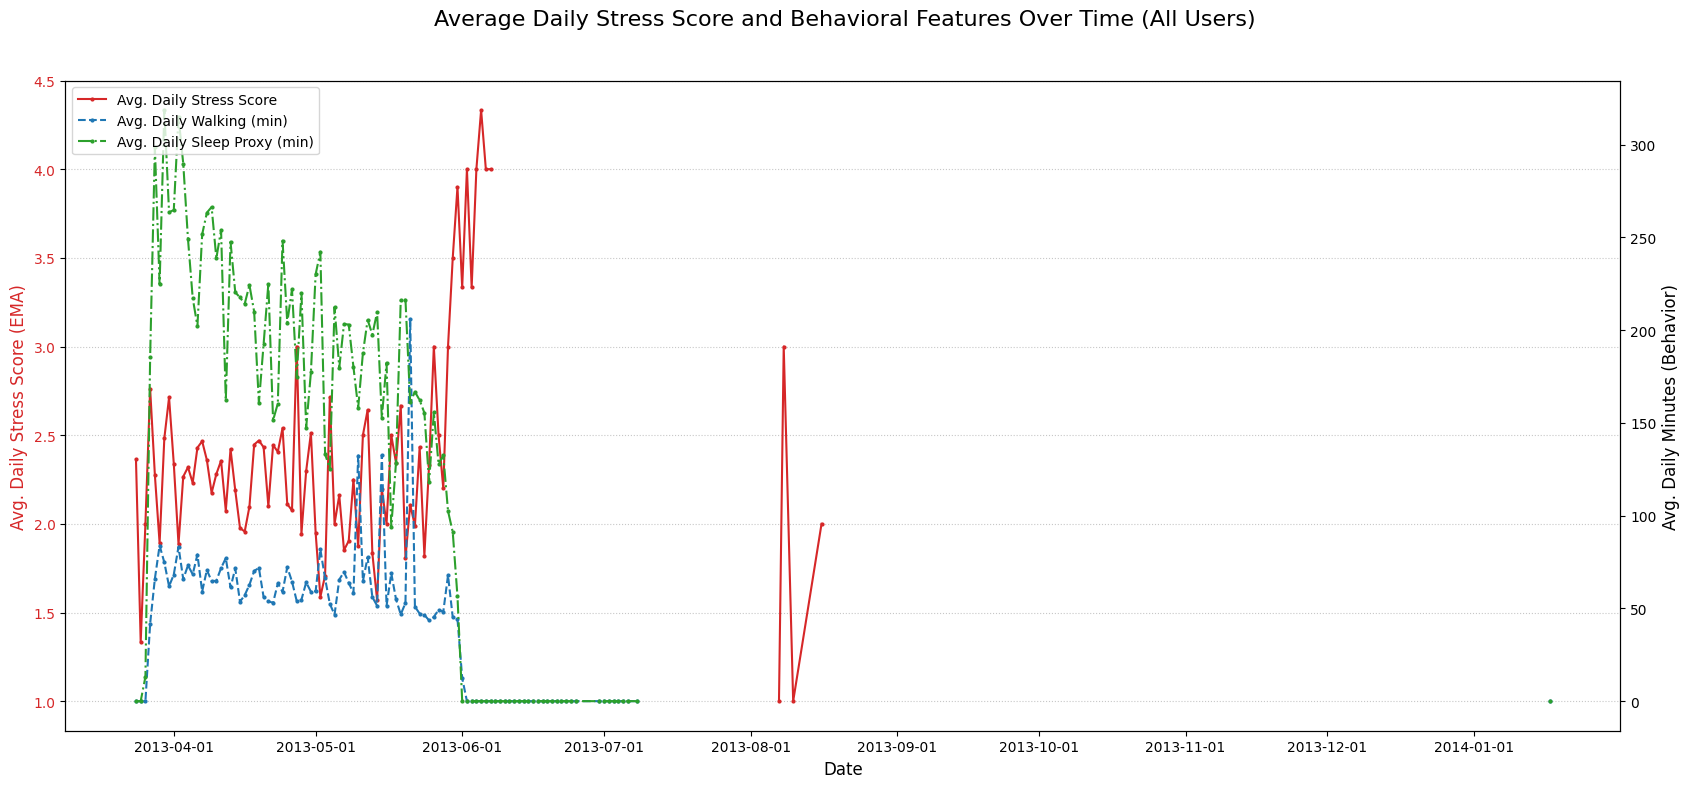

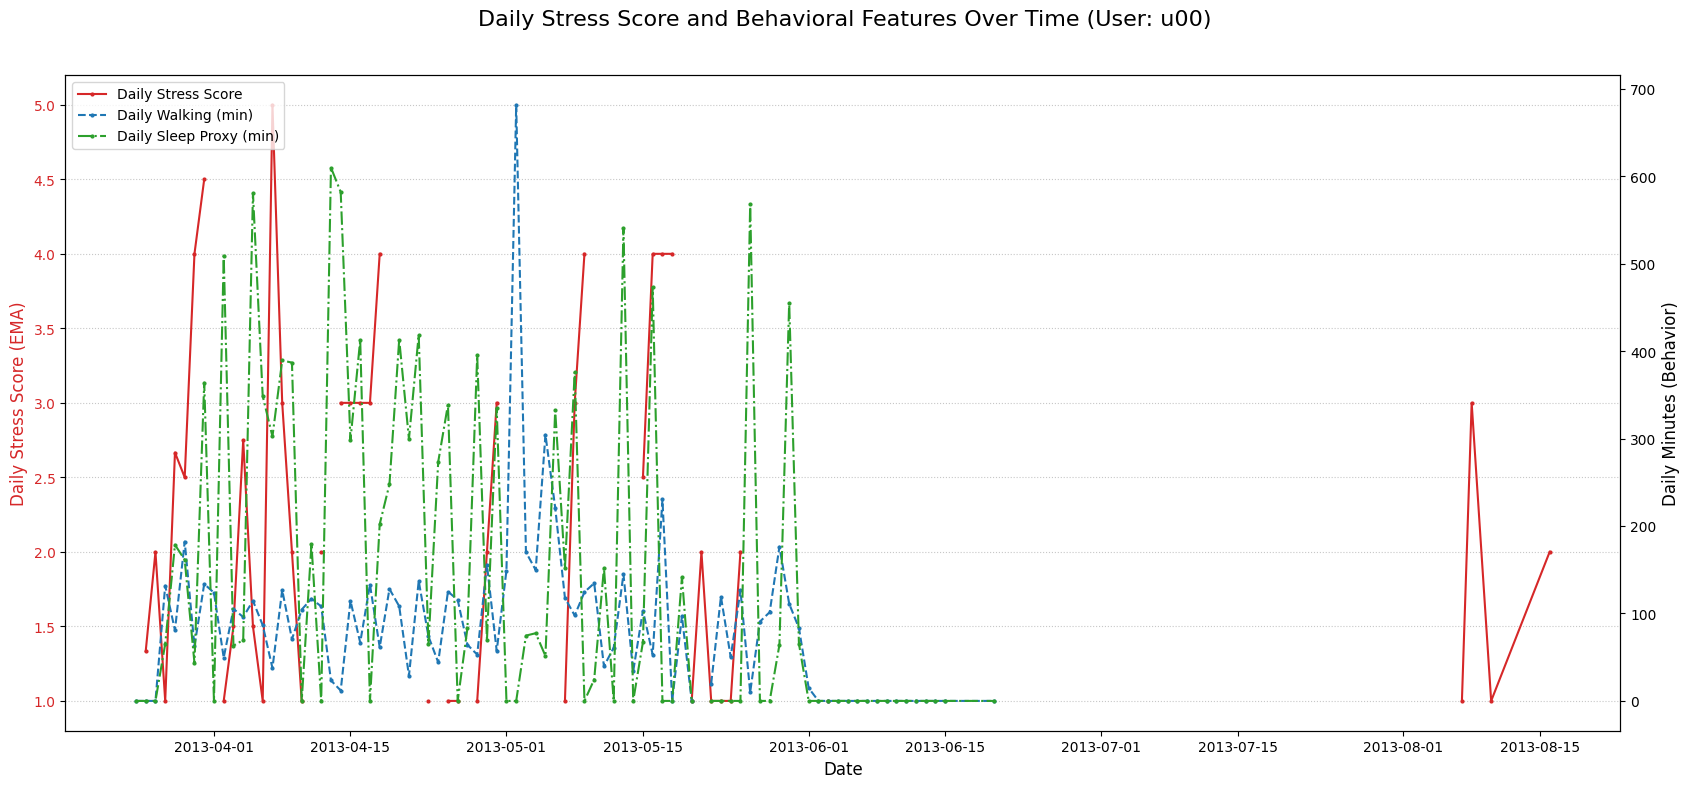

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # For formatting dates on the x-axis
import numpy as np # For handling potential NaNs if any column is all NaN

# Assume 'master_daily_df_final' is loaded and correctly processed from your previous step.

if 'master_daily_df_final' not in locals() or not isinstance(master_daily_df_final, pd.DataFrame) or master_daily_df_final.empty:
    print("ERROR: 'master_daily_df_final' not found or is empty. Please ensure it was created correctly.")
else:
    print("Generating time-series plots for average daily stress, walking, and sleep proxy...")

    # Ensure 'date' is datetime
    master_daily_df_final['date'] = pd.to_datetime(master_daily_df_final['date'])

    # --- Aggregate daily means across all users for selected features ---
    # Define aggregations, handling potential missing columns gracefully for plotting
    agg_dict = {}
    if 'avg_daily_stress_score' in master_daily_df_final.columns:
        agg_dict['mean_stress_score'] = ('avg_daily_stress_score', 'mean')
    if 'Walking' in master_daily_df_final.columns: # This came from daily_activity_pivot_df
        agg_dict['mean_walking_minutes'] = ('Walking', 'mean')
    if 'min_dark_locked_night_minutes' in master_daily_df_final.columns: # Your sleep proxy
        agg_dict['mean_sleep_proxy_minutes'] = ('min_dark_locked_night_minutes', 'mean')

    if not agg_dict:
        print("ERROR: None of the target columns for plotting daily means were found in master_daily_df_final.")
    else:
        daily_means = master_daily_df_final.groupby('date').agg(**agg_dict).reset_index()

        # --- Plotting Cohort Averages ---
        fig, ax1 = plt.subplots(figsize=(17, 8)) # Increased figure size

        # Plot average daily stress score
        if 'mean_stress_score' in daily_means.columns:
            color_stress = 'tab:red'
            ax1.set_xlabel('Date', fontsize=12)
            ax1.set_ylabel('Avg. Daily Stress Score (EMA)', color=color_stress, fontsize=12)
            ax1.plot(daily_means['date'], daily_means['mean_stress_score'], color=color_stress, linestyle='-', marker='.', markersize=4, label='Avg. Daily Stress Score')
            ax1.tick_params(axis='y', labelcolor=color_stress)
            ax1.grid(True, axis='y', linestyle=':', alpha=0.7)

        # Create a second y-axis for behavioral features
        ax2 = ax1.twinx()
        color_walking = 'tab:blue'
        color_sleep = 'tab:green'

        ax2.set_ylabel('Avg. Daily Minutes (Behavior)', fontsize=12) # General label for this axis

        if 'mean_walking_minutes' in daily_means.columns:
            ax2.plot(daily_means['date'], daily_means['mean_walking_minutes'], color=color_walking, linestyle='--', marker='.', markersize=4, label='Avg. Daily Walking (min)')

        if 'mean_sleep_proxy_minutes' in daily_means.columns:
            ax2.plot(daily_means['date'], daily_means['mean_sleep_proxy_minutes'], color=color_sleep, linestyle='-.', marker='.', markersize=4, label='Avg. Daily Sleep Proxy (min)')

        # Formatting the x-axis for dates
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax1.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=10, maxticks=20)) # Auto ticks
        plt.xticks(rotation=45, ha='right')

        fig.suptitle('Average Daily Stress Score and Behavioral Features Over Time (All Users)', fontsize=16)
        fig.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle

        # Consolidate legends
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

        plt.show()

        # --- Plot for a Single User (Example: u00) ---
        sample_uid = 'u00'
        if sample_uid in master_daily_df_final['uid'].unique():
            df_sample_user = master_daily_df_final[master_daily_df_final['uid'] == sample_uid].sort_values(by='date')

            if not df_sample_user.empty:
                fig_user, ax1_user = plt.subplots(figsize=(17, 8))

                # Stress Score for user
                if 'avg_daily_stress_score' in df_sample_user.columns:
                    color_stress_user = 'tab:red'
                    ax1_user.set_xlabel('Date', fontsize=12)
                    ax1_user.set_ylabel('Daily Stress Score (EMA)', color=color_stress_user, fontsize=12)
                    ax1_user.plot(df_sample_user['date'], df_sample_user['avg_daily_stress_score'], color=color_stress_user, linestyle='-', marker='.', markersize=4, label='Daily Stress Score')
                    ax1_user.tick_params(axis='y', labelcolor=color_stress_user)
                    ax1_user.grid(True, axis='y', linestyle=':', alpha=0.7)

                ax2_user = ax1_user.twinx()
                ax2_user.set_ylabel('Daily Minutes (Behavior)', fontsize=12)

                if 'Walking' in df_sample_user.columns:
                    ax2_user.plot(df_sample_user['date'], df_sample_user['Walking'], color='tab:blue', linestyle='--', marker='.', markersize=4, label='Daily Walking (min)')
                if 'min_dark_locked_night_minutes' in df_sample_user.columns:
                     ax2_user.plot(df_sample_user['date'], df_sample_user['min_dark_locked_night_minutes'], color='tab:green', linestyle='-.', marker='.', markersize=4, label='Daily Sleep Proxy (min)')

                ax1_user.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
                ax1_user.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=10, maxticks=20))
                plt.xticks(rotation=45, ha='right')

                fig_user.suptitle(f'Daily Stress Score and Behavioral Features Over Time (User: {sample_uid})', fontsize=16)
                fig_user.tight_layout(rect=[0, 0, 1, 0.96])

                lines1_user, labels1_user = ax1_user.get_legend_handles_labels()
                lines2_user, labels2_user = ax2_user.get_legend_handles_labels()
                ax2_user.legend(lines1_user + lines2_user, labels1_user + labels2_user, loc='upper left', fontsize=10)

                plt.show()
            else:
                print(f"\nNo data for sample user {sample_uid} after filtering.")
        else:
            print(f"\nSample user {sample_uid} not found in the data for individual plot.")

Calculating correlations for daily mean values...

--- Correlation Matrix for Daily Averages ---
                          mean_stress_score  mean_walking_minutes  \
mean_stress_score                  1.000000             -0.473603   
mean_walking_minutes              -0.473603              1.000000   
mean_sleep_proxy_minutes          -0.571935              0.792336   

                          mean_sleep_proxy_minutes  
mean_stress_score                        -0.571935  
mean_walking_minutes                      0.792336  
mean_sleep_proxy_minutes                  1.000000  


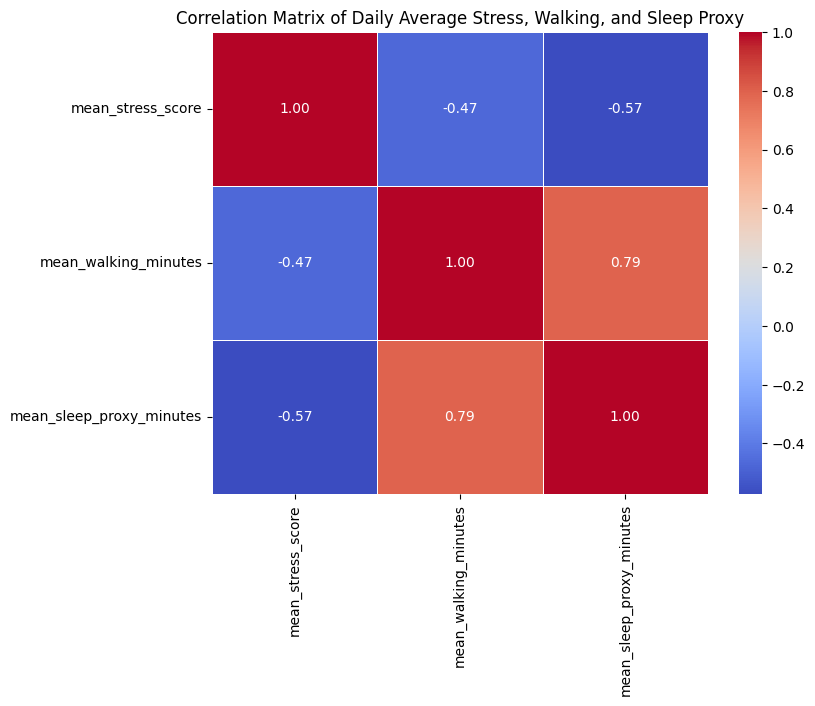

In [ ]:
import pandas as pd
import seaborn as sns # For a nicer heatmap of the correlations
import matplotlib.pyplot as plt

# Assume 'daily_means' DataFrame is available from your previous plotting script.
# It should have columns: 'date', 'mean_stress_score', 'mean_walking_minutes', 'mean_sleep_proxy_minutes'

if 'daily_means' not in locals() or not isinstance(daily_means, pd.DataFrame) or daily_means.empty:
    print("ERROR: 'daily_means' DataFrame not found or is empty. Please ensure the plotting script ran successfully and created it.")
else:
    print("Calculating correlations for daily mean values...")

    # Select only the numeric columns we want to correlate
    columns_to_correlate = []
    if 'mean_stress_score' in daily_means.columns:
        columns_to_correlate.append('mean_stress_score')
    if 'mean_walking_minutes' in daily_means.columns:
        columns_to_correlate.append('mean_walking_minutes')
    if 'mean_sleep_proxy_minutes' in daily_means.columns:
        columns_to_correlate.append('mean_sleep_proxy_minutes')

    if len(columns_to_correlate) < 2:
        print("Not enough numeric columns found in 'daily_means' to calculate correlations.")
    else:
        correlation_df = daily_means[columns_to_correlate]
        correlation_matrix = correlation_df.corr()

        print("\n--- Correlation Matrix for Daily Averages ---")
        print(correlation_matrix)

        # Optional: Visualize the correlation matrix as a heatmap
        if not correlation_matrix.empty:
            plt.figure(figsize=(8, 6))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
            plt.title('Correlation Matrix of Daily Average Stress, Walking, and Sleep Proxy')
            plt.show()
        else:
            print("Correlation matrix is empty.")

Expanding correlation analysis with more daily features...
Aggregating for columns: ['mean_stress_score', 'mean_walking_minutes', 'mean_sleep_proxy_minutes', 'mean_conversation_minutes', 'mean_app_usage_minutes', 'mean_academic_study_minutes', 'mean_happy_intensity']

--- Expanded Correlation Matrix for Daily Averages ---
                             mean_stress_score  mean_walking_minutes  \
mean_stress_score                     1.000000             -0.473603   
mean_walking_minutes                 -0.473603              1.000000   
mean_sleep_proxy_minutes             -0.571935              0.792336   
mean_conversation_minutes            -0.486450              0.850918   
mean_app_usage_minutes               -0.356386              0.385333   
mean_academic_study_minutes          -0.339667              0.650864   
mean_happy_intensity                  0.476974             -0.295727   

                             mean_sleep_proxy_minutes  \
mean_stress_score                         

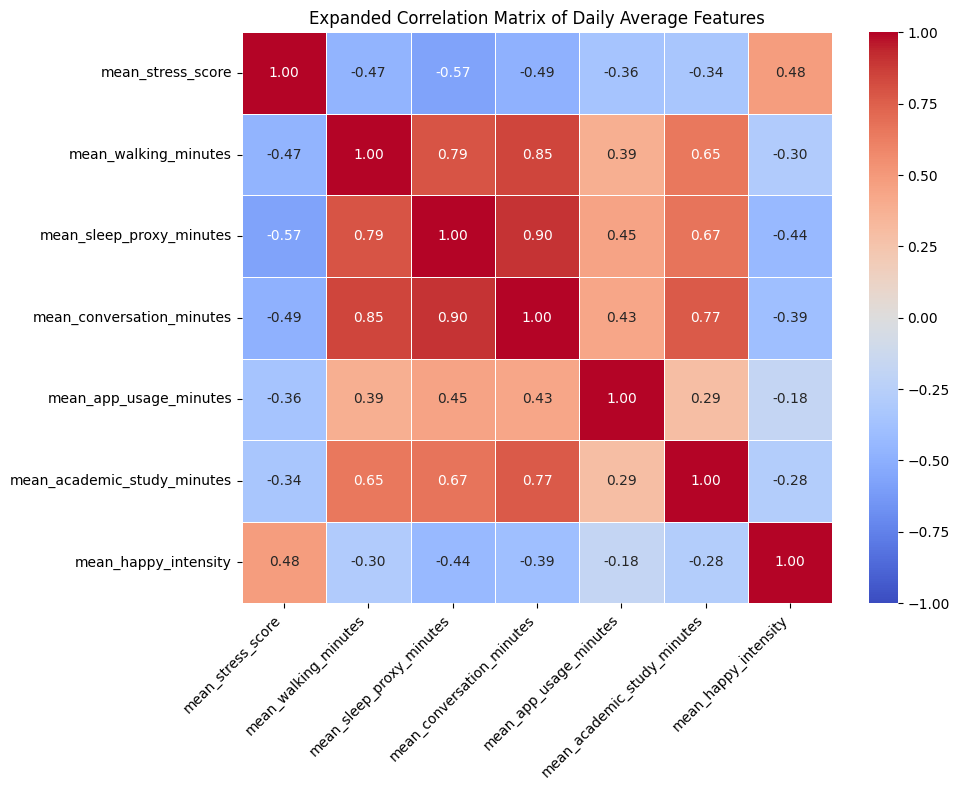

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume 'master_daily_df_final' is available from your previous steps.

if 'master_daily_df_final' not in locals() or not isinstance(master_daily_df_final, pd.DataFrame) or master_daily_df_final.empty:
    print("ERROR: 'master_daily_df_final' not found or is empty. Please ensure it was created correctly.")
else:
    print("Expanding correlation analysis with more daily features...")

    master_daily_df_final['date'] = pd.to_datetime(master_daily_df_final['date'])

    # Define the expanded list of columns for which to calculate daily means
    # Ensure these column names exactly match those in your master_daily_df_final
    columns_for_daily_means = {
        'mean_stress_score': ('avg_daily_stress_score', 'mean'),
        'mean_walking_minutes': ('Walking', 'mean'),
        'mean_sleep_proxy_minutes': ('min_dark_locked_night_minutes', 'mean'),
        'mean_conversation_minutes': ('total_conversation_duration_minutes', 'mean'),
        'mean_app_usage_minutes': ('total_app_foreground_minutes', 'mean'),
        'mean_academic_study_minutes': ('academic_study', 'mean'), # Assuming 'academic_study' is a column
        'mean_happy_intensity': ('avg_daily_happy_intensity', 'mean'),
        # Add other EMA scores or behavioral features as desired
        # e.g., 'mean_sad_intensity': ('avg_daily_sad_intensity', 'mean'),
        # e.g., 'mean_stationary_minutes': ('Stationary', 'mean')
    }

    # Filter out any aggregations for columns not present in the DataFrame
    valid_aggregations = {
        new_col: (orig_col, agg_func)
        for new_col, (orig_col, agg_func) in columns_for_daily_means.items()
        if orig_col in master_daily_df_final.columns
    }

    if not valid_aggregations:
        print("ERROR: None of the specified original columns for aggregation were found in master_daily_df_final.")
    else:
        print(f"Aggregating for columns: {list(valid_aggregations.keys())}")
        daily_means_expanded_df = master_daily_df_final.groupby('date').agg(**valid_aggregations).reset_index()

        # Select only the numeric mean columns for correlation
        columns_to_correlate_expanded = list(valid_aggregations.keys())

        if len(columns_to_correlate_expanded) < 2:
            print("Not enough numeric columns found in 'daily_means_expanded_df' to calculate correlations.")
        else:
            correlation_df_expanded = daily_means_expanded_df[columns_to_correlate_expanded]
            correlation_matrix_expanded = correlation_df_expanded.corr()

            print("\n--- Expanded Correlation Matrix for Daily Averages ---")
            print(correlation_matrix_expanded)

            if not correlation_matrix_expanded.empty:
                plt.figure(figsize=(10, 8)) # Adjusted size for more variables
                sns.heatmap(correlation_matrix_expanded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
                plt.title('Expanded Correlation Matrix of Daily Average Features')
                plt.xticks(rotation=45, ha='right')
                plt.yticks(rotation=0)
                plt.tight_layout()
                plt.show()
            else:
                print("Expanded correlation matrix is empty.")

Correlations with mean_stress_score:
mean_walking_minutes: -0.47 (Moderate negative) - As seen before, higher average stress tends to correlate with less walking.
mean_sleep_proxy_minutes: -0.57 (Moderate to strong negative) - Higher average stress correlates with less sleep.
mean_conversation_minutes: -0.49 (Moderate negative) - Higher average stress tends to correlate with less time in conversations.
mean_app_usage_minutes: -0.36 (Weak to moderate negative) - Higher average stress correlates with slightly less app usage.
mean_academic_study_minutes: -0.34 (Weak to moderate negative) - Higher average stress correlates with slightly less time in academic/study locations. This is interesting, as one might expect stress to increase with study time, or vice-versa. It could reflect avoidance or difficulty concentrating when stressed.
mean_happy_intensity: 0.48 (Moderate positive) - Higher average stress correlates with higher reported happiness intensity. This is a very counter-intuitive finding and definitely warrants a closer look! It's possible that the avg_daily_happy_intensity is calculated only on days when happiness was reported, and perhaps only very intensely happy moments were reported on high-stress days, or there's a more complex interaction. It could also be an artifact if there are few co-occurrences of stress and happiness EMAs.
Other Interesting Correlations:
mean_walking_minutes shows strong positive correlations with:
mean_sleep_proxy_minutes (0.79)
mean_conversation_minutes (0.85)
mean_academic_study_minutes (0.65) This suggests that days with more walking were also days with more sleep, more conversation, and more time in academic/study locations. This paints a picture of generally more active and engaged days.
mean_sleep_proxy_minutes also correlates positively with:
mean_conversation_minutes (0.90) - Very strong.
mean_academic_study_minutes (0.67) Suggesting that more sleep is associated with more conversation and more study time.
mean_conversation_minutes and mean_academic_study_minutes (0.77) are also strongly correlated.
mean_app_usage_minutes shows positive correlations with walking (0.39), sleep (0.45), conversation (0.43), and academic study time (0.29), though these are weaker than the others.
mean_happy_intensity shows negative correlations with most behavioral measures (walking, sleep, conversation, app usage, academic study) except for stress. For example, mean_happy_intensity vs. mean_sleep_proxy_minutes is -0.44. This would mean on days where average happiness intensity (when reported) was higher, sleep was lower. This, combined with the positive correlation with stress, makes the mean_happy_intensity variable particularly intriguing and might require careful consideration of how it was calculated (e.g., how many mood EMAs contributed to the daily average, were "happy" and "sad" EMAs answered at the same time, etc.).


Data for scatter plot (head):
   mean_stress_score  mean_happy_intensity
0           2.363636                   NaN
1           1.333333                   NaN
2           2.000000                   NaN
3           2.761905                   NaN
4           2.275132                   NaN

Descriptive statistics for plot data:
       mean_stress_score  mean_happy_intensity
count          80.000000             47.000000
mean            2.390889              1.950234
std             0.645469              0.571290
min             1.000000              1.000000
25%             2.000000              1.616667
50%             2.308612              2.000000
75%             2.502976              2.208333
max             4.333333              3.500000

Non-NaN count for mean_stress_score: 80
Non-NaN count for mean_happy_intensity: 47

Number of valid data points for plotting (after dropping NaNs): 47

Generating scatter plot for Mean Daily Stress Score vs. Mean Daily Happy Intensity...


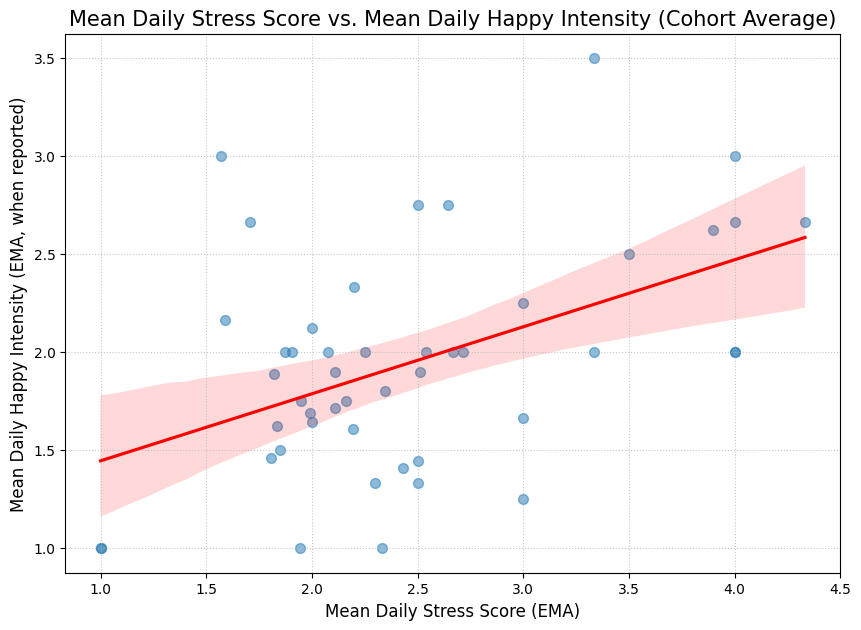


--- Days where both Mean Stress and Mean Happy Intensity were in their top 25th percentile (based on days with valid data for both) ---
         date  mean_stress_score  mean_happy_intensity
66 2013-05-29           3.000000              2.250000
67 2013-05-30           3.500000              2.500000
68 2013-05-31           3.900000              2.625000
70 2013-06-02           4.000000              3.000000
71 2013-06-03           3.333333              3.500000
72 2013-06-04           4.000000              2.666667
73 2013-06-05           4.333333              2.666667
Number of such days: 7


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'daily_means_expanded_df' is available from your previous steps.

if 'daily_means_expanded_df' not in locals() or not isinstance(daily_means_expanded_df, pd.DataFrame) or daily_means_expanded_df.empty:
    print("ERROR: 'daily_means_expanded_df' DataFrame not found or is empty. Please ensure it was created correctly.")
elif 'mean_stress_score' not in daily_means_expanded_df.columns or 'mean_happy_intensity' not in daily_means_expanded_df.columns:
    print("ERROR: 'mean_stress_score' or 'mean_happy_intensity' column not found in daily_means_expanded_df.")
    print(f"Available columns: {daily_means_expanded_df.columns.tolist()}")
else:
    print("Data for scatter plot (head):")
    plot_data = daily_means_expanded_df[['mean_stress_score', 'mean_happy_intensity']].copy()
    print(plot_data.head())
    print("\nDescriptive statistics for plot data:")
    print(plot_data.describe())

    # Count non-NaN values to ensure there's data to plot
    print(f"\nNon-NaN count for mean_stress_score: {plot_data['mean_stress_score'].notna().sum()}")
    print(f"Non-NaN count for mean_happy_intensity: {plot_data['mean_happy_intensity'].notna().sum()}")

    # Drop rows where EITHER of these specific columns is NaN for plotting purposes
    plot_data_cleaned = plot_data.dropna()
    print(f"\nNumber of valid data points for plotting (after dropping NaNs): {len(plot_data_cleaned)}")

    if len(plot_data_cleaned) < 2: # Need at least 2 points for a regression line
        print("Not enough valid data points to generate a meaningful scatter plot with regression line.")
    else:
        print("\nGenerating scatter plot for Mean Daily Stress Score vs. Mean Daily Happy Intensity...")

        plt.figure(figsize=(10, 7))
        sns.regplot(x='mean_stress_score', y='mean_happy_intensity', data=plot_data_cleaned,
                    scatter_kws={'alpha':0.5, 's':50},
                    line_kws={'color':'red'})

        plt.title('Mean Daily Stress Score vs. Mean Daily Happy Intensity (Cohort Average)', fontsize=15)
        plt.xlabel('Mean Daily Stress Score (EMA)', fontsize=12)
        plt.ylabel('Mean Daily Happy Intensity (EMA, when reported)', fontsize=12)
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.show() # Ensure plot is displayed

        # --- Identifying High-Stress & High-Happiness Days (using cleaned data for thresholds) ---
        if len(plot_data_cleaned) > 0: # Check if plot_data_cleaned is not empty
            high_stress_threshold = plot_data_cleaned['mean_stress_score'].quantile(0.75)
            high_happiness_threshold = plot_data_cleaned['mean_happy_intensity'].quantile(0.75)

            # We need to filter the original daily_means_expanded_df to include the 'date'
            days_high_stress_and_happy = daily_means_expanded_df[
                (daily_means_expanded_df['mean_stress_score'] >= high_stress_threshold) &
                (daily_means_expanded_df['mean_happy_intensity'] >= high_happiness_threshold)
            ]
            print(f"\n--- Days where both Mean Stress and Mean Happy Intensity were in their top 25th percentile (based on days with valid data for both) ---")
            if not days_high_stress_and_happy.empty:
                print(days_high_stress_and_happy[['date', 'mean_stress_score', 'mean_happy_intensity']])
                print(f"Number of such days: {len(days_high_stress_and_happy)}")
            else:
                print("No days found where both metrics were simultaneously in their top 25th percentile.")
        else:
            print("\nNo valid data points available to calculate thresholds for high-stress/high-happiness days.")

Expanding correlation analysis with more daily EMA and behavioral features...
Aggregating for columns: ['mean_stress_score', 'mean_walking_minutes', 'mean_sleep_proxy_minutes', 'mean_conversation_minutes', 'mean_app_usage_minutes', 'mean_academic_study_minutes', 'mean_happy_intensity', 'mean_sad_intensity', 'mean_pct_time_happy', 'mean_pct_time_sad']

--- More Expanded Correlation Matrix for Daily Averages ---
                             mean_stress_score  mean_walking_minutes  \
mean_stress_score                     1.000000             -0.592426   
mean_walking_minutes                 -0.592426              1.000000   
mean_sleep_proxy_minutes             -0.838386              0.544804   
mean_conversation_minutes            -0.702037              0.636333   
mean_app_usage_minutes               -0.303771              0.094862   
mean_academic_study_minutes          -0.567116              0.455446   
mean_happy_intensity                  0.392382             -0.295727   
mean_sad_i

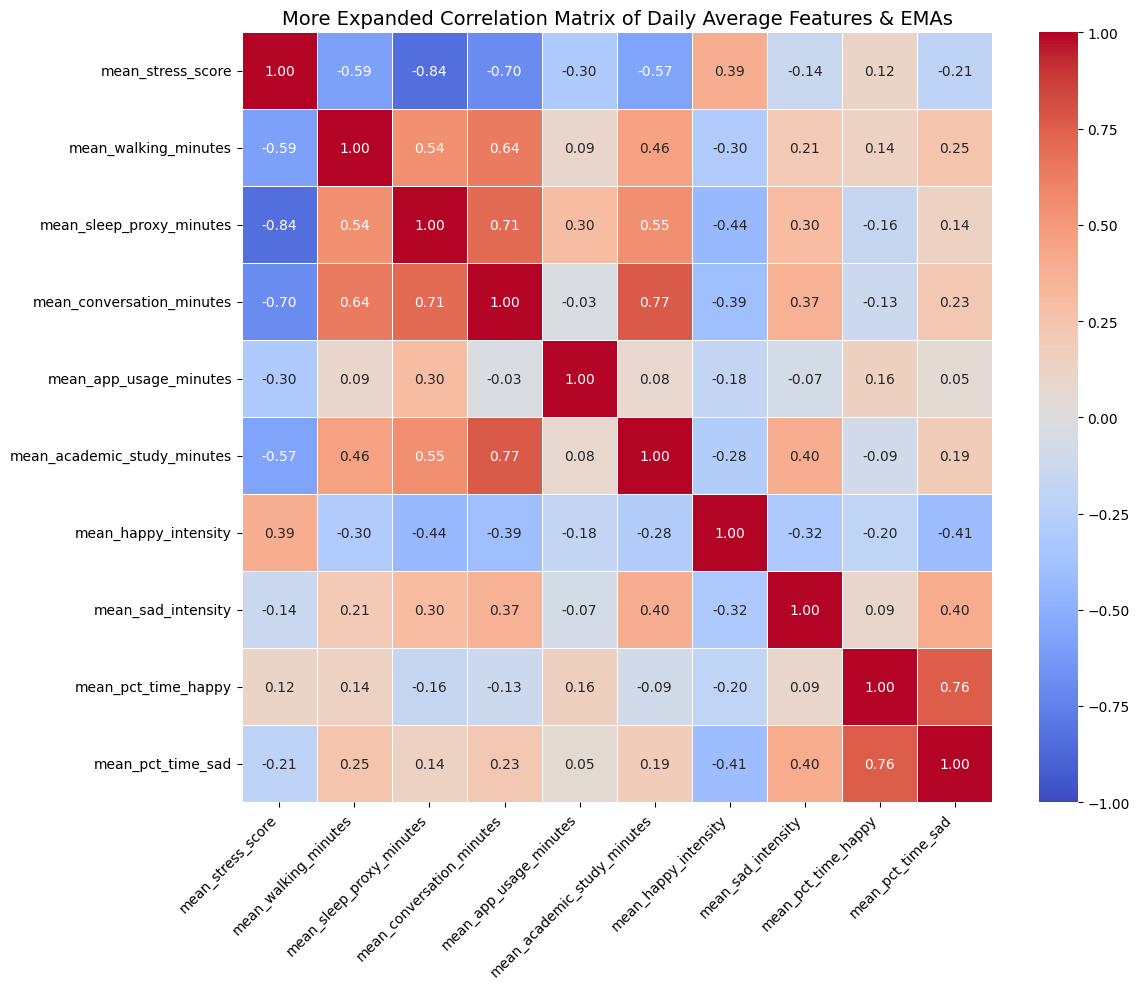

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume 'master_daily_df_final' is available from your previous steps.
# It should contain all merged daily behavioral features and daily aggregated EMA scores.

if 'master_daily_df_final' not in locals() or not isinstance(master_daily_df_final, pd.DataFrame) or master_daily_df_final.empty:
    print("ERROR: 'master_daily_df_final' DataFrame not found or is empty. Please ensure it was created correctly.")
else:
    print("Expanding correlation analysis with more daily EMA and behavioral features...")

    master_daily_df_final['date'] = pd.to_datetime(master_daily_df_final['date'])

    # Define the expanded list of columns for which to calculate daily means
    # These are the NEW column names in daily_means_more_expanded_df and the (original_column, aggregation_function)
    columns_for_daily_means_v3 = {
        'mean_stress_score': ('avg_daily_stress_score', 'mean'),
        'mean_walking_minutes': ('Walking', 'mean'),
        'mean_sleep_proxy_minutes': ('min_dark_locked_night_minutes', 'mean'),
        'mean_conversation_minutes': ('total_conversation_duration_minutes', 'mean'),
        'mean_app_usage_minutes': ('total_app_foreground_minutes', 'mean'),
        'mean_academic_study_minutes': ('academic_study', 'mean'),
        'mean_happy_intensity': ('avg_daily_happy_intensity', 'mean'),
        'mean_sad_intensity': ('avg_daily_sad_intensity', 'mean'),   # Added
        'mean_pct_time_happy': ('pct_time_happy', 'mean'),             # Added
        'mean_pct_time_sad': ('pct_time_sad', 'mean')                # Added
        # Add other EMA scores or behavioral features as desired
    }

    # Filter out any aggregations for columns not present in the DataFrame
    valid_aggregations_v3 = {
        new_col: (orig_col, agg_func)
        for new_col, (orig_col, agg_func) in columns_for_daily_means_v3.items()
        if orig_col in master_daily_df_final.columns
    }

    if not valid_aggregations_v3:
        print("ERROR: None of the specified original columns for aggregation were found in master_daily_df_final.")
    else:
        print(f"Aggregating for columns: {list(valid_aggregations_v3.keys())}")
        daily_means_more_expanded_df = master_daily_df_final.groupby('date').agg(**valid_aggregations_v3).reset_index()

        # Select only the numeric mean columns for correlation
        columns_to_correlate_more_expanded = list(valid_aggregations_v3.keys())

        if len(columns_to_correlate_more_expanded) < 2:
            print("Not enough numeric columns found in 'daily_means_more_expanded_df' to calculate correlations.")
        else:
            # Drop rows with any NaNs in the selected columns before correlation
            # This ensures the correlation matrix is computed on a consistent set of days for all variables
            correlation_df_more_expanded = daily_means_more_expanded_df[columns_to_correlate_more_expanded].dropna()

            if len(correlation_df_more_expanded) < 2:
                print("Not enough data points after dropping NaNs from selected columns to compute correlations.")
            else:
                correlation_matrix_more_expanded = correlation_df_more_expanded.corr()

                print("\n--- More Expanded Correlation Matrix for Daily Averages ---")
                print(correlation_matrix_more_expanded)

                if not correlation_matrix_more_expanded.empty:
                    plt.figure(figsize=(12, 10)) # Adjusted size for more variables
                    sns.heatmap(correlation_matrix_more_expanded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
                    plt.title('More Expanded Correlation Matrix of Daily Average Features & EMAs', fontsize=14)
                    plt.xticks(rotation=45, ha='right', fontsize=10)
                    plt.yticks(rotation=0, fontsize=10)
                    plt.tight_layout()
                    plt.show()
                else:
                    print("More expanded correlation matrix is empty.")

Preparing data and generating scatter plot for Mean % Time Happy vs. Mean % Time Sad...

--- Info for daily_means_more_expanded_df (source for plot data) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Columns: 11 entries, date to mean_pct_time_sad
dtypes: datetime64[ns](1), float64(10)
Number of valid data points for plotting/correlation (after dropping NaNs): 107

--- Descriptive Statistics for Plot Data ---
Descriptive stats for 'mean_pct_time_happy':
count    107.000000
mean       4.615176
std        7.727553
min        0.000000
25%        0.000000
50%        0.000000
75%        7.217262
max       34.722222
Name: mean_pct_time_happy, dtype: float64

Descriptive stats for 'mean_pct_time_sad':
count    107.000000
mean       2.708454
std        5.231704
min        0.000000
25%        0.000000
50%        0.000000
75%        4.499494
max       27.500000
Name: mean_pct_time_sad, dtype: float64

--- Correlation between Mean % Time Happy and Mean % Time Sad ---


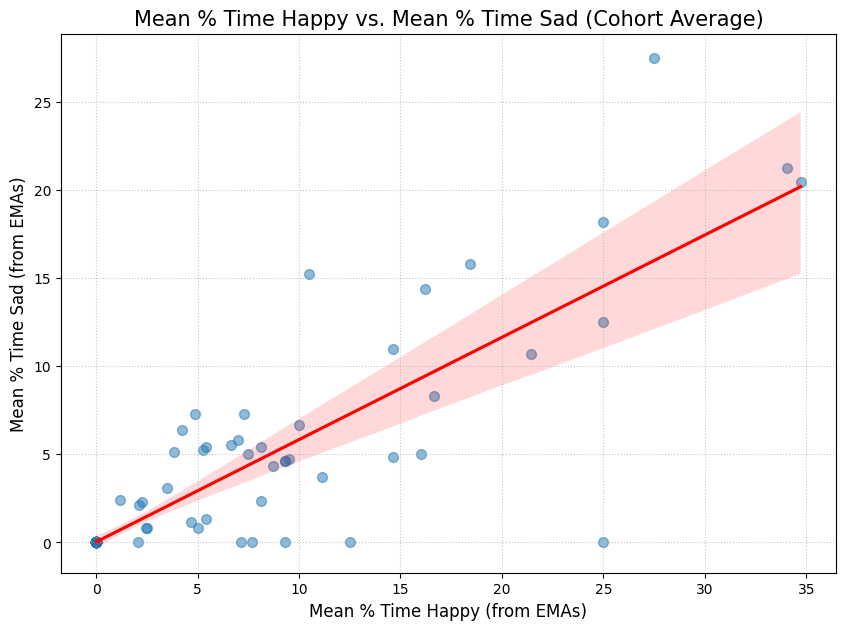

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume 'daily_means_more_expanded_df' is available from your previous steps.
# It should have columns: 'date', 'mean_pct_time_happy', 'mean_pct_time_sad', etc.

if 'daily_means_more_expanded_df' not in locals() or not isinstance(daily_means_more_expanded_df, pd.DataFrame) or daily_means_more_expanded_df.empty:
    print("ERROR: 'daily_means_more_expanded_df' DataFrame not found or is empty.")
    print("Please ensure the script that creates 'daily_means_more_expanded_df' (by aggregating master_daily_df_final) has been run successfully.")
elif 'mean_pct_time_happy' not in daily_means_more_expanded_df.columns or 'mean_pct_time_sad' not in daily_means_more_expanded_df.columns:
    print("ERROR: 'mean_pct_time_happy' or 'mean_pct_time_sad' column not found in daily_means_more_expanded_df.")
    print(f"Available columns: {daily_means_more_expanded_df.columns.tolist()}")
else:
    print("Preparing data and generating scatter plot for Mean % Time Happy vs. Mean % Time Sad...")

    # --- Text Output 1: Basic Info about the source DataFrame ---
    print("\n--- Info for daily_means_more_expanded_df (source for plot data) ---")
    daily_means_more_expanded_df.info(verbose=False, memory_usage=False) # Concise info

    # Select the relevant columns and drop rows where EITHER is NaN for plotting & correlation
    plot_data_mood_pct = daily_means_more_expanded_df[['mean_pct_time_happy', 'mean_pct_time_sad']].copy().dropna()

    print(f"\nNumber of valid data points for plotting/correlation (after dropping NaNs): {len(plot_data_mood_pct)}")

    if len(plot_data_mood_pct) < 2:
        print("Not enough valid data points to generate a meaningful scatter plot or calculate correlation.")
    else:
        # --- Text Output 2: Descriptive Statistics ---
        print("\n--- Descriptive Statistics for Plot Data ---")
        print("Descriptive stats for 'mean_pct_time_happy':")
        print(plot_data_mood_pct['mean_pct_time_happy'].describe())
        print("\nDescriptive stats for 'mean_pct_time_sad':")
        print(plot_data_mood_pct['mean_pct_time_sad'].describe())

        # --- Text Output 3: Correlation Coefficient ---
        correlation_value = plot_data_mood_pct['mean_pct_time_happy'].corr(plot_data_mood_pct['mean_pct_time_sad'])
        print(f"\n--- Correlation between Mean % Time Happy and Mean % Time Sad ---")
        print(f"Pearson Correlation: {correlation_value:.2f}")

        # --- Text Output 4: Sample Data Points ---
        print("\n--- Sample Data Points Used for Plot (first 5) ---")
        print(plot_data_mood_pct.head())

        # --- Generate Scatter Plot (for you to view) ---
        print("\nGenerating scatter plot (this will be displayed on your end)...")
        plt.figure(figsize=(10, 7))
        sns.regplot(x='mean_pct_time_happy', y='mean_pct_time_sad', data=plot_data_mood_pct,
                    scatter_kws={'alpha':0.5, 's':50},
                    line_kws={'color':'red'})

        plt.title('Mean % Time Happy vs. Mean % Time Sad (Cohort Average)', fontsize=15)
        plt.xlabel('Mean % Time Happy (from EMAs)', fontsize=12)
        plt.ylabel('Mean % Time Sad (from EMAs)', fontsize=12)
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.show()

Investigating correlation after excluding days where both happy and sad percentages are zero...

Number of data points after excluding (0,0) days: 45

--- Correlation between Mean % Time Happy and Mean % Time Sad (excluding (0,0) days) ---
Pearson Correlation: 0.76

--- Sample Data Points Used for Non-Zero Plot (first 5) ---
    mean_pct_time_happy  mean_pct_time_sad
31             2.083333           0.000000
32            34.722222          20.486111
33             8.139535           2.325581
34             4.255319           6.382979
35             2.127660           2.127660

--- Descriptive Statistics for Non-Zero Plot Data ---
Descriptive stats for 'mean_pct_time_happy' (non-zero subset):
count    45.000000
mean     10.973863
std       8.514328
min       1.190476
25%       5.000000
50%       8.139535
75%      14.634146
max      34.722222
Name: mean_pct_time_happy, dtype: float64

Descriptive stats for 'mean_pct_time_sad' (non-zero subset):
count    45.000000
mean      6.440101
std

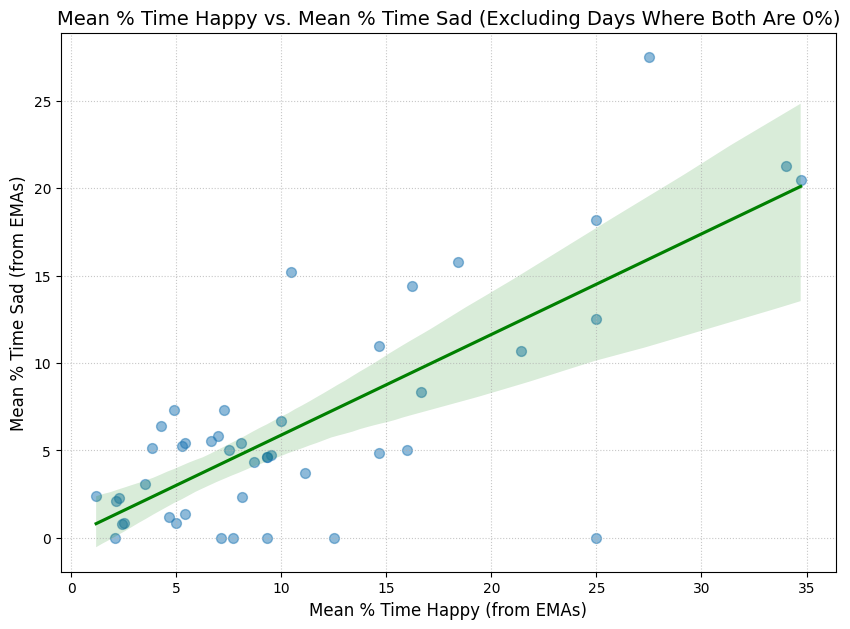

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume 'daily_means_more_expanded_df' is available and processed
# and 'plot_data_mood_pct' was created in the previous step.

if 'plot_data_mood_pct' not in locals() or not isinstance(plot_data_mood_pct, pd.DataFrame) or plot_data_mood_pct.empty:
    print("ERROR: 'plot_data_mood_pct' (with non-NaN happy/sad percentages) not found. Please ensure the previous script ran.")
else:
    print("Investigating correlation after excluding days where both happy and sad percentages are zero...")

    # Filter out days where both mean_pct_time_happy AND mean_pct_time_sad are zero
    plot_data_mood_pct_non_zero = plot_data_mood_pct[
        ~((plot_data_mood_pct['mean_pct_time_happy'] == 0) & (plot_data_mood_pct['mean_pct_time_sad'] == 0))
    ].copy() # Use .copy() to avoid SettingWithCopyWarning if you modify it later

    print(f"\nNumber of data points after excluding (0,0) days: {len(plot_data_mood_pct_non_zero)}")

    if len(plot_data_mood_pct_non_zero) < 2:
        print("Not enough data points left after excluding (0,0) days to calculate correlation or plot.")
    else:
        # --- Text Output: Recalculate Correlation ---
        correlation_value_non_zero = plot_data_mood_pct_non_zero['mean_pct_time_happy'].corr(plot_data_mood_pct_non_zero['mean_pct_time_sad'])
        print(f"\n--- Correlation between Mean % Time Happy and Mean % Time Sad (excluding (0,0) days) ---")
        print(f"Pearson Correlation: {correlation_value_non_zero:.2f}")

        # --- Text Output: Sample Data Points for this subset ---
        print("\n--- Sample Data Points Used for Non-Zero Plot (first 5) ---")
        print(plot_data_mood_pct_non_zero.head())

        # --- Descriptive statistics for this subset ---
        print("\n--- Descriptive Statistics for Non-Zero Plot Data ---")
        print("Descriptive stats for 'mean_pct_time_happy' (non-zero subset):")
        print(plot_data_mood_pct_non_zero['mean_pct_time_happy'].describe())
        print("\nDescriptive stats for 'mean_pct_time_sad' (non-zero subset):")
        print(plot_data_mood_pct_non_zero['mean_pct_time_sad'].describe())

        # --- Generate Scatter Plot for this subset (for you to view) ---
        print("\nGenerating scatter plot for non-(0,0) days (this will be displayed on your end)...")
        plt.figure(figsize=(10, 7))
        sns.regplot(x='mean_pct_time_happy', y='mean_pct_time_sad', data=plot_data_mood_pct_non_zero,
                    scatter_kws={'alpha':0.5, 's':50},
                    line_kws={'color':'green'})

        plt.title('Mean % Time Happy vs. Mean % Time Sad (Excluding Days Where Both Are 0%)', fontsize=14)
        plt.xlabel('Mean % Time Happy (from EMAs)', fontsize=12)
        plt.ylabel('Mean % Time Sad (from EMAs)', fontsize=12)
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.show()

## **MODEL BUILDING**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # Changed to Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# This section assumes:
# - 'X_train_class_full_scaled' is your full scaled training set features for classification.
# - 'y_train_class' is your full training set binarized target variable (0 or 1).
# - 'X_test_class_scaled' is your scaled test set features for classification.
# - 'y_test_class' is your test set binarized target variable.
# - 'feature_columns' is the list of feature names used to create X_train_class_full.

if 'X_train_class_full_scaled' not in locals() or \
   'y_train_class' not in locals() or \
   'X_test_class_scaled' not in locals() or \
   'y_test_class' not in locals() or \
   'feature_columns' not in locals():
    print("ERROR: Full training/test data for classification or feature_columns not found.")
    print("Please ensure the data preparation and splitting (including binarizing the target) for the classification task were run successfully.")
else:
    if X_train_class_full_scaled.shape[0] == 0:
        print("ERROR: Full training set (X_train_class_full_scaled) is empty. Cannot proceed.")
    else:
        print("\n--- Training RandomForestClassifier model ---")

        # Initial parameters to control complexity and potential overfitting
        # You can experiment with these
        rf_classifier = RandomForestClassifier(
            n_estimators=100,     # Number of trees
            max_depth=10,         # Limit tree depth (e.g., 5, 10, 15)
            min_samples_leaf=5,   # Minimum samples at a leaf node (e.g., 5, 10, 20)
            min_samples_split=10, # Minimum samples to split an internal node
            random_state=42,
            class_weight='balanced', # Helpful for slightly imbalanced classes
            n_jobs=-1
        )

        print("Training RandomForestClassifier model on the full training set...")
        rf_classifier.fit(X_train_class_full_scaled, y_train_class)
        print("Model training complete.")

        # Evaluate on Training Set
        predictions_train_rf = rf_classifier.predict(X_train_class_full_scaled)
        print("\n--- RandomForestClassifier - Training Set Performance ---")
        print(classification_report(y_train_class, predictions_train_rf, target_names=['Low Stress (0)', 'High Stress (1)']))

        # Evaluate on Test Set
        if X_test_class_scaled.shape[0] > 0:
            predictions_test_rf = rf_classifier.predict(X_test_class_scaled)
            print("\n--- RandomForestClassifier - Test Set Performance ---")
            print(classification_report(y_test_class, predictions_test_rf, target_names=['Low Stress (0)', 'High Stress (1)']))

            accuracy_test_rf = accuracy_score(y_test_class, predictions_test_rf)
            precision_test_rf = precision_score(y_test_class, predictions_test_rf, pos_label=1, zero_division=0) # Precision for 'High Stress'
            recall_test_rf = recall_score(y_test_class, predictions_test_rf, pos_label=1, zero_division=0)    # Recall for 'High Stress'
            f1_test_rf = f1_score(y_test_class, predictions_test_rf, pos_label=1, zero_division=0)          # F1 for 'High Stress'

            print(f"\nTest Set Accuracy: {accuracy_test_rf:.4f}")
            print(f"Test Set Precision (for class 1 'High Stress'): {precision_test_rf:.4f}")
            print(f"Test Set Recall (for class 1 'High Stress'): {recall_test_rf:.4f}")
            print(f"Test Set F1-score (for class 1 'High Stress'): {f1_test_rf:.4f}")
        else:
            print("Test set is empty, cannot evaluate test performance.")

        # Feature importances
        if hasattr(rf_classifier, 'feature_importances_'):
            importances_rf = rf_classifier.feature_importances_
            feature_importance_rf_df = pd.DataFrame({'feature': feature_columns, 'importance': importances_rf})
            feature_importance_rf_df = feature_importance_rf_df.sort_values(by='importance', ascending=False)
            print("\nTop 10 Feature Importances (RandomForestClassifier):")
            print(feature_importance_rf_df.head(10))


--- Training RandomForestClassifier model ---
Training RandomForestClassifier model on the full training set...
Model training complete.

--- RandomForestClassifier - Training Set Performance ---
                 precision    recall  f1-score   support

 Low Stress (0)       0.96      0.96      0.96       548
High Stress (1)       0.94      0.94      0.94       399

       accuracy                           0.95       947
      macro avg       0.95      0.95      0.95       947
   weighted avg       0.95      0.95      0.95       947


--- RandomForestClassifier - Test Set Performance ---
                 precision    recall  f1-score   support

 Low Stress (0)       0.58      0.68      0.63       136
High Stress (1)       0.51      0.41      0.45       111

       accuracy                           0.55       247
      macro avg       0.54      0.54      0.54       247
   weighted avg       0.55      0.55      0.55       247


Test Set Accuracy: 0.5547
Test Set Precision (for class 1

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# This section assumes:
# - 'X_train_class_full_scaled', 'y_train_class', 'X_test_class_scaled', 'y_test_class',
# - and 'feature_columns' are available from your previous steps.

if 'X_train_class_full_scaled' not in locals() or \
   'y_train_class' not in locals() or \
   'X_test_class_scaled' not in locals() or \
   'y_test_class' not in locals() or \
   'feature_columns' not in locals():
    print("ERROR: Full training/test data for classification or feature_columns not found.")
else:
    if X_train_class_full_scaled.shape[0] == 0:
        print("ERROR: Full training set (X_train_class_full_scaled) is empty. Cannot proceed.")
    else:
        print("\n--- Training RandomForestClassifier with MORE CONSTRAINTS to reduce overfitting ---")

        rf_classifier_v2 = RandomForestClassifier(
            n_estimators=100,     # Number of trees (can reduce to e.g., 50 for faster tuning)
            max_depth=7,          # Reduced max_depth (e.g., try 5, 7, 8)
            min_samples_leaf=15,  # Increased min_samples_leaf (e.g., try 10, 15, 20, 30)
            min_samples_split=30, # Increased min_samples_split (e.g., try 20, 30, 40)
            random_state=42,
            class_weight='balanced',
            n_jobs=-1
        )

        print("Training more constrained RandomForestClassifier model on the full training set...")
        rf_classifier_v2.fit(X_train_class_full_scaled, y_train_class)
        print("Model training complete.")

        # Evaluate on Training Set
        predictions_train_rf_v2 = rf_classifier_v2.predict(X_train_class_full_scaled)
        print("\n--- More Constrained RandomForestClassifier - Training Set Performance ---")
        print(classification_report(y_train_class, predictions_train_rf_v2, target_names=['Low Stress (0)', 'High Stress (1)']))

        # Evaluate on Test Set
        if X_test_class_scaled.shape[0] > 0:
            predictions_test_rf_v2 = rf_classifier_v2.predict(X_test_class_scaled)
            print("\n--- More Constrained RandomForestClassifier - Test Set Performance ---")
            print(classification_report(y_test_class, predictions_test_rf_v2, target_names=['Low Stress (0)', 'High Stress (1)']))

            accuracy_test_rf_v2 = accuracy_score(y_test_class, predictions_test_rf_v2)
            # Use pos_label=1 for 'High Stress' class specifically, zero_division=0 to avoid warnings if a class isn't predicted
            precision_test_rf_v2 = precision_score(y_test_class, predictions_test_rf_v2, pos_label=1, zero_division=0)
            recall_test_rf_v2 = recall_score(y_test_class, predictions_test_rf_v2, pos_label=1, zero_division=0)
            f1_test_rf_v2 = f1_score(y_test_class, predictions_test_rf_v2, pos_label=1, zero_division=0)

            print(f"\nTest Set Accuracy: {accuracy_test_rf_v2:.4f}")
            print(f"Test Set Precision (for class 1 'High Stress'): {precision_test_rf_v2:.4f}")
            print(f"Test Set Recall (for class 1 'High Stress'): {recall_test_rf_v2:.4f}")
            print(f"Test Set F1-score (for class 1 'High Stress'): {f1_test_rf_v2:.4f}")
        else:
            print("Test set is empty, cannot evaluate test performance.")

        if hasattr(rf_classifier_v2, 'feature_importances_'):
            importances_rf_v2 = rf_classifier_v2.feature_importances_
            feature_importance_rf_df_v2 = pd.DataFrame({'feature': feature_columns, 'importance': importances_rf_v2})
            feature_importance_rf_df_v2 = feature_importance_rf_df_v2.sort_values(by='importance', ascending=False)
            print("\nTop 10 Feature Importances (More Constrained RandomForestClassifier):")
            print(feature_importance_rf_df_v2.head(10))


--- Training RandomForestClassifier with MORE CONSTRAINTS to reduce overfitting ---
Training more constrained RandomForestClassifier model on the full training set...
Model training complete.

--- More Constrained RandomForestClassifier - Training Set Performance ---
                 precision    recall  f1-score   support

 Low Stress (0)       0.86      0.80      0.83       548
High Stress (1)       0.75      0.81      0.78       399

       accuracy                           0.81       947
      macro avg       0.80      0.81      0.80       947
   weighted avg       0.81      0.81      0.81       947


--- More Constrained RandomForestClassifier - Test Set Performance ---
                 precision    recall  f1-score   support

 Low Stress (0)       0.60      0.59      0.59       136
High Stress (1)       0.51      0.52      0.52       111

       accuracy                           0.56       247
      macro avg       0.56      0.56      0.56       247
   weighted avg       0.56 

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# This section assumes:
# - 'X_train_class_full_scaled' is your full scaled training set features.
# - 'y_train_class' is your full training set binarized target variable (0 or 1).
# - 'X_test_class_scaled' is your scaled test set features.
# - 'y_test_class' is your test set binarized target variable.
# - 'feature_columns' is the list of feature names.
# - 'groups_class' (or df_ml_ready_class['uid'].iloc[train_inds_class])
#   contains the user IDs corresponding to X_train_class_full and y_train_class.

if 'X_train_class_full_scaled' not in locals() or \
   'y_train_class' not in locals() or \
   'X_test_class_scaled' not in locals() or \
   'y_test_class' not in locals() or \
   'feature_columns' not in locals():
    print("ERROR: Full training/test data for classification or feature_columns not found.")
    print("Please ensure the data preparation and splitting for the classification task were run successfully.")
elif 'df_ml_ready_class' not in locals() or 'train_inds_class' not in locals():
    print("ERROR: 'df_ml_ready_class' or 'train_inds_class' (for group information) not found.")
    print("These are needed for GroupKFold. Please ensure prior data splitting steps were complete.")
else:
    if X_train_class_full_scaled.shape[0] == 0:
        print("ERROR: Full training set (X_train_class_full_scaled) is empty. Cannot proceed.")
    else:
        print("\n--- Hyperparameter Tuning for RandomForestClassifier using GridSearchCV and GroupKFold ---")

        # Extract groups (user IDs) for the training set
        # This assumes train_inds_class from the GroupShuffleSplit is still valid and maps to df_ml_ready_class
        train_groups = df_ml_ready_class['uid'].iloc[train_inds_class]

        if len(train_groups) != len(X_train_class_full_scaled):
            print("ERROR: Mismatch between length of training features and training groups. Cannot proceed with GroupKFold.")
        else:
            # 1. Define the parameter grid
            # Start with a smaller grid for faster initial tuning
            param_grid_rf = {
                'n_estimators': [50, 100], # Number of trees
                'max_depth': [5, 7, 10],    # Maximum depth of the tree
                'min_samples_split': [10, 20, 30], # Min samples required to split an internal node
                'min_samples_leaf': [5, 10, 15],   # Min samples required to be at a leaf node
                'class_weight': ['balanced', 'balanced_subsample']
            }
            # For a more thorough search later, you can expand these ranges or add more parameters like 'max_features'

            # 2. Set up GroupKFold
            # Use a smaller number of splits for faster initial tuning if your dataset isn't huge.
            # Ensure there are at least n_splits unique groups.
            n_unique_groups_train = train_groups.nunique()
            n_cv_splits = min(5, n_unique_groups_train)
            if n_cv_splits < 2:
                print(f"Warning: Not enough unique groups ({n_unique_groups_train}) for {n_cv_splits}-fold GroupKFold. Using 2 splits if possible, or this might fail.")
                n_cv_splits = 2 if n_unique_groups_train >=2 else 1 # Fails if 1

            if n_cv_splits > 1:
                group_kfold = GroupKFold(n_splits=n_cv_splits)

                # 3. Initialize GridSearchCV
                # We can optimize for 'f1_weighted' or 'f1_macro', or 'accuracy', or 'f1' (for positive class by default)
                # Let's optimize for F1-score of the positive class (High Stress)
                grid_search_rf = GridSearchCV(
                    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
                    param_grid=param_grid_rf,
                    scoring='f1', # Optimizing for F1-score of the positive class (class 1)
                    cv=group_kfold,
                    verbose=1, # Shows progress
                    n_jobs=-1 # Use all available cores for grid search
                )

                # 4. Fit GridSearchCV
                print(f"\nFitting GridSearchCV for RandomForestClassifier (this may take some time)...")
                print(f"Parameter grid has {len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']) * len(param_grid_rf['min_samples_split']) * len(param_grid_rf['min_samples_leaf']) * len(param_grid_rf['class_weight'])} combinations.")
                print(f"Cross-validation with {n_cv_splits} splits based on user groups.")

                grid_search_rf.fit(X_train_class_full_scaled, y_train_class, groups=train_groups)

                # 5. Get Best Parameters and Best Score
                print("\n--- GridSearchCV Results ---")
                print(f"Best parameters found: {grid_search_rf.best_params_}")
                print(f"Best cross-validation F1-score (for positive class): {grid_search_rf.best_score_:.4f}")

                # 6. Evaluate the Best Model found by GridSearchCV on the Test Set
                best_rf_model = grid_search_rf.best_estimator_

                if X_test_class_scaled.shape[0] > 0:
                    predictions_test_best_rf = best_rf_model.predict(X_test_class_scaled)
                    print("\n--- Best RandomForestClassifier (from GridSearchCV) - Test Set Performance ---")
                    print(classification_report(y_test_class, predictions_test_best_rf, target_names=['Low Stress (0)', 'High Stress (1)']))

                    accuracy_test_best_rf = accuracy_score(y_test_class, predictions_test_best_rf)
                    precision_test_best_rf = precision_score(y_test_class, predictions_test_best_rf, pos_label=1, zero_division=0)
                    recall_test_best_rf = recall_score(y_test_class, predictions_test_best_rf, pos_label=1, zero_division=0)
                    f1_test_best_rf = f1_score(y_test_class, predictions_test_best_rf, pos_label=1, zero_division=0)

                    print(f"\nTest Set Accuracy: {accuracy_test_best_rf:.4f}")
                    print(f"Test Set Precision (for class 1 'High Stress'): {precision_test_best_rf:.4f}")
                    print(f"Test Set Recall (for class 1 'High Stress'): {recall_test_best_rf:.4f}")
                    print(f"Test Set F1-score (for class 1 'High Stress'): {f1_test_best_rf:.4f}")
                else:
                    print("Test set is empty, cannot evaluate test performance for the best model.")

                if hasattr(best_rf_model, 'feature_importances_'):
                    importances_best_rf = best_rf_model.feature_importances_
                    feature_importance_best_rf_df = pd.DataFrame({'feature': feature_columns, 'importance': importances_best_rf})
                    feature_importance_best_rf_df = feature_importance_best_rf_df.sort_values(by='importance', ascending=False)
                    print("\nTop 10 Feature Importances (Best RandomForestClassifier from GridSearchCV):")
                    print(feature_importance_best_rf_df.head(10))
            else:
                print("Not enough unique groups in training data to perform GroupKFold cross-validation with n_splits > 1.")


--- Hyperparameter Tuning for RandomForestClassifier using GridSearchCV and GroupKFold ---

Fitting GridSearchCV for RandomForestClassifier (this may take some time)...
Parameter grid has 108 combinations.
Cross-validation with 5 splits based on user groups.
Fitting 5 folds for each of 108 candidates, totalling 540 fits

--- GridSearchCV Results ---
Best parameters found: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation F1-score (for positive class): 0.4090

--- Best RandomForestClassifier (from GridSearchCV) - Test Set Performance ---
                 precision    recall  f1-score   support

 Low Stress (0)       0.61      0.53      0.56       136
High Stress (1)       0.50      0.58      0.54       111

       accuracy                           0.55       247
      macro avg       0.55      0.55      0.55       247
   weighted avg       0.56      0.55      0.55       247


Test Set Accuracy: 0.550


--- Generating Confusion Matrix for the Best RandomForestClassifier on Test Set ---

Classification Report (Test Set):
                 precision    recall  f1-score   support

 Low Stress (0)       0.61      0.53      0.56       136
High Stress (1)       0.50      0.58      0.54       111

       accuracy                           0.55       247
      macro avg       0.55      0.55      0.55       247
   weighted avg       0.56      0.55      0.55       247



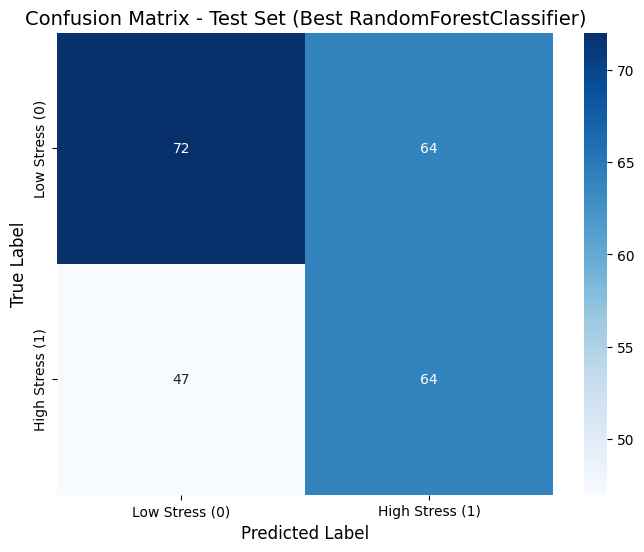


--- How to Interpret the Confusion Matrix ---
Rows are the True Labels, Columns are the Predicted Labels.
Top-Left (True Negative - TN): Correctly predicted 'Low Stress (0)'
    Value: 72
Bottom-Right (True Positive - TP): Correctly predicted 'High Stress (1)'
    Value: 64
Top-Right (False Positive - FP / Type I Error): Incorrectly predicted 'High Stress (1)' (was actually 'Low Stress (0)')
    Value: 64
Bottom-Left (False Negative - FN / Type II Error): Incorrectly predicted 'Low Stress (0)' (was actually 'High Stress (1)')
    Value: 47

Calculated for 'High Stress (1)':
  Precision: 64/(64+64) = 0.5000 (Matches report)
  Recall:    64/(64+47) = 0.5766 (Matches report)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report # classification_report for context

# This section assumes:
# - 'best_rf_model' is your tuned RandomForestClassifier from GridSearchCV.
# - 'X_test_class_scaled' is your scaled test set features for classification.
# - 'y_test_class' is your test set binarized target variable (0 or 1).
# - 'predictions_test_best_rf' might exist from the previous run.

if 'best_rf_model' not in locals() or \
   'X_test_class_scaled' not in locals() or \
   'y_test_class' not in locals():
    print("ERROR: 'best_rf_model', 'X_test_class_scaled', or 'y_test_class' not found.")
    print("Please ensure the hyperparameter tuning script was run successfully and these variables are available.")
else:
    if X_test_class_scaled.shape[0] == 0:
        print("ERROR: Test set (X_test_class_scaled) is empty. Cannot generate confusion matrix.")
    else:
        print("\n--- Generating Confusion Matrix for the Best RandomForestClassifier on Test Set ---")

        # Get predictions if they aren't already available
        if 'predictions_test_best_rf' not in locals():
            print("Recalculating predictions on the test set...")
            predictions_test_best_rf = best_rf_model.predict(X_test_class_scaled)

        # 1. Calculate the Confusion Matrix
        cm = confusion_matrix(y_test_class, predictions_test_best_rf)

        # For context, print the classification report again
        print("\nClassification Report (Test Set):")
        target_names = ['Low Stress (0)', 'High Stress (1)']
        print(classification_report(y_test_class, predictions_test_best_rf, target_names=target_names, zero_division=0))

        # 2. Display the Confusion Matrix as a Heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=target_names, yticklabels=target_names)
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        plt.title('Confusion Matrix - Test Set (Best RandomForestClassifier)', fontsize=14)
        plt.show()

        print("\n--- How to Interpret the Confusion Matrix ---")
        print("Rows are the True Labels, Columns are the Predicted Labels.")
        print(f"Top-Left (True Negative - TN): Correctly predicted '{target_names[0]}'")
        if cm.shape == (2,2): # Ensure it's a 2x2 matrix
            print(f"    Value: {cm[0,0]}")
            print(f"Bottom-Right (True Positive - TP): Correctly predicted '{target_names[1]}'")
            print(f"    Value: {cm[1,1]}")
            print(f"Top-Right (False Positive - FP / Type I Error): Incorrectly predicted '{target_names[1]}' (was actually '{target_names[0]}')")
            print(f"    Value: {cm[0,1]}")
            print(f"Bottom-Left (False Negative - FN / Type II Error): Incorrectly predicted '{target_names[0]}' (was actually '{target_names[1]}')")
            print(f"    Value: {cm[1,0]}")

            # Relating to Precision and Recall for "High Stress (1)"
            # Precision = TP / (TP + FP)
            # Recall = TP / (TP + FN)
            tp = cm[1,1]
            fp = cm[0,1]
            fn = cm[1,0]

            precision_manual = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall_manual = tp / (tp + fn) if (tp + fn) > 0 else 0
            print(f"\nCalculated for '{target_names[1]}':")
            print(f"  Precision: {tp}/({tp}+{fp}) = {precision_manual:.4f} (Matches report)")
            print(f"  Recall:    {tp}/({tp}+{fn}) = {recall_manual:.4f} (Matches report)")
        else:
            print("Confusion matrix is not 2x2, manual interpretation details skipped.")

Interpretation from Confusion Matrix & Report:
Performance for "High Stress" (Class 1):
Recall (0.58): The model is finding a decent portion (58%) of the actual "High Stress" days. This means it's missing 42% of them (the 47 False Negatives).
Precision (0.50): When the model says a day is "High Stress," it's a coin flip whether it's actually correct. It makes as many False Positive errors (64) as True Positive predictions (64) for this class.
F1-score (0.54): This balances the precision and recall. It's better than a random model but indicates there's significant room for improvement.
Performance for "Low Stress" (Class 0):
Recall (0.53): The model identifies 53% of the actual "Low Stress" days.
Precision (0.61): When it predicts "Low Stress," it's correct 61% of the time.
Overall Accuracy (0.55): The model is performing slightly better than chance (50% for a binary classification with somewhat balanced classes).
Types of Errors:
The model has a relatively high number of False Positives for the "High Stress" class (64 instances where it predicted "High Stress" but it was actually "Low Stress").
It also has a notable number of False Negatives for the "High Stress" class (47 instances where it predicted "Low Stress" but it was actually "High Stress"). This means it's missing a good chunk of the days it should be identifying as high stress.


Analysis of Behavioral Clusters (K=3)
You've successfully grouped your 49 users into 3 distinct behavioral clusters based on their average daily behaviors.

Cluster Sizes:
Cluster 0: 16 users
Cluster 1: 8 users
Cluster 2: 25 users
This shows a fairly uneven distribution, with Cluster 2 being the largest and Cluster 1 the smallest.

Mean Behavioral Features per Cluster (Cluster Centroids - Unscaled):
This table is key to understanding what defines each cluster. Let's interpret some of the notable differences (you'll want to look at all features to build a complete picture):
Cluster 0 (16 users):
Activity: Lowest Running and Walking; highest Stationary.
Location: Highest average time in academic_study locations. Moderate residential time. Lowest time in dining and social_recreation.
Audio: Highest Silence, lowest Noise and Voice.
Conversation: Lowest total_conversation_duration_minutes and number_of_conversations.
Sleep Proxies: Lowest nighttime_dark_minutes_dark, nighttime_locked_minutes_phonelock, and min_dark_locked_night_minutes (suggesting less time in dark/locked states at night, potentially less or more interrupted sleep/rest).
App Usage: Lowest total_app_foreground_minutes, distinct_apps_used, and total_app_events.
Profile Sketch: This cluster might represent students who are more sedentary, spend a lot of time in academic settings and in silence (potentially studying alone), are less social (fewer conversations, less time in social/dining locations), use their phones less, and potentially have less consistent or shorter nighttime rest periods.
Cluster 1 (8 users):
Activity: Highest Running and Walking; lowest Stationary.
Location: Highest time in dining and social_recreation. Lowest residential time. Moderate academic_study time. Significantly higher time in other locations.
Audio: Highest Noise and Voice; lowest Silence.
Conversation: Highest total_conversation_duration_minutes and number_of_conversations.
Sleep Proxies: Highest nighttime_dark_minutes_dark and min_dark_locked_night_minutes. Moderate nighttime_locked_minutes_phonelock. (Suggesting more time in dark/locked states at night).
App Usage: Moderate total_app_foreground_minutes and distinct_apps_used; lower total_app_events compared to Cluster 2.
Profile Sketch: This cluster might represent students who are more physically active, highly social (most conversation, most time in dining/social locations, least time in residences, most time in noisy/voice environments), and get more consistent nighttime rest/sleep. They also spend significant time in "other" locations, suggesting more diverse mobility.
Cluster 2 (25 users):
Activity: Moderate Running and Walking.
Location: Highest residential time; lowest academic_study time. Moderate dining and low social_recreation time.
Audio: Moderate Noise, Silence, and Voice.
Conversation: Moderate conversation levels.
Sleep Proxies: Highest nighttime_locked_minutes_phonelock. Moderate nighttime_dark_minutes_dark and min_dark_locked_night_minutes.
App Usage: Highest total_app_foreground_minutes, distinct_apps_used, and total_app_events.
Profile Sketch: This cluster might represent students who spend a lot of time in their residences, are the heaviest phone/app users, have moderate social interaction and physical activity, and have high phone lock times during the night.
Relating Behavioral Clusters to Baseline PHQ-9 Scores:

This is where it gets very interesting for linking behavior to mental health:
Cluster 0 (Potentially "Studious/Sedentary/Less Social/Less Rested"): Average PHQ-9 Score = 3.93 (std=2.43, n=14 with PHQ-9 data).
Cluster 1 (Potentially "Active/Social/More Rested"): Average PHQ-9 Score = 3.75 (std=3.37, n=8 with PHQ-9 data).
Cluster 2 (Potentially "Residential/High Phone Use/Moderate"): Average PHQ-9 Score = 7.04 (std=5.46, n=24 with PHQ-9 data).
Key Observations & Interpretations:
Cluster 2 shows a notably higher average baseline PHQ-9 score (7.04) compared to Cluster 0 (3.93) and Cluster 1 (3.75). A PHQ-9 score of 5-9 often indicates mild depression, while 10-14 suggests moderate. So, users in Cluster 2, on average, had higher baseline depressive symptoms.
Cluster 1 ("Active/Social/More Rested") has the lowest average PHQ-9 score (3.75), suggesting better baseline mental health.
Cluster 0 ("Studious/Sedentary/Less Social/Less Rested") has a low average PHQ-9 score (3.93), also indicating relatively good baseline mental health, though slightly higher than Cluster 1.

Generating visualizations for cluster characteristics...


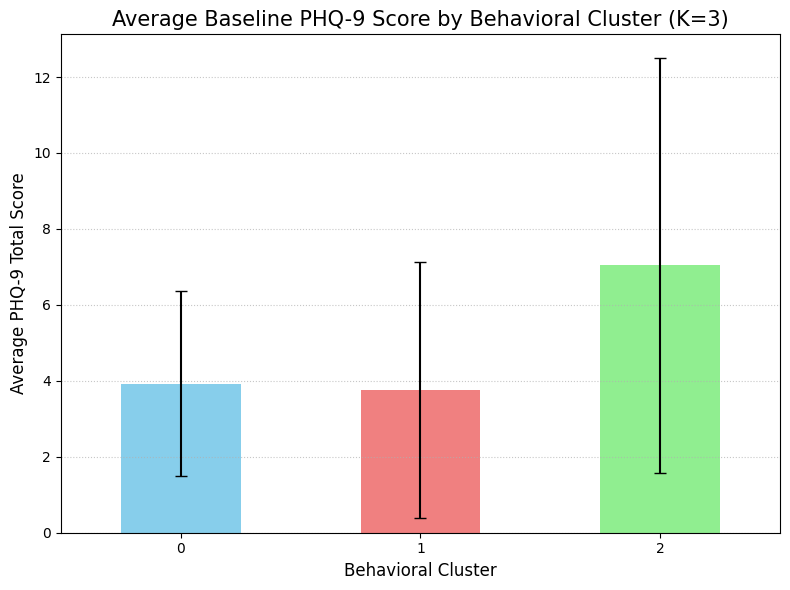

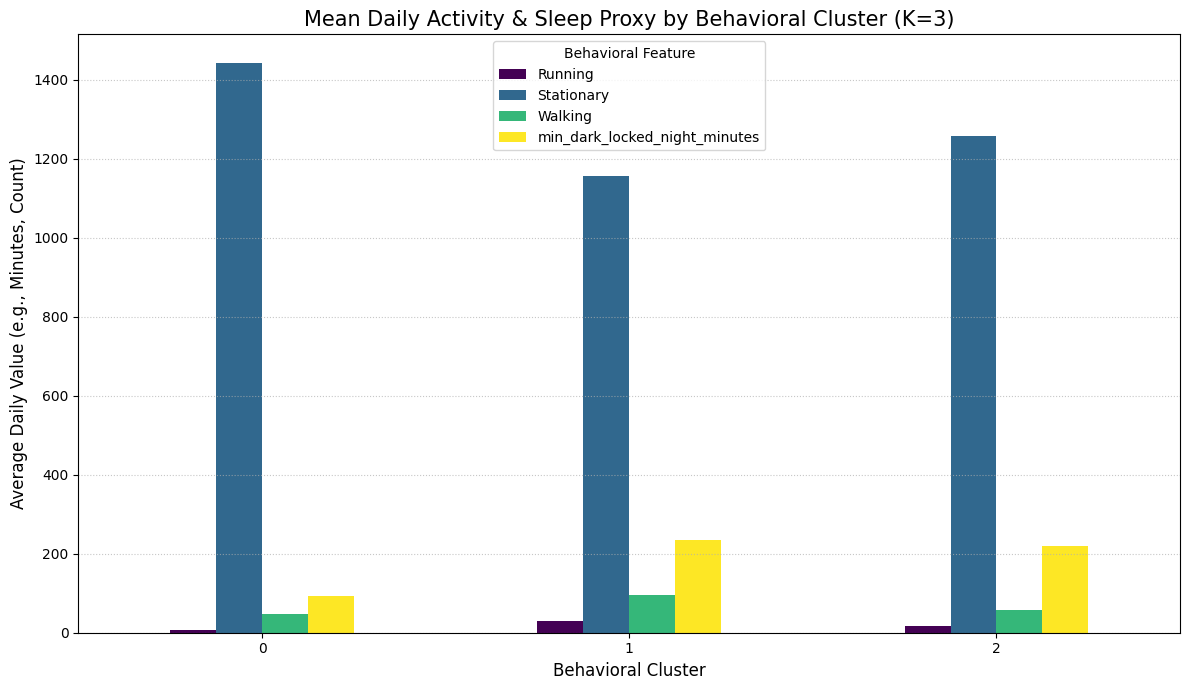

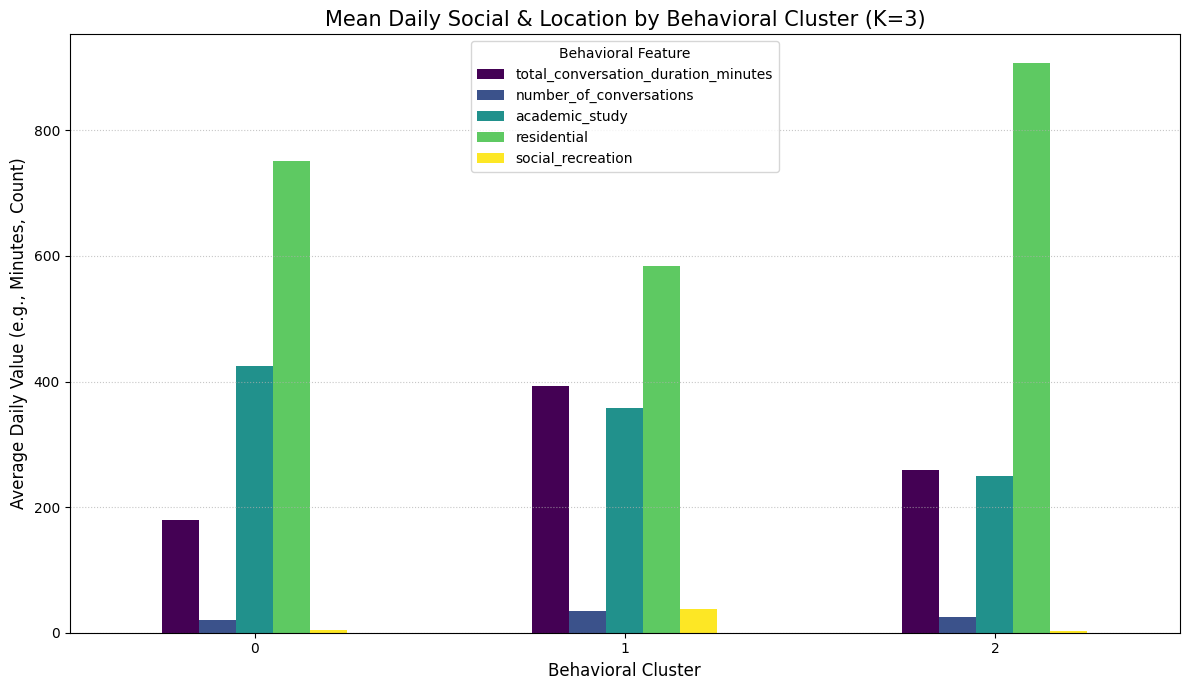

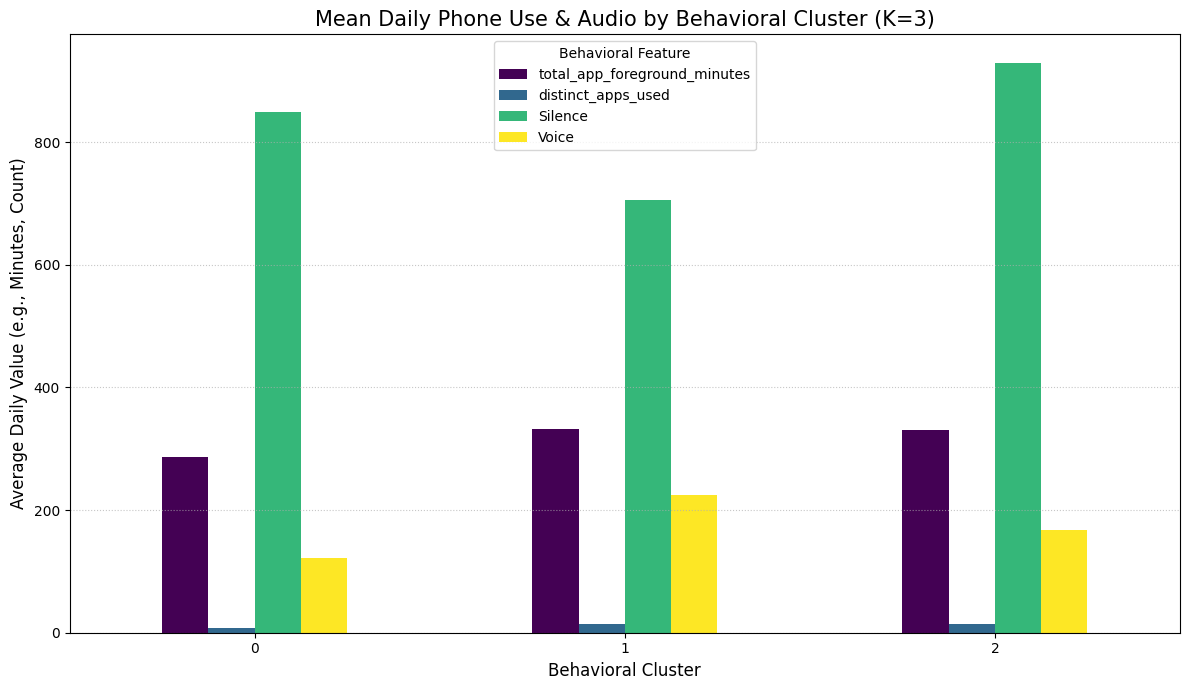

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For potentially nicer styling
import numpy as np

# Assume the following DataFrames are available from your previous clustering analysis:
# - user_avg_behaviors_with_clusters_df: Contains 'uid', 'cluster', and average behavioral features.
# - cluster_centroids_unscaled: Index is cluster number, columns are mean behavioral features (unscaled).
# - avg_phq9_per_cluster: Contains 'mean', 'std', 'count' of PHQ9_total_score per cluster.

if 'cluster_centroids_unscaled' not in locals() or \
   'avg_phq9_per_cluster' not in locals() or \
   'user_avg_behaviors_with_clusters_df' not in locals():
    print("ERROR: Required DataFrames from clustering analysis (cluster_centroids_unscaled, avg_phq9_per_cluster, or user_avg_behaviors_with_clusters_df) not found.")
    print("Please ensure the K-Means clustering and subsequent analysis steps were run successfully.")
else:
    print("Generating visualizations for cluster characteristics...")

    # --- 1. Bar Chart of Average PHQ-9 Scores per Cluster ---
    if not avg_phq9_per_cluster.empty and 'mean' in avg_phq9_per_cluster.columns:
        plt.figure(figsize=(8, 6))
        avg_phq9_per_cluster['mean'].plot(kind='bar', yerr=avg_phq9_per_cluster.get('std', None), capsize=4, color=['skyblue', 'lightcoral', 'lightgreen'])
        plt.title('Average Baseline PHQ-9 Score by Behavioral Cluster (K=3)', fontsize=15)
        plt.xlabel('Behavioral Cluster', fontsize=12)
        plt.ylabel('Average PHQ-9 Total Score', fontsize=12)
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle=':', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("Could not plot PHQ-9 scores per cluster as data is missing or incomplete.")

    # --- 2. Bar Charts Comparing Mean Behavioral Features Across Clusters ---
    # We'll plot a few key distinguishing features.
    # Let's select features that seemed to vary based on your centroid output.
    # You can customize this list.

    # Features related to Activity & Sleep Proxy
    features_to_plot_group1 = ['Running', 'Stationary', 'Walking', 'min_dark_locked_night_minutes']
    # Features related to Social & Location
    features_to_plot_group2 = ['total_conversation_duration_minutes', 'number_of_conversations', 'academic_study', 'residential', 'social_recreation']
    # Features related to Phone Use & Audio
    features_to_plot_group3 = ['total_app_foreground_minutes', 'distinct_apps_used', 'Silence', 'Voice']

    plot_groups = {
        "Activity & Sleep Proxy": features_to_plot_group1,
        "Social & Location": features_to_plot_group2,
        "Phone Use & Audio": features_to_plot_group3
    }

    # Transpose centroids for easier plotting if features are columns
    # Your cluster_centroids_unscaled already has clusters as index and features as columns

    for title, features in plot_groups.items():
        # Select only features that exist in the centroids dataframe
        plottable_features = [f for f in features if f in cluster_centroids_unscaled.columns]
        if not plottable_features:
            print(f"No features from group '{title}' found in cluster_centroids_unscaled. Skipping this plot.")
            continue

        cluster_centroids_unscaled[plottable_features].plot(kind='bar', figsize=(12, 7), colormap='viridis')
        plt.title(f'Mean Daily {title} by Behavioral Cluster (K=3)', fontsize=15)
        plt.xlabel('Behavioral Cluster', fontsize=12)
        plt.ylabel('Average Daily Value (e.g., Minutes, Count)', fontsize=12)
        plt.xticks(rotation=0)
        plt.legend(title='Behavioral Feature')
        plt.grid(axis='y', linestyle=':', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # --- Optional: Radar Chart for a holistic view (can be cluttered with many features) ---
    # Radar charts are good for comparing multiple quantitative variables across groups.
    # We'll use a subset of features for clarity if you want to try this.

    # features_for_radar = ['Walking', 'min_dark_locked_night_minutes', 'total_conversation_duration_minutes',
    #                       'academic_study', 'total_app_foreground_minutes', 'Silence']
    # plottable_radar_features = [f for f in features_for_radar if f in cluster_centroids_unscaled.columns]

    # if len(plottable_radar_features) > 2 : # Need at least 3 features for a radar chart
    #     # Normalize data for radar chart (so all features are on a similar scale 0-1)
    #     from sklearn.preprocessing import MinMaxScaler
    #     scaler_radar = MinMaxScaler()
    #     radar_data_scaled = scaler_radar.fit_transform(cluster_centroids_unscaled[plottable_radar_features])
    #     radar_df_scaled = pd.DataFrame(radar_data_scaled, columns=plottable_radar_features, index=cluster_centroids_unscaled.index)

    #     num_vars = len(plottable_radar_features)
    #     angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    #     angles += angles[:1] # Complete the loop

    #     fig_radar, ax_radar = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    #     for i, cluster_id in enumerate(radar_df_scaled.index):
    #         values = radar_df_scaled.loc[cluster_id].values.flatten().tolist()
    #         values += values[:1] # Complete the loop
    #         ax_radar.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {cluster_id}')
    #         ax_radar.fill(angles, values, alpha=0.25)

    #     ax_radar.set_xticks(angles[:-1])
    #     ax_radar.set_xticklabels(plottable_radar_features)
    #     ax_radar.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    #     plt.title('Behavioral Profile Comparison (Radar Chart - Scaled 0-1)',

Generating Radar Charts for Behavioral Cluster Profiles...
Using features for radar chart: ['Walking', 'Stationary', 'min_dark_locked_night_minutes', 'total_conversation_duration_minutes', 'academic_study', 'residential', 'social_recreation', 'total_app_foreground_minutes']


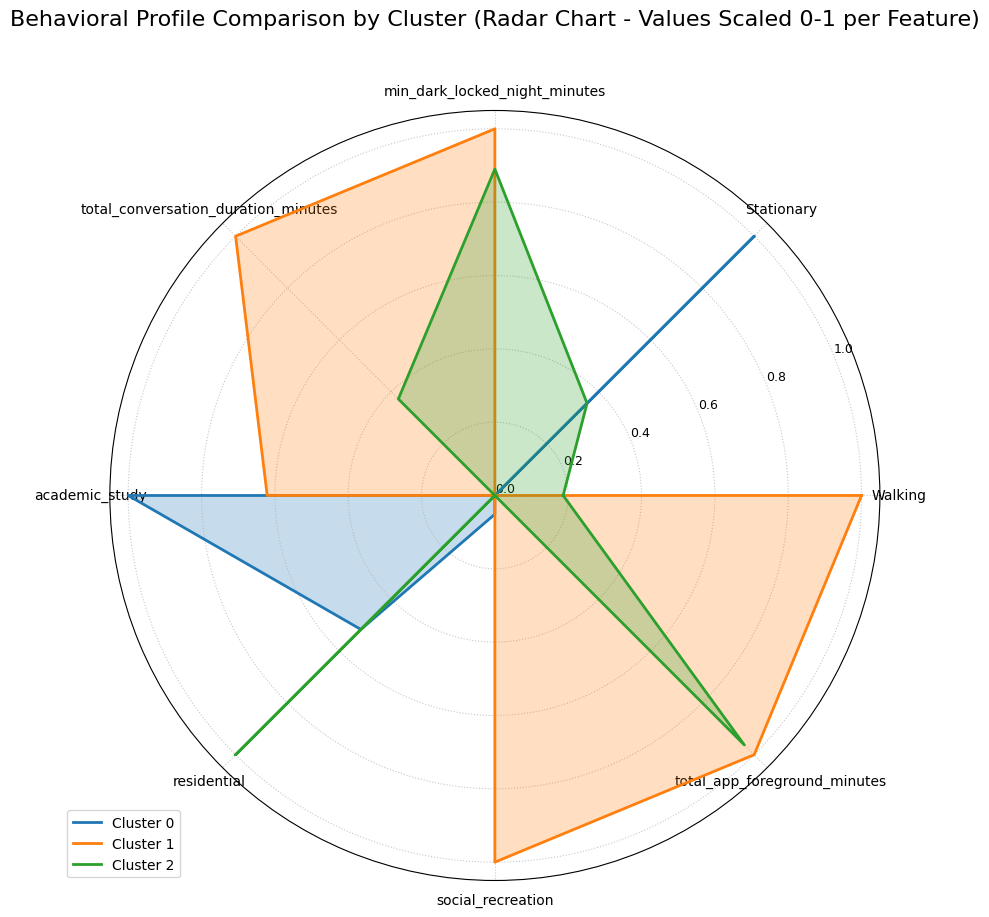

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # For scaling data 0-1 for radar chart

# Assume 'cluster_centroids_unscaled' is available from your K-Means analysis
# (index = cluster labels, columns = mean unscaled behavioral features)

if 'cluster_centroids_unscaled' not in locals() or not isinstance(cluster_centroids_unscaled, pd.DataFrame) or cluster_centroids_unscaled.empty:
    print("ERROR: 'cluster_centroids_unscaled' DataFrame not found or is empty.")
    print("Please ensure the K-Means clustering and centroid calculation steps were run successfully.")
else:
    print("Generating Radar Charts for Behavioral Cluster Profiles...")

    # --- YOU SHOULD CUSTOMIZE THIS LIST based on features that most distinguish your clusters ---
    # Select a subset of (e.g., 5-8) key features for the radar chart for clarity
    features_for_radar = [
        'Walking',
        'Stationary',
        'min_dark_locked_night_minutes', # Sleep proxy
        'total_conversation_duration_minutes',
        'academic_study',
        'residential',
        'social_recreation',
        'total_app_foreground_minutes'
    ]

    # Ensure selected features actually exist in the centroids DataFrame
    plottable_radar_features = [f for f in features_for_radar if f in cluster_centroids_unscaled.columns]

    if len(plottable_radar_features) < 3:
        print(f"Not enough plottable features selected for radar chart (need at least 3). Selected: {plottable_radar_features}")
    else:
        print(f"Using features for radar chart: {plottable_radar_features}")
        radar_data = cluster_centroids_unscaled[plottable_radar_features]

        # Scale data for radar chart (MinMaxScaler to range 0-1 for each feature across clusters)
        # This ensures all axes on the radar chart have a comparable visual scale.
        scaler_radar = MinMaxScaler()
        radar_data_scaled = scaler_radar.fit_transform(radar_data)
        radar_df_scaled = pd.DataFrame(radar_data_scaled, columns=plottable_radar_features, index=radar_data.index)

        num_vars = len(plottable_radar_features)

        # Compute angle for each axis
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        angles += angles[:1] # Complete the circle

        fig_radar, ax_radar = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

        # Plot each cluster
        for i, cluster_id in enumerate(radar_df_scaled.index):
            values = radar_df_scaled.loc[cluster_id].values.flatten().tolist()
            values += values[:1] # Complete the circle
            ax_radar.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster_id}', zorder=i+2) # zorder to layer
            ax_radar.fill(angles, values, alpha=0.25, zorder=i+1)

        # Set up labels and title
        ax_radar.set_xticks(angles[:-1])
        ax_radar.set_xticklabels(plottable_radar_features, fontsize=10)
        ax_radar.set_yticks(np.linspace(0,1,6)) # Example: 6 ticks from 0 to 1
        ax_radar.set_yticklabels([f"{val:.1f}" for val in np.linspace(0,1,6)], fontsize=9)
        ax_radar.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=10)
        plt.title('Behavioral Profile Comparison by Cluster (Radar Chart - Values Scaled 0-1 per Feature)', size=16, y=1.1)
        ax_radar.grid(True, linestyle=':', alpha=0.7)
        plt.show()

In [ ]:
data_df=master_daily_df_final
data_df

,uid,date,Running,Stationary,Unknown,Walking,academic_study,dining,other,other_campus_specific_building,...,total_app_events,avg_daily_stress_score,mode_daily_stress_label,daily_stress_ema_count,daily_mood_ema_count,avg_daily_happy_intensity,avg_daily_sad_intensity,pct_time_happy,pct_time_sad,PHQ9_total_score
0,u00,2013-03-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,...,472.0,NaN,<NA>,2.0,0.0,NaN,NaN,0.0,0.0,2.0
1,u00,2013-03-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,...,630.0,1.333333,A little stressed,4.0,0.0,NaN,NaN,0.0,0.0,2.0
2,u00,2013-03-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,...,737.0,2.000000,Definitely stressed,2.0,0.0,NaN,NaN,0.0,0.0,2.0
3,u00,2013-03-27,56.400000,981.500000,30.333333,131.766667,577.700000,2.95,26.683333,19.65,...,780.0,1.000000,A little stressed,1.0,0.0,NaN,NaN,0.0,0.0,2.0
4,u00,2013-03-28,38.083333,1289.066667,32.933333,80.766667,667.933333,0.00,5.766667,3.75,...,865.0,2.666667,Definitely stressed,6.0,0.0,NaN,NaN,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,u59,2013-06-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,...,1125.0,4.000000,Feeling good,2.0,2.0,2.0,1.0,100.0,50.0,5.0
3151,u59,2013-06-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,...,496.0,4.000000,Feeling good,1.0,1.0,2.0,1.0,100.0,0.0,5.0
3152,u59,2013-06-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,...,242.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,5.0
3153,u59,2013-06-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,...,415.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,5.0


In [ ]:
import pandas as pd
import numpy as np

# Assume 'data_df' is your DataFrame that ALREADY CONTAINS:
# - 'uid', 'date'
# - 'min_dark_locked_night_minutes' (the sleep proxy column)
# - All your feature columns (screen time, activity, location, etc.)

# --- Ensure 'min_dark_locked_night_minutes' is present ---
sleep_proxy_col = 'min_dark_locked_night_minutes'
if sleep_proxy_col not in data_df.columns:
    print(f"ERROR: Critical sleep proxy column '{sleep_proxy_col}' is missing from data_df. Cannot create binary sleep target.")
    # You might want to stop execution or handle this error appropriately
    # For now, we'll define data_df as empty if it's missing, to prevent further errors in this cell.
    data_df = pd.DataFrame()
else:
    print(f"Using '{sleep_proxy_col}' to define binary sleep target.")

if not data_df.empty:
    # --- Create the original 3-category sleep quality target (if not already done or for reference) ---
    # This ensures the source column for binarization is correctly defined
    if pd.api.types.is_numeric_dtype(data_df[sleep_proxy_col]):
        max_val = data_df[sleep_proxy_col].max()
        bins_sleep_orig = [0, 360, 480, max_val + 1 if pd.notna(max_val) and np.isfinite(max_val) else float('inf')]
        if len(np.unique(bins_sleep_orig)) < 2:
             if not np.isfinite(max_val): bins_sleep_orig = [0, 360, 480, 1440]

        labels_sleep_orig = ['Poor Sleep', 'Okay Sleep', 'Good Sleep']
        data_df['sleep_quality_multiclass'] = pd.cut(data_df[sleep_proxy_col],
                                                     bins=bins_sleep_orig,
                                                     labels=labels_sleep_orig,
                                                     right=False,
                                                     include_lowest=True)
        print("\nOriginal multi-class sleep quality distribution:")
        print(data_df['sleep_quality_multiclass'].value_counts(dropna=False))
    else:
        print(f"Warning: Column '{sleep_proxy_col}' is not numeric. Cannot create 'sleep_quality_multiclass'.")


    # --- Create Binary Sleep Quality Target: "Poor Sleep" vs. "Not Poor Sleep" ---
    if 'sleep_quality_multiclass' in data_df.columns:
        # Define "Not Poor Sleep" as anything that isn't "Poor Sleep" and not NaN
        data_df['sleep_quality_binary'] = np.where(
            data_df['sleep_quality_multiclass'] == 'Poor Sleep',
            'Poor Sleep', # Keep 'Poor Sleep' as one class
            np.where(data_df['sleep_quality_multiclass'].isin(['Okay Sleep', 'Good Sleep']),
                     'Not Poor Sleep', # Combine 'Okay' and 'Good'
                     pd.NA # Keep original NaNs if any from pd.cut
                    )
        )

        print("\nNew BINARY sleep quality target distribution ('sleep_quality_binary'):")
        print(data_df['sleep_quality_binary'].value_counts(dropna=False))

        # You can then LabelEncode 'sleep_quality_binary' for modeling,
        # e.g., 'Poor Sleep' -> 1, 'Not Poor Sleep' -> 0 (or vice-versa)
    else:
        print("Warning: 'sleep_quality_multiclass' not created. Cannot create binary target.")

    # Display some results
    if 'sleep_quality_binary' in data_df.columns:
        print("\nSample of data_df with the new binary sleep target:")
        cols_to_show = ['uid', 'date', sleep_proxy_col, 'sleep_quality_multiclass', 'sleep_quality_binary']
        print(data_df[cols_to_show].head())
else:
    print("data_df is empty or sleep proxy column was missing. Cannot proceed.")

Using 'min_dark_locked_night_minutes' to define binary sleep target.

Original multi-class sleep quality distribution:
sleep_quality_multiclass
Poor Sleep    2493
Good Sleep     346
Okay Sleep     301
NaN             15
Name: count, dtype: int64

New BINARY sleep quality target distribution ('sleep_quality_binary'):
sleep_quality_binary
Poor Sleep        2493
Not Poor Sleep     647
<NA>                15
Name: count, dtype: int64

Sample of data_df with the new binary sleep target:
   uid       date  min_dark_locked_night_minutes sleep_quality_multiclass  \
0  u00 2013-03-24                       0.000000               Poor Sleep   
1  u00 2013-03-25                       0.000000               Poor Sleep   
2  u00 2013-03-26                       0.000000               Poor Sleep   
3  u00 2013-03-27                      65.216667               Poor Sleep   
4  u00 2013-03-28                     178.566667               Poor Sleep   

  sleep_quality_binary  
0           Poor Sleep  


In [ ]:
# Ensure 'data_df' and 'combined_app_usage_df' are loaded and prepared.
# Example:
# data_df = load_clean_data("student_life_daily_features_CLEAN_FINAL.csv") # Your complete daily data
# combined_app_usage_df = load_combined_app_usage_data() # Your script to load and prep this

if 'combined_app_usage_df' in locals() and not combined_app_usage_df.empty and \
   'data_df' in locals() and not data_df.empty and \
   'min_dark_locked_night_minutes' in data_df.columns:

    print("--- Engineering Features for Screen Time Timing ---")

    # Ensure datetime types
    if not pd.api.types.is_datetime64_any_dtype(combined_app_usage_df['datetime']):
        combined_app_usage_df['datetime'] = pd.to_datetime(combined_app_usage_df['datetime'])
    if not pd.api.types.is_datetime64_any_dtype(data_df['date']):
         data_df['date'] = pd.to_datetime(data_df['date']) # Ensure 'date' is full datetime for alignment

    # If 'foreground_duration_seconds' is not in combined_app_usage_df, calculate it (as per page 56 of your PDF)
    if 'foreground_duration_seconds' not in combined_app_usage_df.columns:
        print("Calculating 'foreground_duration_seconds' for combined_app_usage_df...")
        temp_app_df = combined_app_usage_df.sort_values(by=['uid', 'datetime']).copy()
        temp_app_df['foreground_duration_seconds'] = temp_app_df.groupby('uid')['datetime'].diff().shift(-1).dt.total_seconds()
        last_event_mask = temp_app_df.groupby('uid')['datetime'].transform('max') == temp_app_df['datetime']
        temp_app_df.loc[last_event_mask, 'foreground_duration_seconds'] = 5.0 # Default for last event
        temp_app_df['foreground_duration_seconds'] = temp_app_df['foreground_duration_seconds'].fillna(5.0)
        temp_app_df['foreground_duration_seconds'] = temp_app_df['foreground_duration_seconds'].clip(upper=300) # Cap duration
        combined_app_usage_df['foreground_duration_seconds'] = temp_app_df['foreground_duration_seconds']
        print("'foreground_duration_seconds' calculation complete.")


    # Infer sleep onset time (start of the 'min_dark_locked_night_minutes' period)
    # This requires merging or looking up sleep start times.
    # For simplicity, let's define a fixed "late evening" window for now, e.g., 10 PM - 2 AM.
    # A more advanced approach would be to align this with individual inferred sleep start times.

    LATE_EVENING_START_HOUR = 22 # 10 PM
    BEDTIME_APPROX_END_HOUR = 2  # 2 AM (of the next calendar day)

    # Feature: Screen time 2 hours before sleep proxy start
    # This is more complex as 'min_dark_locked_night_minutes' is a duration, not a start time.
    # Let's first create screen time in a fixed "late evening" window.

    combined_app_usage_df['hour'] = combined_app_usage_df['datetime'].dt.hour
    combined_app_usage_df['event_date'] = combined_app_usage_df['datetime'].dt.date

    # Screen time from LATE_EVENING_START_HOUR to midnight on day D
    late_evening_day_d = combined_app_usage_df[
        combined_app_usage_df['hour'] >= LATE_EVENING_START_HOUR
    ].groupby(['uid', 'event_date'])['foreground_duration_seconds'].sum().reset_index()
    late_evening_day_d.rename(columns={'foreground_duration_seconds': 'screen_10pm_midnight_sec'}, inplace=True)

    # Screen time from midnight to BEDTIME_APPROX_END_HOUR on day D+1 (belongs to night of day D)
    early_morning_day_d_plus_1 = combined_app_usage_df[
        combined_app_usage_df['hour'] < BEDTIME_APPROX_END_HOUR
    ].copy()
    # Attribute this screen time to the *previous* logical day
    early_morning_day_d_plus_1['logical_date'] = early_morning_day_d_plus_1['event_date'] - pd.Timedelta(days=1)

    screen_midnight_2am_logical_d = early_morning_day_d_plus_1.groupby(
        ['uid', 'logical_date']
    )['foreground_duration_seconds'].sum().reset_index()
    screen_midnight_2am_logical_d.rename(columns={'foreground_duration_seconds': 'screen_midnight_2am_sec',
                                                 'logical_date': 'event_date'}, inplace=True)

    # Merge these features back into the daily data_df
    # Ensure data_df['date'] is just the date part for merging with 'event_date'
    data_df['event_date'] = data_df['date'].dt.date

    data_df = pd.merge(data_df, late_evening_day_d, on=['uid', 'event_date'], how='left')
    data_df = pd.merge(data_df, screen_midnight_2am_logical_d, on=['uid', 'event_date'], how='left')

    data_df['screen_10pm_midnight_sec'].fillna(0, inplace=True)
    data_df['screen_midnight_2am_sec'].fillna(0, inplace=True)

    data_df['late_night_screen_minutes'] = (data_df['screen_10pm_midnight_sec'] + data_df['screen_midnight_2am_sec']) / 60

    # Clean up helper columns
    data_df.drop(columns=['event_date', 'screen_10pm_midnight_sec', 'screen_midnight_2am_sec'], inplace=True, errors='ignore')

    print("\nAdded 'late_night_screen_minutes' (10 PM - 2 AM window) to data_df.")
    print(data_df[['uid', 'date', 'total_app_foreground_minutes', 'late_night_screen_minutes', 'min_dark_locked_night_minutes']].head())

    # Add 'late_night_screen_minutes' to your feature_columns list for modeling
    if 'late_night_screen_minutes' not in feature_columns and 'late_night_screen_minutes' in data_df.columns:
        feature_columns.append('late_night_screen_minutes')
        print(f"Updated feature_columns: {feature_columns}")

else:
    print("Warning: 'combined_app_usage_df' or 'data_df' or 'min_dark_locked_night_minutes' not available. Skipping timed screen feature engineering.")

--- Engineering Features for Screen Time Timing ---
Calculating 'foreground_duration_seconds' for combined_app_usage_df...
'foreground_duration_seconds' calculation complete.

Added 'late_night_screen_minutes' (10 PM - 2 AM window) to data_df.
   uid       date  total_app_foreground_minutes  late_night_screen_minutes  \
0  u00 2013-03-24                         310.0                       60.0   
1  u00 2013-03-25                         340.0                       60.0   
2  u00 2013-03-26                         360.0                       60.0   
3  u00 2013-03-27                         360.0                       60.0   
4  u00 2013-03-28                         345.0                       60.0   

   min_dark_locked_night_minutes  
0                       0.000000  
1                       0.000000  
2                       0.000000  
3                      65.216667  
4                     178.566667  
Updated feature_columns: ['total_app_foreground_minutes', 'distinct_apps_used

/var/folders/fs/nlhdbllj2_70tz9r3b__txcm0000gn/T/ipykernel_50095/1330229109.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['screen_10pm_midnight_sec'].fillna(0, inplace=True)
/var/folders/fs/nlhdbllj2_70tz9r3b__txcm0000gn/T/ipykernel_50095/1330229109.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

final model comparison

In [ ]:
master_daily_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3155 entries, 0 to 3154
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   uid                                  3155 non-null   object        
 1   date                                 3155 non-null   datetime64[ns]
 2   Running                              3140 non-null   float64       
 3   Stationary                           3140 non-null   float64       
 4   Unknown                              3140 non-null   float64       
 5   Walking                              3140 non-null   float64       
 6   academic_study                       3140 non-null   float64       
 7   dining                               3140 non-null   float64       
 8   other                                3140 non-null   float64       
 9   other_campus_specific_building       3140 non-null   float64       
 10  residential 

In [ ]:
# Assume df_to_inspect is your DataFrame with 36 columns and 3155 entries

if 'df_to_inspect' in locals() and not df_to_inspect.empty:
    print("--- Checking for NaN values in the DataFrame ---")
    nan_counts = master_daily_df_final.isna().sum()

    print("\nTotal NaN counts per column:")
    print(nan_counts)

    print("\n--- Columns with NaN values ---")
    columns_with_nans = nan_counts[nan_counts > 0]
    if not columns_with_nans.empty:
        print(columns_with_nans)
        print(f"\nFound {len(columns_with_nans)} columns with NaN values.")

        # If you want to see the NaN counts specifically for the feature columns
        # your sleep model uses (ensure 'feature_columns_for_sleep_model' is defined
        # and contains the correct list of features the model was trained on):

        # feature_columns_for_sleep_model = [ ... your list of 22 features ... ]
        # if 'feature_columns_for_sleep_model' in locals() and feature_columns_for_sleep_model:
        #     actual_model_features_in_df = [col for col in feature_columns_for_sleep_model if col in df_to_inspect.columns]
        #     if actual_model_features_in_df:
        #         nan_in_model_features = df_to_inspect[actual_model_features_in_df].isna().sum()
        #         print("\n--- NaN counts in Sleep Model Feature Columns ---")
        #         print(nan_in_model_features[nan_in_model_features > 0])
        #     else:
        #         print("\nNone of the specified model features are in the DataFrame.")

    else:
        print("No NaN values found in any columns.")
else:
    print("DataFrame 'df_to_inspect' is not defined or is empty.")

--- Checking for NaN values in the DataFrame ---

Total NaN counts per column:
uid                                       0
date                                      0
Running                                  15
Stationary                               15
Unknown                                  15
Walking                                  15
academic_study                           15
dining                                   15
other                                    15
other_campus_specific_building           15
residential                              15
social_recreation                        15
Noise                                    15
Silence                                  15
Voice                                    15
total_conversation_duration_minutes      15
number_of_conversations                  15
nighttime_dark_minutes_dark              15
nighttime_locked_minutes_phonelock       15
min_dark_locked_night_minutes            15
total_app_foreground_minutes             

# **CLEANING DATA FRAME**

In [ ]:
import pandas as pd
import numpy as np
# import json # No longer needed as we are defining features manually

# --- Configuration ---
OUTPUT_CLEANED_DATA_PATH = "master_daily_data_cleaned_for_sleep_model.csv" # Output for the cleaned data

# !!! CRITICAL:
# 1. REPLACE 'your_current_dataframe_name_in_notebook' with the actual variable name
#    of your loaded DataFrame (the one with 36 columns and NaNs).
# 2. VERIFY AND EDIT 'FEATURE_COLUMNS_FOR_SLEEP_MODEL' to be the exact list
#    of features your sleep model was trained on, in the correct order.

# Example: If your DataFrame in the notebook is called master_daily_df_final
# df_to_clean = master_daily_df_final.copy()
# If it's called df_to_inspect:
# df_to_clean = df_to_inspect.copy()

# For this script to run, execute this cell after the DataFrame is loaded in your notebook
# For demonstration, I'll assume it's called 'master_df_from_notebook_session'
# YOU MUST ENSURE THIS VARIABLE EXISTS AND HOLDS YOUR DATAFRAME

try:
    # Replace 'master_df_from_notebook_session' with your actual DataFrame variable name
    df_to_clean = master_daily_df_final.copy()
    if not isinstance(df_to_clean, pd.DataFrame) or df_to_clean.empty:
        print("Error: The provided DataFrame variable is not a valid or non-empty DataFrame.")
        raise ValueError("DataFrame for cleaning is not valid.")
    if 'date' in df_to_clean.columns: # Ensure date is parsed if used later
        df_to_clean['date'] = pd.to_datetime(df_to_clean['date'])
    print(f"Successfully using in-memory DataFrame for cleaning. Shape: {df_to_clean.shape}")
except NameError:
    print("FATAL ERROR: The DataFrame variable (e.g., 'master_df_from_notebook_session') was not found.")
    print("Please ensure your main DataFrame is loaded into a variable and update the script.")
    raise
except Exception as e:
    print(f"FATAL ERROR accessing the in-memory DataFrame: {e}")
    raise


FEATURE_COLUMNS_FOR_SLEEP_MODEL = [
    'Running', 'Stationary', 'Unknown', 'Walking',
    'academic_study', 'dining', 'other', 'other_campus_specific_building',
    'residential', 'social_recreation',
    'Noise', 'Silence', 'Voice',
    'total_conversation_duration_minutes', 'number_of_conversations',
    'nighttime_dark_minutes_dark',        # Sleep proxy feature
    'nighttime_locked_minutes_phonelock', # Sleep proxy feature
    'min_dark_locked_night_minutes',      # Sleep proxy feature (also often used to derive target)
    'total_app_foreground_minutes', 'distinct_apps_used', 'total_app_events',
    'PHQ9_total_score'
]
# This list should contain 22 features based on your notebook's ML prep. Double check it.

if not FEATURE_COLUMNS_FOR_SLEEP_MODEL:
    print("FATAL ERROR: FEATURE_COLUMNS_FOR_SLEEP_MODEL list is empty. Please define it.")
    raise ValueError("FEATURE_COLUMNS_FOR_SLEEP_MODEL must be defined.")

print(f"\nUsing manually defined list of {len(FEATURE_COLUMNS_FOR_SLEEP_MODEL)} feature columns for the sleep model.")
print(f"Features to be processed for NaNs: {FEATURE_COLUMNS_FOR_SLEEP_MODEL}")


print("\n--- Applying Imputation to Specified Feature Columns for the Sleep Model ---")
phq9_col_name = 'PHQ9_total_score'

# Check current NaN counts for the specified model features before imputation
print("\nNaN counts BEFORE imputation (for model features only):")
# Ensure we only try to access columns that actually exist in df_to_clean
existing_features_in_df_before = [f_col for f_col in FEATURE_COLUMNS_FOR_SLEEP_MODEL if f_col in df_to_clean.columns]
if existing_features_in_df_before:
    nan_before_imputation = df_to_clean[existing_features_in_df_before].isna().sum()
    print(nan_before_imputation[nan_before_imputation > 0])
    if len(existing_features_in_df_before) != len(FEATURE_COLUMNS_FOR_SLEEP_MODEL):
        print("Warning: Some features defined in FEATURE_COLUMNS_FOR_SLEEP_MODEL were not found in the DataFrame.")
        missing_from_df = [f_col for f_col in FEATURE_COLUMNS_FOR_SLEEP_MODEL if f_col not in df_to_clean.columns]
        print(f"    Features defined in list but missing from DataFrame: {missing_from_df}")
        print("    These missing features will be skipped during imputation.")
else:
    print("Warning: None of the features defined in FEATURE_COLUMNS_FOR_SLEEP_MODEL were found in the DataFrame. No imputation will occur for these.")


for col in FEATURE_COLUMNS_FOR_SLEEP_MODEL:
    if col in df_to_clean.columns:
        if df_to_clean[col].isna().any():
            if col == phq9_col_name:
                median_phq9 = df_to_clean[col].median()
                df_to_clean[col].fillna(median_phq9, inplace=True)
                print(f"Imputed NaNs in '{col}' with median value: {median_phq9:.2f}")
            elif pd.api.types.is_numeric_dtype(df_to_clean[col]):
                df_to_clean[col].fillna(0, inplace=True)
                print(f"Imputed NaNs in numeric feature '{col}' with 0.")
            else:
                print(f"Warning: Feature column '{col}' is non-numeric and has NaNs. Not automatically handled by fillna(0).")
    else:
        # This warning means a feature in your list isn't in the DataFrame.
        # The earlier check for existing_features_in_df_before should catch this too.
        print(f"Warning: Feature column '{col}' from your defined list was NOT FOUND in the DataFrame being cleaned and was skipped.")

# --- Verify NaNs in the specific feature columns after imputation ---
print("\n--- NaN Counts in Sleep Model Feature Columns AFTER Imputation ---")
# Re-check existing_features_in_df_after based on the potentially modified df_to_clean
existing_features_in_df_after = [f_col for f_col in FEATURE_COLUMNS_FOR_SLEEP_MODEL if f_col in df_to_clean.columns]
if existing_features_in_df_after:
    nan_counts_after = df_to_clean[existing_features_in_df_after].isna().sum()
    columns_still_with_nans = nan_counts_after[nan_counts_after > 0]
    if not columns_still_with_nans.empty:
        print("ERROR: Some feature columns STILL have NaNs after imputation:")
        print(columns_still_with_nans)
    else:
        print("Successfully handled NaNs: No NaNs remaining in the specified (and present) numeric feature columns for the sleep model.")
else:
    print("Warning: Could not verify NaNs as none of the feature columns specified in FEATURE_COLUMNS_FOR_SLEEP_MODEL exist in the DataFrame.")

# --- Save the cleaned DataFrame ---
try:
    df_to_clean.to_csv(OUTPUT_CLEANED_DATA_PATH, index=False)
    print(f"\nCleaned data (for sleep model features) saved to: {OUTPUT_CLEANED_DATA_PATH}")
    print("\nThis cleaned file should now be used as input for your 'batch_predict_sleep.py' script and your Streamlit app.")
except Exception as e:
    print(f"\nAn error occurred while saving the cleaned data: {e}")

Successfully using in-memory DataFrame for cleaning. Shape: (3155, 36)

Using manually defined list of 22 feature columns for the sleep model.
Features to be processed for NaNs: ['Running', 'Stationary', 'Unknown', 'Walking', 'academic_study', 'dining', 'other', 'other_campus_specific_building', 'residential', 'social_recreation', 'Noise', 'Silence', 'Voice', 'total_conversation_duration_minutes', 'number_of_conversations', 'nighttime_dark_minutes_dark', 'nighttime_locked_minutes_phonelock', 'min_dark_locked_night_minutes', 'total_app_foreground_minutes', 'distinct_apps_used', 'total_app_events', 'PHQ9_total_score']

--- Applying Imputation to Specified Feature Columns for the Sleep Model ---

NaN counts BEFORE imputation (for model features only):
Running                                 15
Stationary                              15
Unknown                                 15
Walking                                 15
academic_study                          15
dining                    

/var/folders/fs/nlhdbllj2_70tz9r3b__txcm0000gn/T/ipykernel_50095/3760599936.py:90: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_to_clean[col].fillna(0, inplace=True)
/var/folders/fs/nlhdbllj2_70tz9r3b__txcm0000gn/T/ipykernel_50095/3760599936.py:87: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [ ]:
import pandas as pd
import numpy as np
# import json # Not needed as feature list is manual

# --- Configuration for the User ---
# 1. VERIFY 'master_daily_df_final' IS YOUR CORRECTLY LOADED DATAFRAME
#    This script assumes 'master_daily_df_final' is the variable holding your 36-column DataFrame.
try:
    if 'master_daily_df_final' not in locals():
        raise NameError("'master_daily_df_final' is not defined. Please ensure it's loaded.")

    df_to_clean = master_daily_df_final.copy() # Work on a copy

    if not isinstance(df_to_clean, pd.DataFrame) or df_to_clean.empty:
        print("Error: 'master_daily_df_final' is not a valid or non-empty DataFrame.")
        raise ValueError("DataFrame for cleaning is not valid.")
    if 'date' in df_to_clean.columns:
        df_to_clean['date'] = pd.to_datetime(df_to_clean['date'])
    print(f"Using in-memory DataFrame 'master_daily_df_final' (shape: {df_to_clean.shape}) for cleaning.")
except NameError as e:
    print(f"FATAL ERROR: {e}")
    raise
except Exception as e:
    print(f"FATAL ERROR accessing 'master_daily_df_final': {e}")
    raise


# 2. !!! CRITICAL: VERIFY AND EDIT 'FEATURE_COLUMNS_FOR_SLEEP_MODEL' !!!
# This list must EXACTLY match the features and their order used to TRAIN your saved sleep model.
# Based on your notebook (e.g., page 137 for classification data prep), it was likely these 22 features:
FEATURE_COLUMNS_FOR_SLEEP_MODEL = [
    'Running', 'Stationary', 'Unknown', 'Walking',
    'academic_study', 'dining', 'other', 'other_campus_specific_building',
    'residential', 'social_recreation',
    'Noise', 'Silence', 'Voice',
    'total_conversation_duration_minutes', 'number_of_conversations',
    'nighttime_dark_minutes_dark',
    'nighttime_locked_minutes_phonelock',
    'min_dark_locked_night_minutes',
    'total_app_foreground_minutes', 'distinct_apps_used', 'total_app_events',
    'PHQ9_total_score'
]
# If your model used a different set, please update this list accordingly.

if not FEATURE_COLUMNS_FOR_SLEEP_MODEL:
    print("FATAL ERROR: FEATURE_COLUMNS_FOR_SLEEP_MODEL list is empty. Please define it.")
    raise ValueError("FEATURE_COLUMNS_FOR_SLEEP_MODEL must be defined.")

print(f"\nUsing manually defined list of {len(FEATURE_COLUMNS_FOR_SLEEP_MODEL)} feature columns for the sleep model.")
print(f"Features to be processed for NaNs: {FEATURE_COLUMNS_FOR_SLEEP_MODEL}")

# This will be your new DataFrame with NaNs handled for the model features
master_daily_df_cleaned_for_sleep_model = df_to_clean.copy()

print("\n--- Applying Imputation to Specified Feature Columns ---")
phq9_col_name = 'PHQ9_total_score'

# Check current NaN counts for the specified model features before imputation
print("\nNaN counts BEFORE imputation (for specified model features in 'master_daily_df_cleaned_for_sleep_model'):")
existing_features_in_df_before = [f_col for f_col in FEATURE_COLUMNS_FOR_SLEEP_MODEL if f_col in master_daily_df_cleaned_for_sleep_model.columns]

if existing_features_in_df_before:
    nan_before_imputation = master_daily_df_cleaned_for_sleep_model[existing_features_in_df_before].isna().sum()
    print(nan_before_imputation[nan_before_imputation > 0])

    # Check if any defined features are missing from the DataFrame
    if len(existing_features_in_df_before) != len(FEATURE_COLUMNS_FOR_SLEEP_MODEL):
        print("\nWarning: Some features defined in FEATURE_COLUMNS_FOR_SLEEP_MODEL were not found in the DataFrame 'master_daily_df_final'.")
        missing_from_df = [f_col for f_col in FEATURE_COLUMNS_FOR_SLEEP_MODEL if f_col not in master_daily_df_cleaned_for_sleep_model.columns]
        print(f"    Features defined in list but missing from DataFrame: {missing_from_df}")
        print("    These missing features will be skipped during imputation.")
else:
    print("Warning: None of the features defined in FEATURE_COLUMNS_FOR_SLEEP_MODEL were found in 'master_daily_df_final'. No imputation will occur for these features.")


for col in FEATURE_COLUMNS_FOR_SLEEP_MODEL:
    if col in master_daily_df_cleaned_for_sleep_model.columns:
        if master_daily_df_cleaned_for_sleep_model[col].isna().any():
            if col == phq9_col_name:
                median_phq9 = master_daily_df_cleaned_for_sleep_model[col].median()
                master_daily_df_cleaned_for_sleep_model[col].fillna(median_phq9, inplace=True)
                print(f"Imputed NaNs in '{col}' with median value: {median_phq9:.2f}")
            elif pd.api.types.is_numeric_dtype(master_daily_df_cleaned_for_sleep_model[col]):
                master_daily_df_cleaned_for_sleep_model[col].fillna(0, inplace=True)
                print(f"Imputed NaNs in numeric feature '{col}' with 0.")
            else:
                print(f"Warning: Feature column '{col}' is non-numeric and has NaNs. Not automatically handled by fillna(0).")
    else:
        # This warning is logged if a feature in your list isn't in the DataFrame
        # The check above for existing_features_in_df_before also addresses this.
        print(f"Notice: Feature column '{col}' from FEATURE_COLUMNS_FOR_SLEEP_MODEL was not found in the DataFrame and was skipped.")

# --- Check the new DataFrame for missing values in feature columns ---
print("\n--- NaN Counts in 'master_daily_df_cleaned_for_sleep_model' (for specified model features) AFTER Imputation ---")
final_check_features = [f_col for f_col in FEATURE_COLUMNS_FOR_SLEEP_MODEL if f_col in master_daily_df_cleaned_for_sleep_model.columns]
if final_check_features:
    nan_counts_in_cleaned_df = master_daily_df_cleaned_for_sleep_model[final_check_features].isna().sum()
    columns_still_with_nans = nan_counts_in_cleaned_df[nan_counts_in_cleaned_df > 0]
    if not columns_still_with_nans.empty:
        print("ERROR: 'master_daily_df_cleaned_for_sleep_model' STILL has NaNs in these feature columns:")
        print(columns_still_with_nans)
    else:
        print("SUCCESS: No NaNs remaining in the specified (and present) numeric feature columns within 'master_daily_df_cleaned_for_sleep_model'.")
else:
    print("Warning: None of the features from FEATURE_COLUMNS_FOR_SLEEP_MODEL exist in the cleaned DataFrame for final NaN check.")

print(f"\nThe cleaned data is now available in the DataFrame variable: 'master_daily_df_cleaned_for_sleep_model'")
print("You can now use this DataFrame for your batch prediction script or Streamlit app logic within this notebook.")

# If you later decide to save it for external scripts:
# OUTPUT_CSV_PATH = "master_daily_data_cleaned_for_sleep_model.csv"
# try:
#     master_daily_df_cleaned_for_sleep_model.to_csv(OUTPUT_CSV_PATH, index=False)
#     print(f"\nCleaned data also saved to: {OUTPUT_CSV_PATH}")
# except Exception as e:
#     print(f"\nAn error occurred while saving the master_daily_df_cleaned_for_sleep_model: {e}")

Using in-memory DataFrame 'master_daily_df_final' (shape: (3155, 36)) for cleaning.

Using manually defined list of 22 feature columns for the sleep model.
Features to be processed for NaNs: ['Running', 'Stationary', 'Unknown', 'Walking', 'academic_study', 'dining', 'other', 'other_campus_specific_building', 'residential', 'social_recreation', 'Noise', 'Silence', 'Voice', 'total_conversation_duration_minutes', 'number_of_conversations', 'nighttime_dark_minutes_dark', 'nighttime_locked_minutes_phonelock', 'min_dark_locked_night_minutes', 'total_app_foreground_minutes', 'distinct_apps_used', 'total_app_events', 'PHQ9_total_score']

--- Applying Imputation to Specified Feature Columns ---

NaN counts BEFORE imputation (for specified model features in 'master_daily_df_cleaned_for_sleep_model'):
Running                                 15
Stationary                              15
Unknown                                 15
Walking                                 15
academic_study            

/var/folders/fs/nlhdbllj2_70tz9r3b__txcm0000gn/T/ipykernel_50095/1420222735.py:84: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_daily_df_cleaned_for_sleep_model[col].fillna(0, inplace=True)
/var/folders/fs/nlhdbllj2_70tz9r3b__txcm0000gn/T/ipykernel_50095/1420222735.py:81: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [ ]:
import pandas as pd
import numpy as np # For np.nan if needed, though not for this check directly

# Assume 'master_daily_df_cleaned_for_sleep_model' is the DataFrame created by the NaN-fixing script
# and is available in your notebook's memory.

# Also, ensure 'FEATURE_COLUMNS_FOR_SLEEP_MODEL' is defined with the same list of
# features used in the NaN-fixing script and by your trained model.
FEATURE_COLUMNS_FOR_SLEEP_MODEL = [
    'Running', 'Stationary', 'Unknown', 'Walking',
    'academic_study', 'dining', 'other', 'other_campus_specific_building',
    'residential', 'social_recreation',
    'Noise', 'Silence', 'Voice',
    'total_conversation_duration_minutes', 'number_of_conversations',
    'nighttime_dark_minutes_dark',
    'nighttime_locked_minutes_phonelock',
    'min_dark_locked_night_minutes',
    'total_app_foreground_minutes', 'distinct_apps_used', 'total_app_events',
    'PHQ9_total_score'
]

if 'master_daily_df_cleaned_for_sleep_model' in locals():
    df_to_check = master_daily_df_cleaned_for_sleep_model

    print("--- Inspecting 'master_daily_df_cleaned_for_sleep_model' for NaNs ---")

    print("\n--- DataFrame Info ---")
    df_to_check.info()

    print("\n\n--- NaN Counts for ALL Columns ---")
    nan_counts_all_cols = df_to_check.isna().sum()
    print(nan_counts_all_cols)

    print("\n--- Columns that STILL have NaN values (if any) ---")
    columns_with_nans = nan_counts_all_cols[nan_counts_all_cols > 0]
    if not columns_with_nans.empty:
        print(columns_with_nans)
    else:
        print("No NaN values found in any columns of 'master_daily_df_cleaned_for_sleep_model'.")

    # Specifically check the feature columns your model uses
    print(f"\n\n--- NaN Counts specifically in the {len(FEATURE_COLUMNS_FOR_SLEEP_MODEL)} Feature Columns intended for the Sleep Model ---")

    # Filter the FEATURE_COLUMNS_FOR_SLEEP_MODEL list to only include columns actually present in the DataFrame
    # This is a safeguard in case the DataFrame structure changed unexpectedly.
    actual_model_features_in_df = [col for col in FEATURE_COLUMNS_FOR_SLEEP_MODEL if col in df_to_check.columns]

    if actual_model_features_in_df:
        nan_in_model_features = df_to_check[actual_model_features_in_df].isna().sum()

        # Print NaN counts for these specific model features
        print(nan_in_model_features)

        # Check if any of these model feature columns still have NaNs
        if nan_in_model_features.sum() == 0:
            print("\nSUCCESS: No NaNs found in any of the specified feature columns for the sleep model.")
        else:
            print("\nWARNING: NaNs ARE STILL PRESENT in some of the specified feature columns for the sleep model:")
            print(nan_in_model_features[nan_in_model_features > 0])
            print("This needs to be addressed before using these features for model prediction.")
    else:
        print("\nWarning: None of the columns specified in FEATURE_COLUMNS_FOR_SLEEP_MODEL were found in 'master_daily_df_cleaned_for_sleep_model'.")
        print("Please ensure FEATURE_COLUMNS_FOR_SLEEP_MODEL is correct and the DataFrame is the expected one.")

else:
    print("DataFrame 'master_daily_df_cleaned_for_sleep_model' is not defined. Please run the NaN-fixing script first.")

--- Inspecting 'master_daily_df_cleaned_for_sleep_model' for NaNs ---

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3155 entries, 0 to 3154
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   uid                                  3155 non-null   object        
 1   date                                 3155 non-null   datetime64[ns]
 2   Running                              3155 non-null   float64       
 3   Stationary                           3155 non-null   float64       
 4   Unknown                              3155 non-null   float64       
 5   Walking                              3155 non-null   float64       
 6   academic_study                       3155 non-null   float64       
 7   dining                               3155 non-null   float64       
 8   other                                3155 non-null   float64    

In [ ]:
# Assume 'master_daily_df_cleaned_for_sleep_model' is your DataFrame that has been cleaned
# and is ready in your notebook's memory.

# Define the filename for your output CSV file
output_csv_filename = "master_daily_data_cleaned_for_sleep_model.csv"

try:
    if 'master_daily_df_cleaned_for_sleep_model' in locals() and isinstance(master_daily_df_cleaned_for_sleep_model, pd.DataFrame):
        master_daily_df_cleaned_for_sleep_model.to_csv(output_csv_filename, index=False)
        print(f"DataFrame successfully saved to: {output_csv_filename}")
    else:
        print("Error: DataFrame 'master_daily_df_cleaned_for_sleep_model' not found or is not a Pandas DataFrame.")

except Exception as e:
    print(f"An error occurred while saving the DataFrame to CSV: {e}")

DataFrame successfully saved to: master_daily_data_cleaned_for_sleep_model.csv


Starting Exploratory Data Analysis (EDA) script...

Successfully loaded 'master_daily_data_cleaned_for_sleep_model.csv'.
Dataset has 3155 rows and 36 columns.


--- 2.1. First 5 Rows of Data ---
   uid        date    Running   Stationary    Unknown     Walking  \
0  u00  2013-03-24   0.000000     0.000000   0.000000    0.000000   
1  u00  2013-03-25   0.000000     0.000000   0.000000    0.000000   
2  u00  2013-03-26   0.000000     0.000000   0.000000    0.000000   
3  u00  2013-03-27  56.400000   981.500000  30.333333  131.766667   
4  u00  2013-03-28  38.083333  1289.066667  32.933333   80.766667   

   academic_study  dining      other  other_campus_specific_building  ...  \
0        0.000000    0.00   0.000000                            0.00  ...   
1        0.000000    0.00   0.000000                            0.00  ...   
2        0.000000    0.00   0.000000                            0.00  ...   
3      577.700000    2.95  26.683333                           19.65  ...   
4    

<ipython-input-1-387f832f0498>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sleep_quality_binary', data=df, palette='viridis', order=df['sleep_quality_binary'].value_counts().index)


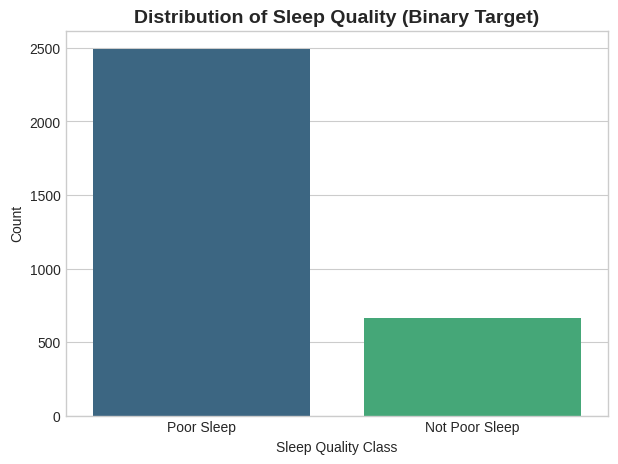

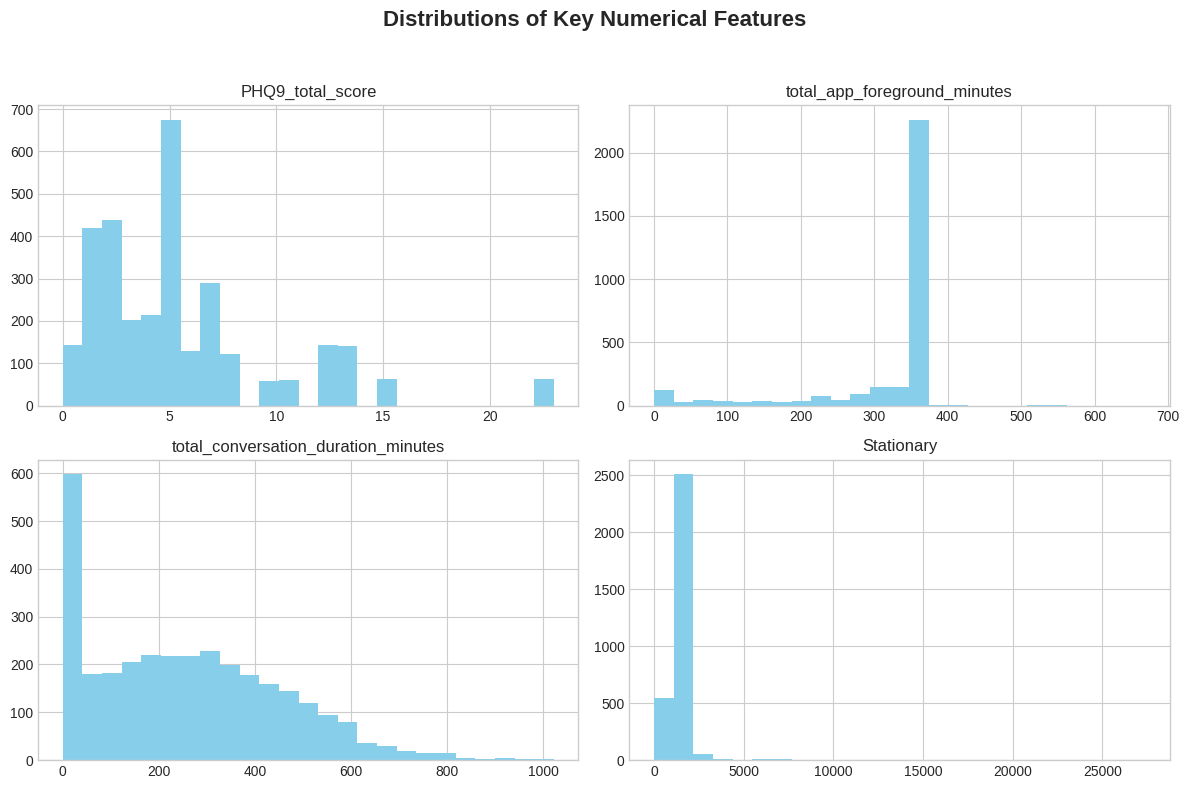

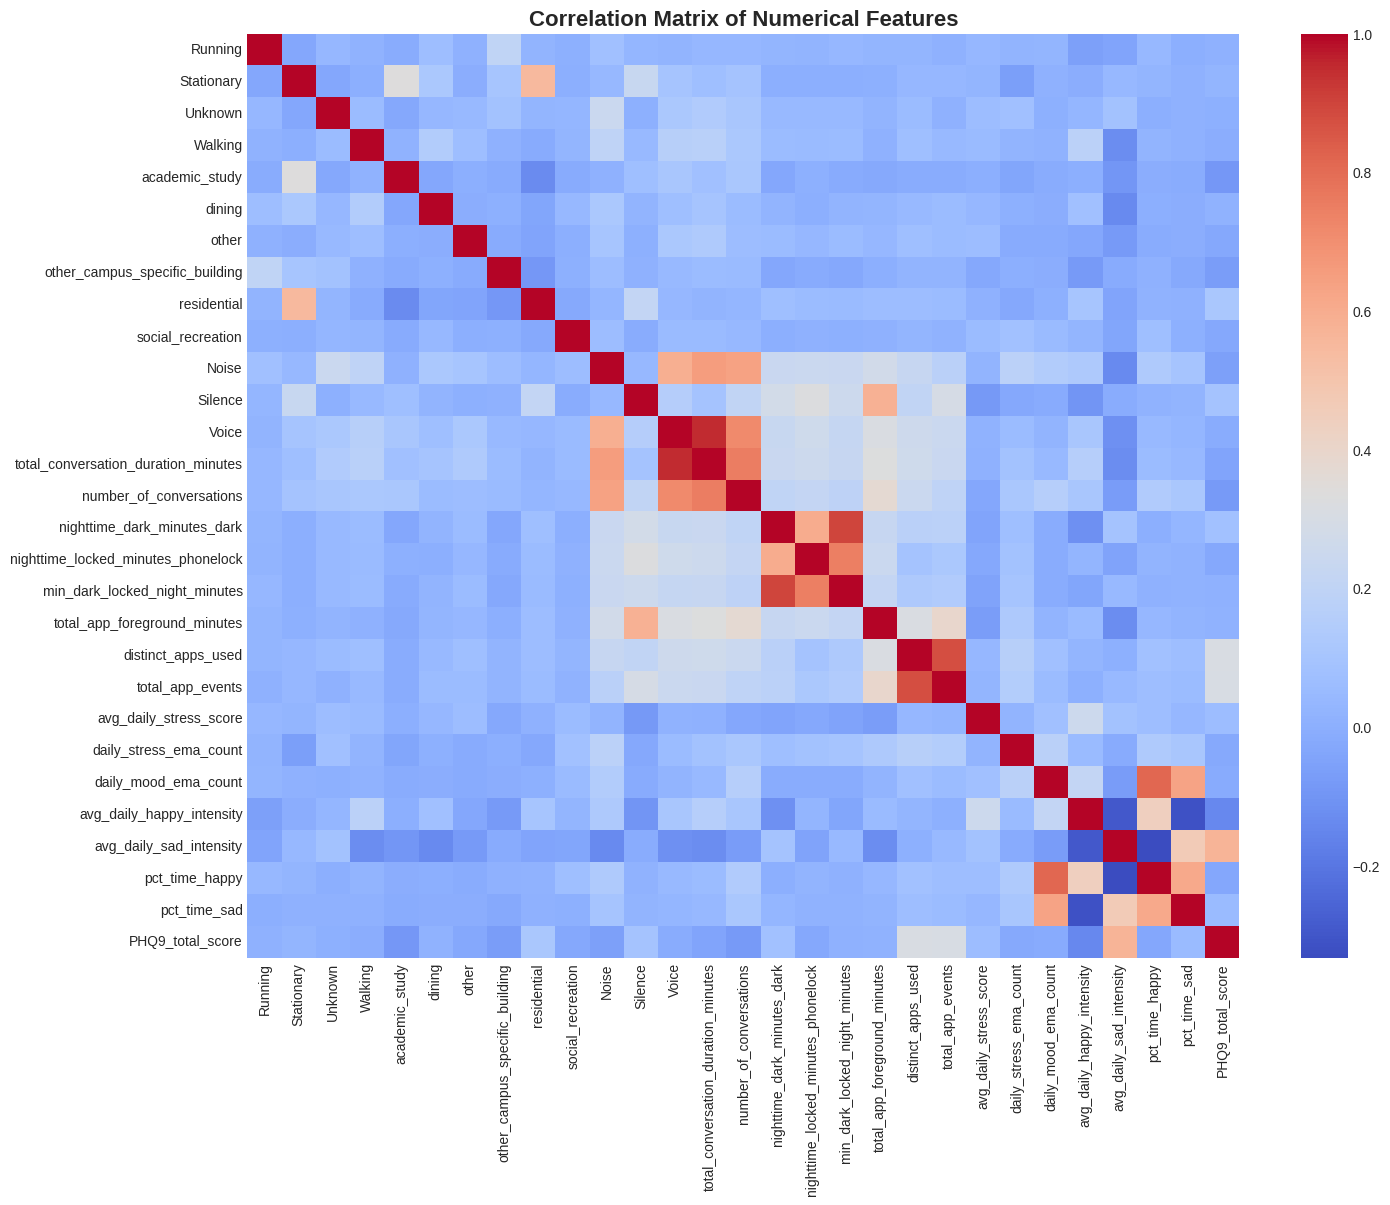

<ipython-input-1-387f832f0498>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='sleep_quality_binary', y='PHQ9_total_score', data=df, palette='pastel')
<ipython-input-1-387f832f0498>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='sleep_quality_binary', y='total_app_foreground_minutes', data=df, palette='pastel')


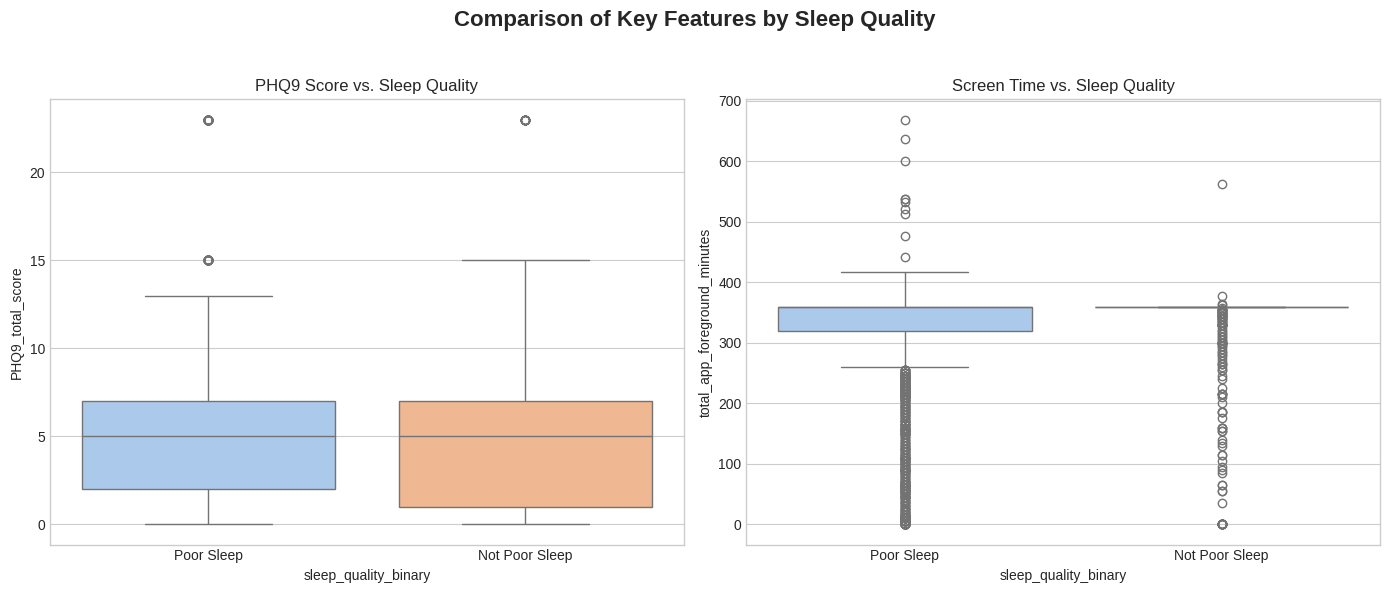


--- EDA Script Complete ---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Starting Exploratory Data Analysis (EDA) script...")

# --- 1. Load Data ---
try:
    df = pd.read_csv('master_daily_data_cleaned_for_sleep_model.csv')
    print("\nSuccessfully loaded 'master_daily_data_cleaned_for_sleep_model.csv'.")
    print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print("CRITICAL ERROR: 'master_daily_data_cleaned_for_sleep_model.csv' not found.")
    df = pd.DataFrame()

if not df.empty:
    # --- 2. Initial Inspection & Summaries ---
    print("\n\n--- 2.1. First 5 Rows of Data ---")
    print(df.head())

    print("\n\n--- 2.2. Data Types and Non-Null Counts ---")
    df.info()

    print("\n\n--- 2.3. Descriptive Statistics for Numerical Columns ---")
    print(df.describe())

    # --- 3. Create Binary Target for Analysis ---
    # This aligns the EDA with our final, best-performing model
    df['sleep_quality_binary'] = df['sleep_quality_multiclass'].apply(lambda x: 'Poor Sleep' if x == 'Poor Sleep' else 'Not Poor Sleep')

    # --- 4. Visualizations ---
    plt.style.use('seaborn-v0_8-whitegrid')
    print("\n\n--- 4.1. Generating Visualizations ---")


    # Plot 2: Histograms of Key Numerical Features
    key_features = ['PHQ9_total_score', 'total_app_foreground_minutes', 'total_conversation_duration_minutes', 'Stationary']
    df[key_features].hist(bins=25, figsize=(12, 8), layout=(2, 2), color='skyblue')
    plt.suptitle('Distributions of Key Numerical Features', fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Plot 3: Correlation Heatmap
    plt.figure(figsize=(16, 12))
    numerical_cols = df.select_dtypes(include=np.number)
    corr_matrix = numerical_cols.corr()
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=False) # Annot=False for readability with many features
    plt.title('Correlation Matrix of Numerical Features', fontsize=16, weight='bold')
    plt.show()

    # Plot 4: Box Plots of Features vs. Target
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.boxplot(ax=axes[0], x='sleep_quality_binary', y='PHQ9_total_score', data=df, palette='pastel')
    axes[0].set_title('PHQ9 Score vs. Sleep Quality')

    sns.boxplot(ax=axes[1], x='sleep_quality_binary', y='total_app_foreground_minutes', data=df, palette='pastel')
    axes[1].set_title('Screen Time vs. Sleep Quality')

    fig.suptitle('Comparison of Key Features by Sleep Quality', fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    print("\n--- EDA Script Complete ---")

Starting Advanced Exploratory Data Analysis script...

Successfully loaded 'master_daily_data_cleaned_for_sleep_model.csv'.
Data preparation complete.

Generating Pair Plot to visualize feature interactions...


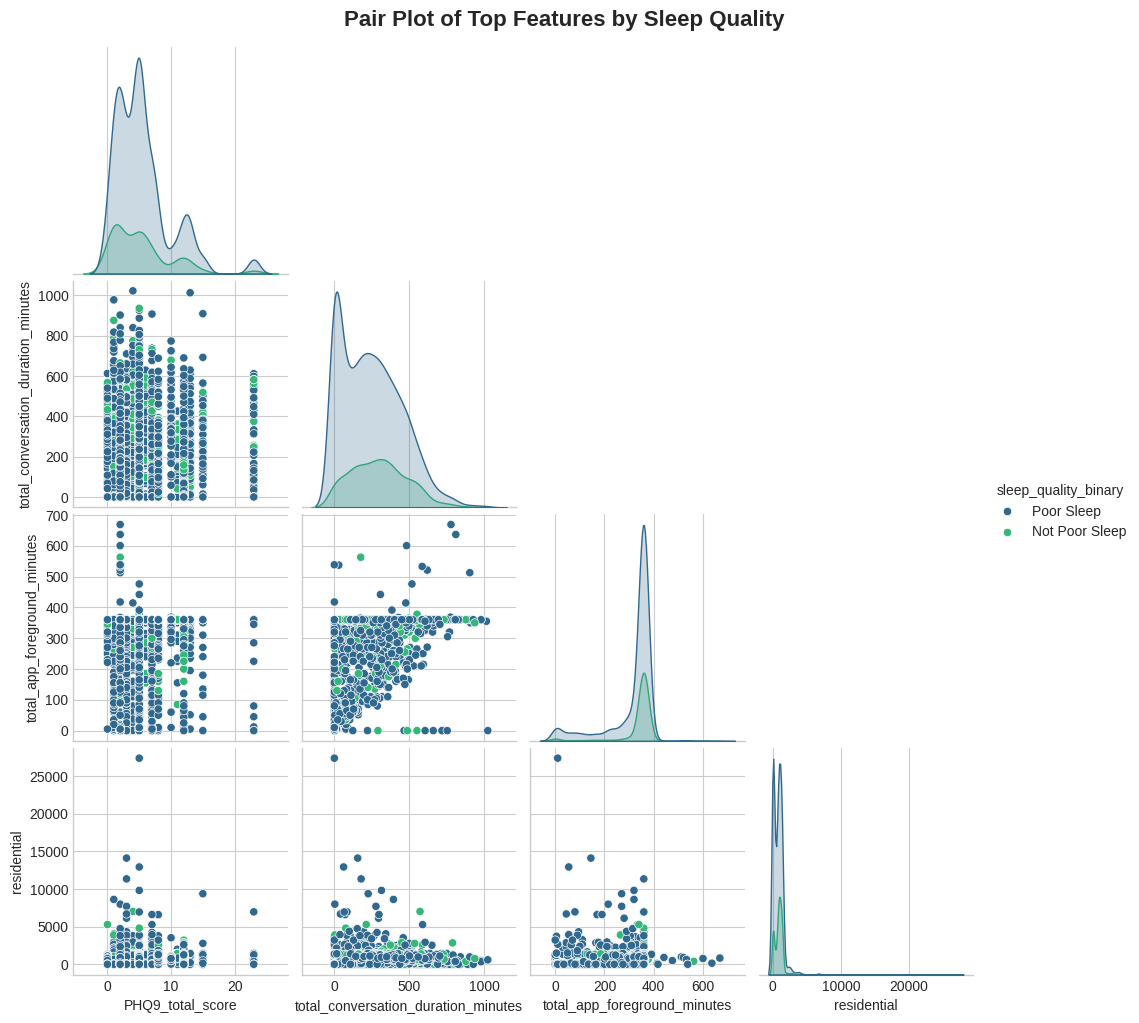

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Starting Advanced Exploratory Data Analysis script...")

# --- 1. Load Data and Basic Prep ---
try:
    df = pd.read_csv('master_daily_data_cleaned_for_sleep_model.csv')
    print("\nSuccessfully loaded 'master_daily_data_cleaned_for_sleep_model.csv'.")
except FileNotFoundError:
    print("CRITICAL ERROR: 'master_daily_data_cleaned_for_sleep_model.csv' not found.")
    df = pd.DataFrame()

if not df.empty:
    # Create Binary Target for analysis
    df['sleep_quality_binary'] = df['sleep_quality_multiclass'].apply(lambda x: 'Poor Sleep' if x == 'Poor Sleep' else 'Not Poor Sleep')

    # Convert date column to datetime objects for time-series analysis
    df['date'] = pd.to_datetime(df['date'])

    print("Data preparation complete.")

    # --- 2. Analysis 1: Pair Plot of Top Features ---
    print("\nGenerating Pair Plot to visualize feature interactions...")

    # Select the most important features we identified previously
    top_features = [
        'PHQ9_total_score',
        'total_conversation_duration_minutes',
        'total_app_foreground_minutes',
        'residential',
        'sleep_quality_binary' # Include target for coloring
    ]

    pairplot_df = df[top_features].dropna()

    plt.style.use('seaborn-v0_8-whitegrid')
    sns.pairplot(pairplot_df, hue='sleep_quality_binary', palette='viridis', corner=True)
    plt.suptitle("Pair Plot of Top Features by Sleep Quality", y=1.02, fontsize=16, weight='bold')
    plt.show()


In [7]:

### **Code to Find Highly Correlated Features**

import pandas as pd
import numpy as np

print("Starting script to find highly correlated features...")

# --- 1. Load Data ---
try:
    df = pd.read_csv('master_daily_data_cleaned_for_sleep_model.csv')
    print("\nSuccessfully loaded data.")
except FileNotFoundError:
    print("CRITICAL ERROR: 'master_daily_data_cleaned_for_sleep_model.csv' not found.")
    df = pd.DataFrame()

if not df.empty:
    # --- 2. Calculate Correlation Matrix ---

    # Select only numerical columns for correlation calculation
    numerical_cols = df.select_dtypes(include=np.number)

    # Drop columns that are identifiers or have low variance if they are not useful
    # For this dataset, most numerical columns are sensor readings or scores, so we'll keep them

    print("\nCalculating correlation matrix...")
    corr_matrix = numerical_cols.corr().abs()

    # --- 3. "Reduce" the Matrix to Find High Correlations ---

    # Unstack the matrix to get a list of all pairs
    # and reset the index to turn it into a DataFrame
    sol = corr_matrix.unstack().reset_index()
    sol.columns = ['feature_1', 'feature_2', 'correlation']

    # Remove self-correlations (e.g., correlation of a feature with itself)
    sol = sol[sol['feature_1'] != sol['feature_2']]

    # Create a key to identify unique pairs regardless of order (e.g., (A,B) is same as (B,A))
    sol['pair_key'] = sol.apply(lambda row: tuple(sorted((row['feature_1'], row['feature_2']))), axis=1)

    # Drop duplicate pairs
    sol = sol.drop_duplicates(subset=['pair_key'])
    sol = sol.drop(columns=['pair_key'])


    # --- 4. Filter and Display the Results ---

    # Set the correlation threshold
    threshold = 0.70

    # Filter for pairs with correlation above the threshold
    high_corr_pairs = sol[sol['correlation'] > threshold].sort_values(by='correlation', ascending=False)

    print(f"\n\n--- Top Correlated Feature Pairs (Threshold > {threshold}) ---\n")
    if high_corr_pairs.empty:
        print("No feature pairs found with a correlation greater than the threshold.")
    else:
        # Using .to_string() to ensure the full list is printed without truncation
        print(high_corr_pairs.to_string(index=False))

    print("\n\n--- Script Complete ---")


Starting script to find highly correlated features...

Successfully loaded data.

Calculating correlation matrix...


--- Top Correlated Feature Pairs (Threshold > 0.7) ---

                          feature_1                           feature_2  correlation
                              Voice total_conversation_duration_minutes     0.949954
        nighttime_dark_minutes_dark       min_dark_locked_night_minutes     0.900165
                 distinct_apps_used                    total_app_events     0.876057
               daily_mood_ema_count                      pct_time_happy     0.817686
total_conversation_duration_minutes             number_of_conversations     0.752223
 nighttime_locked_minutes_phonelock       min_dark_locked_night_minutes     0.746640
                              Voice             number_of_conversations     0.714134


--- Script Complete ---


Starting Behavioral Clustering analysis script...

Successfully loaded data.
Data preparation and scaling complete.

Running Elbow Method to find optimal number of clusters...


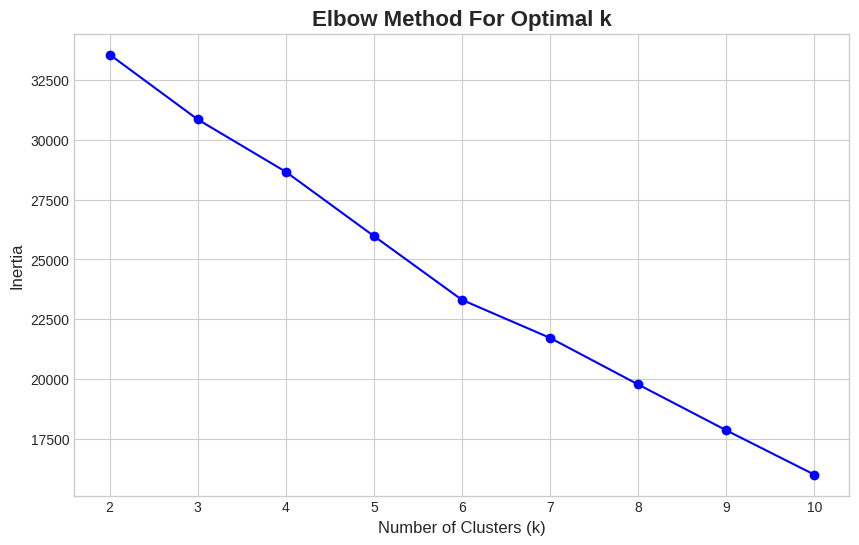


Assuming optimal k = 4 based on the elbow plot.
Running final K-Means clustering...

--- Cluster Profiles (Average feature values for each cluster) ---
         total_app_foreground_minutes  distinct_apps_used  total_app_events  \
cluster                                                                       
0                          344.912614            9.562988        464.319336   
1                           35.000000            4.000000         20.000000   
2                           88.520833            5.521505         97.247312   
3                          357.294225           22.714870       1368.851296   

           Running   Stationary      Walking    Unknown  academic_study  \
cluster                                                                   
0        20.041772  1313.766235    54.286938  35.785775      317.430192   
1         0.166667   949.775000  4649.325000  15.033333       15.016667   
2         3.668324   968.732034    24.169131  20.613306      320.416174 

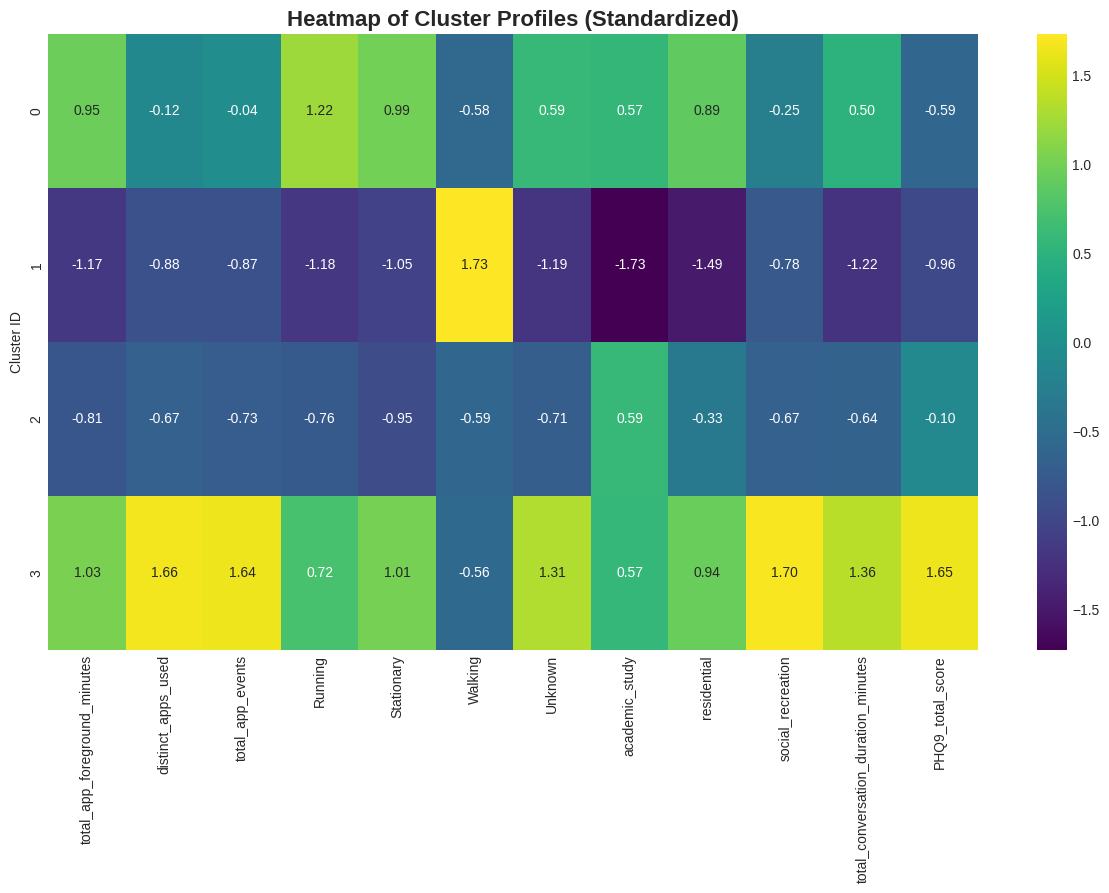


Analyzing sleep quality distribution across clusters...

--- Percentage of Sleep Quality per Cluster ---
sleep_quality_binary  Not Poor Sleep  Poor Sleep
cluster                                         
0                           0.220215    0.779785
1                                NaN    1.000000
2                           0.075630    0.924370
3                           0.230559    0.769441


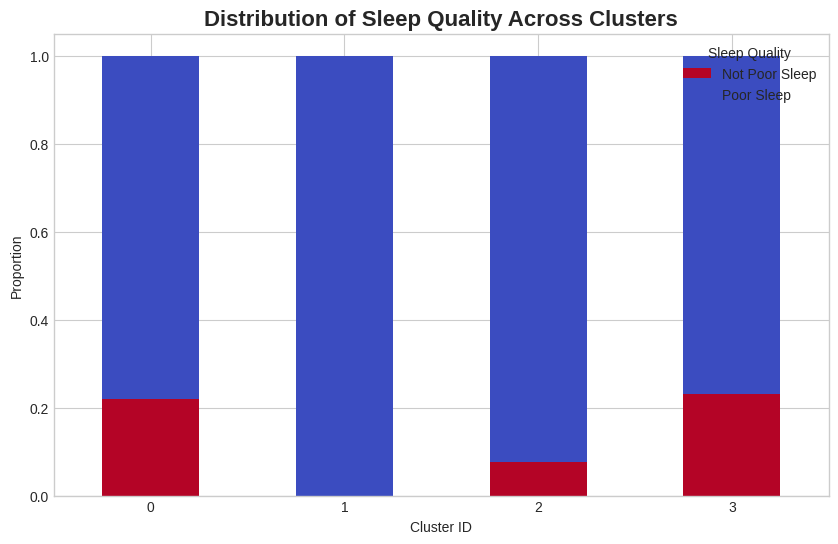


--- Script Complete ---


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("Starting Behavioral Clustering analysis script...")

# --- 1. Load and Prepare Data ---
try:
    data_df = pd.read_csv('master_daily_data_cleaned_for_sleep_model.csv')
    print("\nSuccessfully loaded data.")
except FileNotFoundError:
    print("CRITICAL ERROR: 'master_daily_data_cleaned_for_sleep_model.csv' not found.")
    data_df = pd.DataFrame()

if not data_df.empty:
    # Use the same features as our predictive model
    feature_columns = ['total_app_foreground_minutes', 'distinct_apps_used', 'total_app_events', 'Running',
                       'Stationary', 'Walking', 'Unknown', 'academic_study', 'residential',
                       'social_recreation', 'total_conversation_duration_minutes', 'PHQ9_total_score']

    # Create a clean dataframe for clustering
    cluster_df = data_df[feature_columns].copy()
    cluster_df.dropna(inplace=True)

    # Scale the features - this is crucial for distance-based algorithms like K-Means
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(cluster_df)
    print("Data preparation and scaling complete.")

    # --- 2. Find the Optimal Number of Clusters (Elbow Method) ---
    print("\nRunning Elbow Method to find optimal number of clusters...")
    inertia = []
    k_range = range(2, 11) # Test k from 2 to 10 clusters
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Method results
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, 'bo-')
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Inertia', fontsize=12)
    plt.title('Elbow Method For Optimal k', fontsize=16, weight='bold')
    plt.show()

    # --- 3. Run K-Means and Profile the Clusters ---
    # Based on the elbow plot, choose the optimal k. Let's assume k=4 for this example.
    optimal_k = 4
    print(f"\nAssuming optimal k = {optimal_k} based on the elbow plot.")
    print("Running final K-Means clustering...")

    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    # Add the cluster labels back to our original (unscaled) dataframe
    cluster_df['cluster'] = kmeans.fit_predict(X_scaled)

    # Analyze the clusters by calculating the mean of each feature per cluster
    cluster_profiles = cluster_df.groupby('cluster').mean()
    print("\n--- Cluster Profiles (Average feature values for each cluster) ---")
    print(cluster_profiles)

    # --- 4. Visualize Cluster Profiles ---
    print("\nGenerating visualization for cluster profiles...")

    # We need to scale the profiles for fair comparison in the plot
    scaler_profiles = StandardScaler()
    profiles_scaled = scaler_profiles.fit_transform(cluster_profiles)
    profiles_scaled_df = pd.DataFrame(profiles_scaled, index=cluster_profiles.index, columns=cluster_profiles.columns)

    plt.figure(figsize=(15, 8))
    sns.heatmap(profiles_scaled_df, cmap='viridis', annot=True, fmt=".2f")
    plt.title('Heatmap of Cluster Profiles (Standardized)', fontsize=16, weight='bold')
    plt.ylabel('Cluster ID')
    plt.show()

    # --- 5. Analyze Sleep Quality Across Clusters ---
    print("\nAnalyzing sleep quality distribution across clusters...")
    # Add the cluster labels to the main dataframe to access the sleep quality target
    data_with_clusters = data_df.loc[cluster_df.index]
    data_with_clusters['cluster'] = cluster_df['cluster']

    # Create the binary sleep target if it doesn't exist
    if 'sleep_quality_binary' not in data_with_clusters.columns:
         data_with_clusters['sleep_quality_binary'] = data_with_clusters['sleep_quality_multiclass'].apply(lambda x: 'Poor Sleep' if x == 'Poor Sleep' else 'Not Poor Sleep')

    sleep_dist = data_with_clusters.groupby('cluster')['sleep_quality_binary'].value_counts(normalize=True).unstack()
    print("\n--- Percentage of Sleep Quality per Cluster ---")
    print(sleep_dist)

    sleep_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm_r')
    plt.title('Distribution of Sleep Quality Across Clusters', fontsize=16, weight='bold')
    plt.ylabel('Proportion')
    plt.xlabel('Cluster ID')
    plt.xticks(rotation=0)
    plt.legend(title='Sleep Quality')
    plt.show()

    print("\n--- Script Complete ---")